# Temperature Forecast Project using ML

By Mónica Atiaga

Batch - DSNB1222

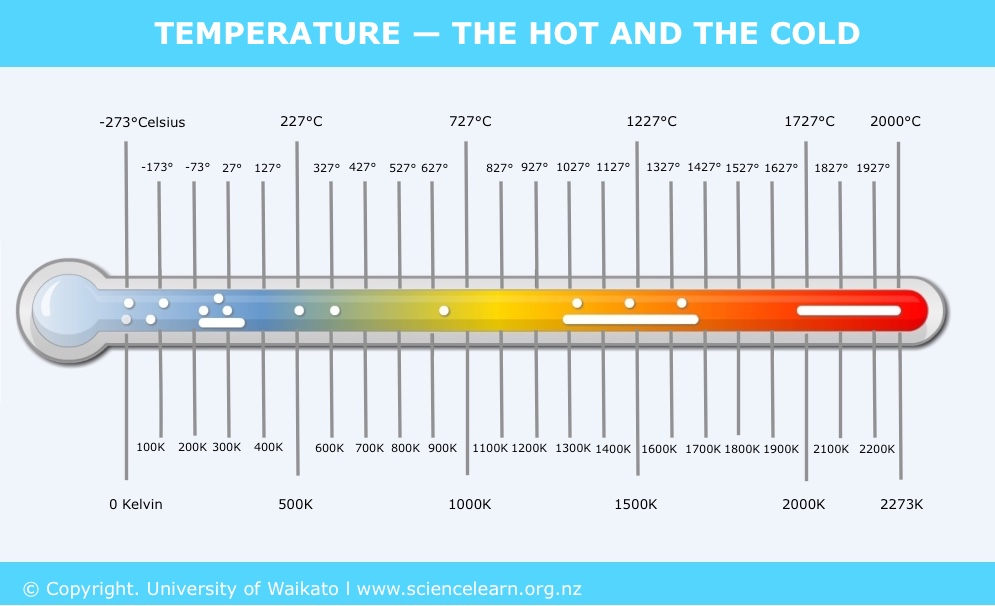

## Project Description
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


### Attribute Information:

For more information, read [Cho et al, 2020].

1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.


### Dataset Link
* https://github.com/dsrscientist/Dataset2/blob/main/temperature.csv

* https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [2]:
# Retrive the dataset using the raw address
url = "https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv"
df = pd.read_csv(url)

# 1. EDA Exploratory Data Analysis
## 1.1 First view 

In [3]:
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [4]:
df.tail()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[5 rows x 25 columns]

In [5]:
# checking the dimension of the dataset
df.shape

print(f"The rows and columns in the dataset: {df.shape}")
print(f"\nThe column headers in the dataset: {df.columns}")

The rows and columns in the dataset: (7752, 25)

The column headers in the dataset: Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')


This dataset contains 7752 rows and 25 columns. Out of which the variables "Next_Tmax" and "Next_Tmin" are considered as targets for different approaches, the remaining 23 are independent variables described in the above section Project Description.

Since the dataset can be seen from two angles to find the "Next_Tmax"(Regression problem) and the "Next_Tmin" (Regression Problem) we are going to analyze them as target variables during the EDA.

In [6]:
# checking the types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


There are two types of data (object and float64 ) present in the dataset. Only Date column is object and the rest of columns are float64.

The dataset presents null values.

## 1.2 Missing values
### 1.2.1 Inspecting the dataset

In [7]:
# checking the null values
missing_val = df.isnull().sum().to_frame("Null values")

# Calculate the % of the null values
missing_val["% of missing"] = round(missing_val['Null values'] / len(df) * 100,2)

missing_val

Null values  % of missing
station                     2          0.03
Date                        2          0.03
Present_Tmax               70          0.90
Present_Tmin               70          0.90
LDAPS_RHmin                75          0.97
LDAPS_RHmax                75          0.97
LDAPS_Tmax_lapse           75          0.97
LDAPS_Tmin_lapse           75          0.97
LDAPS_WS                   75          0.97
LDAPS_LH                   75          0.97
LDAPS_CC1                  75          0.97
LDAPS_CC2                  75          0.97
LDAPS_CC3                  75          0.97
LDAPS_CC4                  75          0.97
LDAPS_PPT1                 75          0.97
LDAPS_PPT2                 75          0.97
LDAPS_PPT3                 75          0.97
LDAPS_PPT4                 75          0.97
lat                         0          0.00
lon                         0          0.00
DEM                         0          0.00
Slope                       0          0.00
Solar radiation             0          0.00
Next_Tmax                  27          0.35
Next_Tmin                  27          0.35

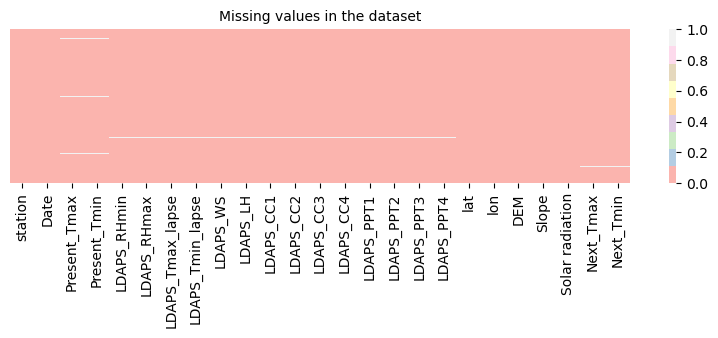

In [8]:
# Let's visualize it using heatmap
plt.figure(figsize=(10,2))
sns.heatmap(df.isnull(), yticklabels=False, cmap='Pastel1')
plt.title('Missing values in the dataset', fontsize=10);

Some columns present null values but in a minimal proportion. 
The missing values will be treated in further sections.

## 1.3 Features Analysis
### 1.3.1 Unique values

In [152]:
# Reviewing the number of unique values in each feature and the target
info_df = df.nunique().to_frame('No. of unique values')
info_df['type'] = df.dtypes.values
info_df

No. of unique values     type
station                             25  float64
Present_Tmax                       163  float64
Present_Tmin                       151  float64
LDAPS_RHmin                       6835  float64
LDAPS_RHmax                       6829  float64
LDAPS_Tmax_lapse                  6838  float64
LDAPS_Tmin_lapse                  6838  float64
LDAPS_WS                          6838  float64
LDAPS_LH                          6838  float64
LDAPS_CC1                         6743  float64
LDAPS_CC2                         6755  float64
LDAPS_CC3                         6768  float64
LDAPS_CC4                         6728  float64
LDAPS_PPT1                        2306  float64
LDAPS_PPT2                        1988  float64
LDAPS_PPT3                        1835  float64
LDAPS_PPT4                        1460  float64
lat                                 12  float64
lon                                 25  float64
DEM                                 25  float64
Slope                               25  float64
Solar radiation                   1550  float64
Next_Tmax                          164  float64
Next_Tmin                          148  float64
position                            25  float64
year                                 5    int64
month                               12    int64
day                                 21    int64

About the number of unique values:

- Next_Tmax and Next_Tmin are the target variables with 183 and 157 unique values respectively of 7752 total in the dataset. We are facing two regression problems since both target variables are continuous and numerical. 

- Only the Date datatype is Object, this feature will be converted in datetime later, and the rest of the features are numerical.

- However, the station(25), lat(12), lon(25), DEM(25), and Slope(27) columns, despite being numerical, seem to be categorical and should be analyzed as categorical as well during EDA.

#### 1.3.1.1 Next_Tmax unique values

In [10]:
# Inspect the unique values of the target variable
column = 'Next_Tmax'
print(f"Feature {column}:\n{df[column].value_counts()}")
print(f"Unique values: {sorted(df[column].unique())}")
print(f"# unique values: {df[column].nunique()}\n")

Feature Next_Tmax:
29.3    113
33.0    106
31.3    104
29.6    101
31.2     98
       ... 
37.9      1
38.3      1
37.6      1
37.4      1
21.5      1
Name: Next_Tmax, Length: 183, dtype: int64
Unique values: [21.6, 21.8, 22.4, 22.5, 22.8, 23.0, 23.1, 23.2, 23.4, 23.5, 23.6, 23.7, 23.8, 23.9, 24.0, 24.1, 24.2, 24.3, 24.4, 24.5, 24.6, 24.7, 24.8, 24.9, 25.0, 25.1, 25.2, 25.3, 25.4, 25.5, 25.6, 25.7, 25.8, 25.9, 26.0, 26.1, 26.2, 26.3, 26.4, 26.5, 26.6, 26.7, 26.8, 26.9, 27.0, 27.1, 27.2, 27.3, 27.4, 27.5, 27.6, 27.7, 27.8, 27.9, 28.0, 28.1, 28.2, 28.3, 28.4, 28.5, 28.6, 28.7, 28.8, 28.9, 29.0, 29.1, 29.2, 29.3, 29.4, 29.5, 29.6, 29.7, 29.8, 29.9, 30.0, 30.1, 30.2, 30.3, 30.4, 30.5, 30.6, 30.7, 30.8, 30.9, 31.0, 31.1, 31.2, 31.3, 31.4, 31.5, 31.6, 31.7, 31.8, 31.9, 32.0, 32.1, 32.2, 32.3, 32.4, 32.5, 32.6, 32.7, 32.8, 32.9, 33.0, 33.1, 33.2, 33.3, 33.4, 33.5, 33.6, 33.7, 33.8, 33.9, 34.0, 34.1, 34.2, 34.3, 34.4, 34.5, 34.7, 34.8, nan, 17.4, 18.6, 18.9, 19.5, 19.7, 20.1, 20.3, 20.4, 20.5,

The target variable Next_Tmax has 183 unique values of the 7752 rows in the dataset. In order to predict this feature we need to build a regression model.

#### 1.3.1.2 Next_Tmin unique values

In [11]:
# Inspect the unique values of the target variable
column = 'Next_Tmin'
print(f"Feature {column}:\n{df[column].value_counts()}")
print(f"Unique values: {sorted(df[column].unique())}")

Feature Next_Tmin:
23.5    159
23.4    157
24.0    156
23.2    150
23.8    149
       ... 
13.4      1
13.3      1
28.2      1
29.5      1
12.9      1
Name: Next_Tmin, Length: 157, dtype: int64
Unique values: [17.8, 18.7, 18.9, 19.1, 19.3, 19.4, 19.5, 19.7, 19.8, 19.9, 20.0, 20.1, 20.2, 20.3, 20.4, 20.5, 20.6, 20.7, 20.8, 20.9, 21.0, 21.1, 21.2, 21.3, 21.4, 21.5, 21.6, 21.7, 21.8, 21.9, 22.0, 22.1, 22.2, 22.3, 22.4, 22.5, 22.6, 22.7, 22.8, 22.9, 23.0, 23.1, 23.2, 23.3, 23.4, 23.5, 23.6, 23.7, 23.8, 23.9, 24.0, 24.1, 24.2, 24.3, 24.4, 24.5, 24.6, 24.7, 24.8, 24.9, 25.0, 25.1, 25.2, 25.3, 25.4, 25.5, 25.6, 25.7, 25.8, 25.9, 26.0, 26.1, 26.2, 26.3, 26.4, 26.5, 26.6, 26.8, 26.9, nan, 11.3, 12.9, 13.3, 13.4, 13.6, 13.8, 13.9, 14.1, 14.3, 14.4, 14.6, 14.7, 14.9, 15.0, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16.0, 16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17.0, 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.9, 18.0, 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.8, 19.0, 19.2,

The target variable Next_Tmax has 183 unique values of the 7752 rows in the dataset. In order to predict this feature we will build a regression model since the variable is numerical and continuous.

#### 1.3.1.3 Date unique values

In [12]:
# Inspect the unique values of the Date variable
column = 'Date'
print(f"Feature {column}:\n{df[column].value_counts()}")

Feature Date:
30-06-2013    25
18-07-2016    25
25-07-2016    25
24-07-2016    25
23-07-2016    25
              ..
09-08-2014    25
08-08-2014    25
07-08-2014    25
06-08-2014    25
30-08-2017    25
Name: Date, Length: 310, dtype: int64


Date column has 310 unique values. Next, we will convert this column to datetime type.

In [13]:
# convert the Date column into date
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
df.dtypes

station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
dtype: object

Now the column Date is in datetype format, and we can use it in our analysis.

#### 1.3.1.4 Independent variables unique values

We will separate the numerical discrete variables from the continuous.

In [15]:
categorical_col = ['station', 'lat', 'lon', 'DEM', 'Slope']
not_num_col = categorical_col + ['Date', 'Next_Tmax', 'Next_Tmin']
numerical_col = [col for col in df.columns if col not in not_num_col]

print(f"Numerical columns as categories: \n{categorical_col}\n")
print(f"Numerical columns: \n{numerical_col}")

Numerical columns as categories: 
['station', 'lat', 'lon', 'DEM', 'Slope']

Numerical columns: 
['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'Solar radiation']


#### Categorical columns

In [16]:
for column in categorical_col:
    print(f"Feature {column}:\n{df[column].value_counts(dropna=False)}")
    print(f"# unique values: {df[column].nunique()}\n")

Feature station:
1.0     310
2.0     310
25.0    310
24.0    310
23.0    310
22.0    310
21.0    310
20.0    310
19.0    310
18.0    310
17.0    310
16.0    310
15.0    310
14.0    310
13.0    310
12.0    310
11.0    310
10.0    310
9.0     310
8.0     310
7.0     310
6.0     310
5.0     310
4.0     310
3.0     310
NaN       2
Name: station, dtype: int64
# unique values: 25

Feature lat:
37.5776    1240
37.5507    1240
37.6046     620
37.5102     620
37.4697     620
37.4967     620
37.5372     620
37.6181     620
37.5237     620
37.6450     311
37.4562     311
37.4832     310
Name: lat, dtype: int64
# unique values: 12

Feature lon:
127.135    311
126.826    311
126.991    310
126.937    310
126.909    310
126.891    310
127.086    310
127.040    310
127.004    310
126.938    310
127.024    310
127.099    310
126.995    310
127.083    310
126.927    310
127.032    310
126.988    310
127.085    310
126.955    310
126.910    310
126.838    310
127.042    310
127.022    310
127.058    310

Although the above columns are numerical, they will be analyzed as categorical since they are discrete.

#### Numerical columns

In [17]:
for column in numerical_col:
    print(f"Feature {column}:\n{df[column].value_counts()}")
    print(f"# unique values: {df[column].nunique()}\n")

Feature Present_Tmax:
31.4    112
29.4    111
29.1    108
29.7    107
31.9    105
       ... 
36.9      1
21.2      1
20.1      1
36.4      1
20.3      1
Name: Present_Tmax, Length: 167, dtype: int64
# unique values: 167

Feature Present_Tmin:
24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 
13.6      1
14.2      1
29.1      1
29.7      1
15.0      1
Name: Present_Tmin, Length: 155, dtype: int64
# unique values: 155

Feature LDAPS_RHmin:
19.794666    2
71.658089    2
77.030350    2
98.524734    2
51.810596    2
            ..
52.924568    1
60.215191    1
46.799820    1
52.227486    1
22.933014    1
Name: LDAPS_RHmin, Length: 7672, dtype: int64
# unique values: 7672

Feature LDAPS_RHmax:
96.525200     2
99.251968     2
100.000153    2
91.878174     2
94.795967     2
             ..
96.718201     1
94.153252     1
96.910126     1
93.541885     1
77.243744     1
Name: LDAPS_RHmax, Length: 7664, dtype: int64
# unique values: 7664

Feature LDAPS_Tmax_lapse:
17.624954

The above features are numerical and continuous.

#### 1.3.1.5 Lat and lon unique values
Since these two features represent a specific position together it will be interesting to analyze them as a whole.
For that purpose, we will combine them in the feature 'position' to determine how many combinations are there in the dataset.

In [18]:
df['position'] = df['lat'].astype(str) + '-' + df['lon'].astype(str)
# df1.groupby(['lat','lon']).count().shape

column = 'position'
print(f"Feature {column}:\n{df[column].value_counts(dropna=False)}")
print(f"# unique values: {df[column].nunique()}\n")

Feature position:
37.6046-126.991    310
37.6046-127.032    310
37.5237-126.97     310
37.5237-126.909    310
37.5372-126.891    310
37.5102-127.086    310
37.5507-127.04     310
37.6181-127.004    310
37.5776-126.938    310
37.4832-127.024    310
37.6181-127.099    310
37.4697-126.995    310
37.5507-126.937    310
37.4967-126.927    310
37.5776-127.083    310
37.5507-126.988    310
37.5372-127.085    310
37.4562-126.955    310
37.4967-126.826    310
37.4697-126.91     310
37.5776-126.838    310
37.5102-127.042    310
37.5507-127.135    310
37.645-127.022     310
37.5776-127.058    310
37.4562-126.826      1
37.645-127.135       1
Name: position, dtype: int64
# unique values: 27



As we see  there are 27 unique combinations of lat and lon which means these are specific positions where the samples were taken. It will be interesting to analyze this feature.

### 1.3.2 Imputing Missing values

In [19]:
missing_val

Null values  % of missing
station                     2          0.03
Date                        2          0.03
Present_Tmax               70          0.90
Present_Tmin               70          0.90
LDAPS_RHmin                75          0.97
LDAPS_RHmax                75          0.97
LDAPS_Tmax_lapse           75          0.97
LDAPS_Tmin_lapse           75          0.97
LDAPS_WS                   75          0.97
LDAPS_LH                   75          0.97
LDAPS_CC1                  75          0.97
LDAPS_CC2                  75          0.97
LDAPS_CC3                  75          0.97
LDAPS_CC4                  75          0.97
LDAPS_PPT1                 75          0.97
LDAPS_PPT2                 75          0.97
LDAPS_PPT3                 75          0.97
LDAPS_PPT4                 75          0.97
lat                         0          0.00
lon                         0          0.00
DEM                         0          0.00
Slope                       0          0.00
Solar radiation             0          0.00
Next_Tmax                  27          0.35
Next_Tmin                  27          0.35

Statistically speaking, if the number of missing observations is less than 5% of the sample, we can drop them. 

In all the columns with missing values, the percentage of missing is less than 1% then dropping these data is the best strategy for abording this issue.

However, it would be interesting to save the 27 rows where the target variables have null values in order to try our prediction models.

<!-- # Saving the rows with null values in target variables
df_eval = df[df['Next_Tmax'].isna()]

print(f"The dimension of the eval dataframe is {df_eval.shape}")
df_eval.sample(3) -->

In [20]:
cols_with_missing = missing_val[missing_val['Null values'] > 0].index.to_list()
cols_with_missing

['station',
 'Date',
 'Present_Tmax',
 'Present_Tmin',
 'LDAPS_RHmin',
 'LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'Next_Tmax',
 'Next_Tmin']

In [21]:
# Dropping the missing values with % of missing less than 5%
df_new = df.dropna(subset=cols_with_missing)

print(f"{df.shape[0] - df_new.shape[0]} rows with missing values were deleted.")
print(f"This represent {round((df.shape[0] - df_new.shape[0]) / df.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {df.shape[1]} columns.")
df = df_new.copy()

164 rows with missing values were deleted.
This represent 2.12% of the data.
In the new dataset there are 7588 rows and 26 columns.


####  Last check for missing values

In [22]:
df.isnull().sum().sum()

0

No more missing values to remove.

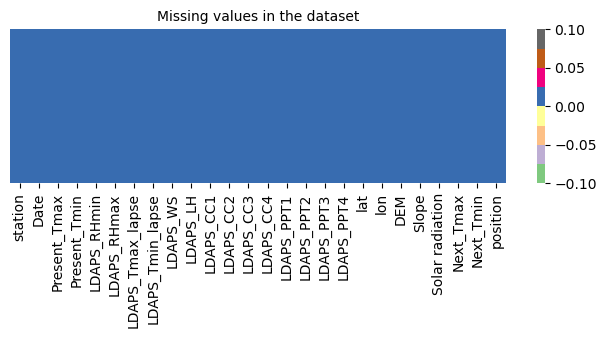

In [23]:
# Let's visualize it using heatmap
plt.figure(figsize=(8,2))
sns.heatmap(df.isnull(), yticklabels=False, cmap='Accent')
plt.title('Missing values in the dataset', fontsize=10);

In [24]:
df.shape

(7588, 26)

Now, the studied dataframe has 7588 rows and 26 columns with no missing values. We lost about 2.12% of the data dropping some rows.

### 1.3.3 Summary statistics of the numerical and non-numerical variables

In [25]:
# Summary statistics of numerical columns
stats = df.describe()
stats

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7588.000000   7588.000000   7588.000000  7588.000000  7588.000000   
mean     13.014101     29.748366     23.195809    56.724969    88.360823   
std       7.217858      2.967401      2.400880    14.626559     7.199456   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.600000    45.960243    84.203724   
50%      13.000000     29.900000     23.400000    55.023199    89.784122   
75%      19.000000     32.000000     24.800000    67.115099    93.742725   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7588.000000       7588.000000  7588.000000  7588.000000   
mean          29.620128         23.511786     7.094097    62.492606   
std            2.943496          2.342579     2.177034    33.686158   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673756         22.086820     5.675358    37.206201   
50%           29.709537         23.758249     6.547838    56.898324   
75%           31.711109         25.155660     8.028960    84.235666   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count  7588.000000  ...  7588.000000  7588.000000  7588.000000  7588.000000   
mean      0.368510  ...     0.480738     0.275007     0.265373    37.544792   
std       0.262260  ...     1.743327     1.146087     1.179661     0.050428   
min       0.000000  ...     0.000000     0.000000     0.000000    37.456200   
25%       0.146546  ...     0.000000     0.000000     0.000000    37.510200   
50%       0.315706  ...     0.000000     0.000000     0.000000    37.550700   
75%       0.574174  ...     0.017735     0.007855     0.000017    37.577600   
max       0.967277  ...    21.621661    15.841235    16.655469    37.645000   

              lon          DEM        Slope  Solar radiation    Next_Tmax  \
count  7588.00000  7588.000000  7588.000000      7588.000000  7588.000000   
mean    126.99142    61.918136     1.259755      5343.724208    30.241526   
std       0.07922    54.323529     1.372748       429.782561     3.111807   
min     126.82600    12.370000     0.098500      4329.520508    17.400000   
25%     126.93700    28.700000     0.271300      5001.485717    28.200000   
50%     126.99500    45.716000     0.618000      5441.987305    30.400000   
75%     127.04200    59.832400     1.767800      5729.485840    32.600000   
max     127.13500   212.335000     5.178200      5992.895996    38.900000   

         Next_Tmin  
count  7588.000000  
mean     22.910820  
std       2.482256  
min      11.300000  
25%      21.300000  
50%      23.100000  
75%      24.600000  
max      29.800000  

[8 rows x 24 columns]

In [26]:
# Look at the non numeric columns
df.describe(exclude=[np.number])

Date        position
count                  7588            7588
unique                  307              25
top     2013-06-30 00:00:00  37.5237-126.97
freq                     25             307
first   2013-01-07 00:00:00             NaN
last    2017-12-08 00:00:00             NaN

**Observations**
- The summary of the dataset looks perfect since there are no negative/invalid values present.
- The counts of all the columns are the same which means there are no more missing values in the dataset

In [27]:
# Contrast the mean with the 50th percentile
(stats.loc['mean',:] - stats.loc['50%',:]).sort_values(ascending=False)

DEM                 16.202136
LDAPS_LH             5.594282
LDAPS_RHmin          1.701770
Slope                0.641755
LDAPS_PPT1           0.589008
LDAPS_WS             0.546259
LDAPS_PPT2           0.480738
LDAPS_PPT3           0.275007
LDAPS_PPT4           0.265373
LDAPS_CC4            0.070808
LDAPS_CC3            0.055751
LDAPS_CC1            0.052804
LDAPS_CC2            0.043852
station              0.014101
lon                 -0.003580
lat                 -0.005908
LDAPS_Tmax_lapse    -0.089409
Present_Tmax        -0.151634
Next_Tmax           -0.158474
Next_Tmin           -0.189180
Present_Tmin        -0.204191
LDAPS_Tmin_lapse    -0.246463
LDAPS_RHmax         -1.423299
Solar radiation    -98.263097
dtype: float64

In [28]:
stats['Solar radiation']

count    7588.000000
mean     5343.724208
std       429.782561
min      4329.520508
25%      5001.485717
50%      5441.987305
75%      5729.485840
max      5992.895996
Name: Solar radiation, dtype: float64

The mean value is larger than the median(50%) in all DEM, LDAPS_LH, LDAPS_RHmin columns. Therefore, the data is skewed to the right.
In fhe columns Solar radiation and LDAPS_RHmax the median(50%) is larger than the mean, then the data is skewed to the left.

In [29]:
# Contrast the maximum value in each colum with 2 times the std plus the mean 
(stats.loc['max',:] - (stats.loc['mean',:] + 2 * stats.loc['std',:] ) ).sort_values(ascending=False)

LDAPS_LH             83.549084
DEM                  41.769806
LDAPS_PPT1           19.257383
LDAPS_PPT2           17.654268
LDAPS_PPT4           14.030775
LDAPS_PPT3           13.274055
LDAPS_RHmin          12.546648
LDAPS_WS             10.409457
LDAPS_Tmax_lapse      3.035135
Next_Tmax             2.434860
Next_Tmin             1.924669
Present_Tmax          1.916833
Present_Tmin          1.902431
LDAPS_Tmin_lapse      1.422399
Slope                 1.172949
LDAPS_CC4             0.169658
LDAPS_CC3             0.166577
LDAPS_CC2             0.096982
LDAPS_CC1             0.074248
lat                  -0.000649
lon                  -0.014859
station              -2.449816
LDAPS_RHmax          -2.759583
Solar radiation    -210.393335
dtype: float64

Since the max value is greater than two standard deviations plus the mean in the features listed above, there could be outliers in the data. 

### 1.3.3 Duplicates

In [30]:
# Searching for duplicated values
df[df.duplicated()].shape

(0, 26)

There are no duplicate values in the dataset.

## 1.4 Data Visualization
### 1.4.1 Univariate Analysis
#### 1.4.1.1 Next_Tmax feature

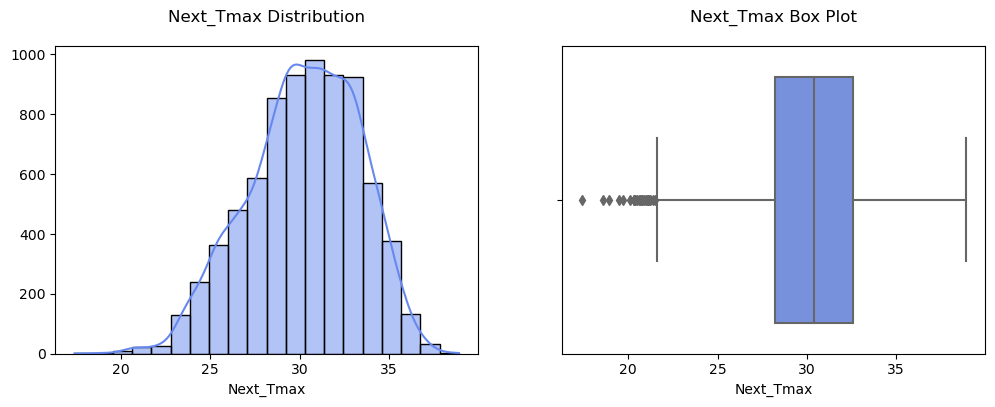

Skewness of Next_Tmax : -0.3348416351390219


In [31]:
#Visualize target distribution
col = 'Next_Tmax'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.set_palette('coolwarm')
sns.histplot(df[col], kde=True , bins=20, ax=axes[0])
sns.boxplot(df[col], ax=axes[1])

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of Next_Tmax is skewed to the left. There are outliers present in the Box plot.

#### 1.4.1.2 Next_Tmin feature

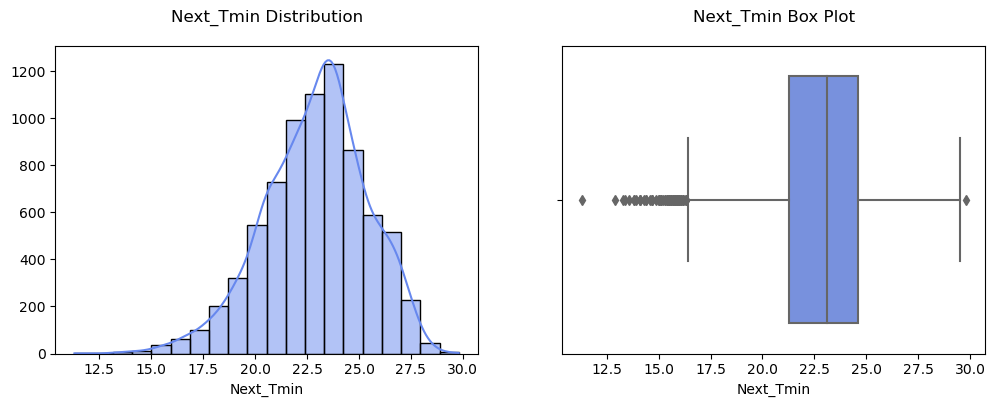

Skewness of Next_Tmin : -0.3936624459457225


In [32]:
#Visualize target distribution
col = 'Next_Tmin'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.set_palette('coolwarm')
sns.histplot(df[col], kde=True , bins=20, ax=axes[0])
sns.boxplot(df[col], ax=axes[1])

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of Next_Tmin is skewed to the left. There are outliers present in the Box plot.

#### 1.4.1.3 Independent variables 

##### Categorical columns

In [33]:
# add possition column to categorical_col instead of lat and lon
categorical_col = categorical_col + ['position']
categorical_col.remove('lat')
categorical_col.remove('lon')


In [34]:
# List of numerical columns that look like categories
for i,col in enumerate(categorical_col):
    print(f"{i+1}. {col}")

1. station
2. DEM
3. Slope
4. position


####  station (1)

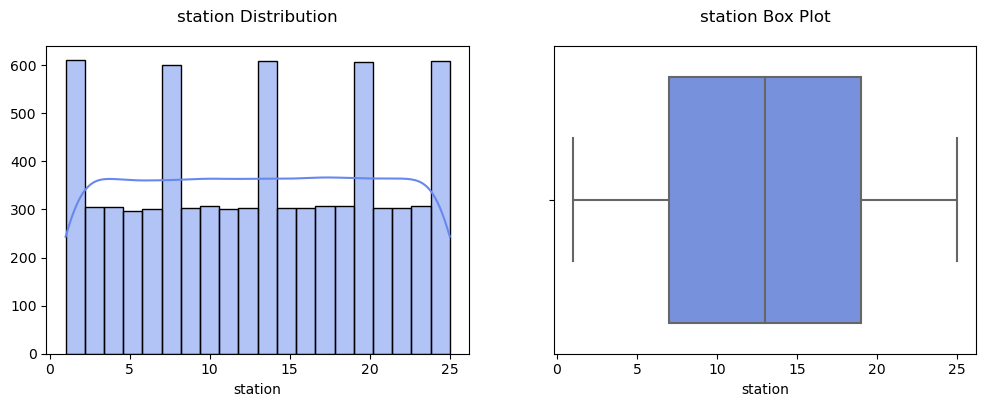

Skewness of station : -0.004177859024526559


In [35]:
#Visualize target distribution
col = 'station'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.set_palette('coolwarm')
sns.histplot(df[col], kde=True , bins=20, ax=axes[0])
sns.boxplot(df[col], ax=axes[1])

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of station is uniform. There are no outliers present in the Box plot.

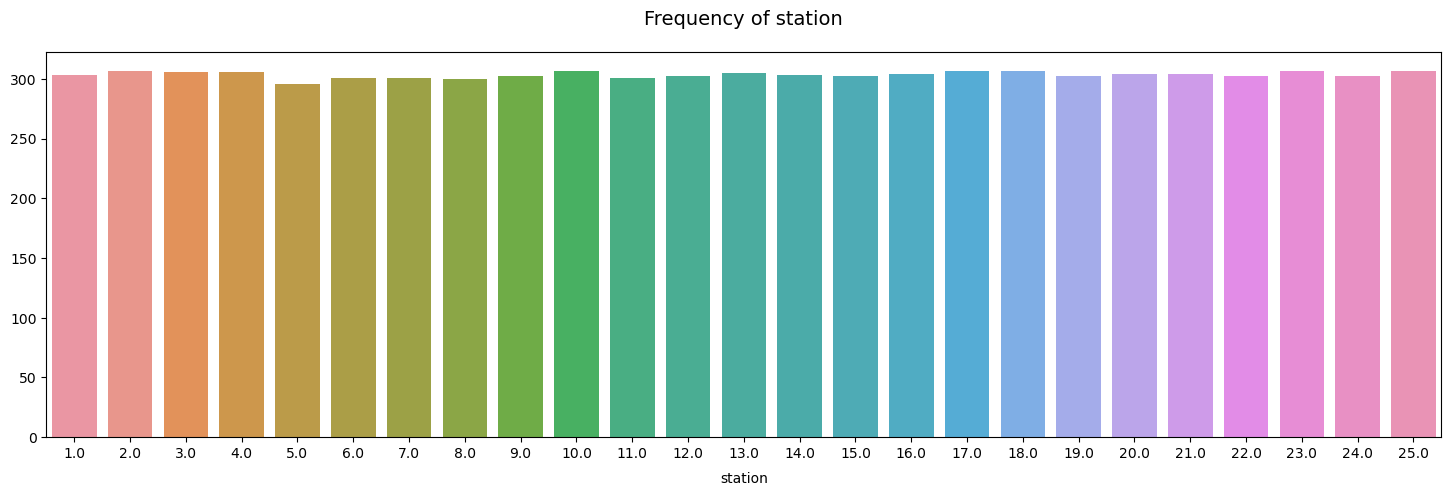

In [36]:
# Set the custom palette
sns.set_palette('Pastel1')

# Visualize the frequency of station (1)
column = 'station'
plt.figure(figsize=(18, 5))
ax = sns.countplot(x=column, data=df)

plt.xlabel(column, size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {column}", size=14, y=1.05);

#### DEM(2)

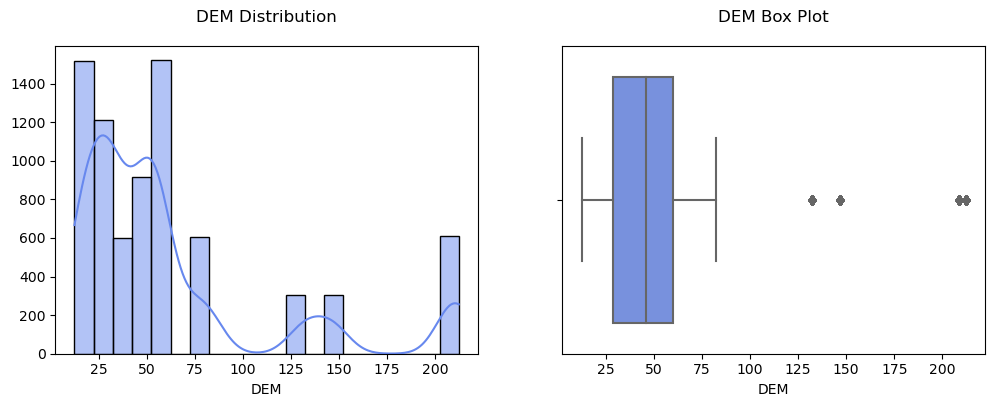

Skewness of DEM : 1.7216166816077285


In [37]:
#Visualize target distribution
col = 'DEM'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.set_palette('coolwarm')
sns.histplot(df[col], kde=True , bins=20, ax=axes[0])
sns.boxplot(df[col], ax=axes[1])

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of DEM is skewed to the right although is discrete. There are some outliers present in the Box plot.

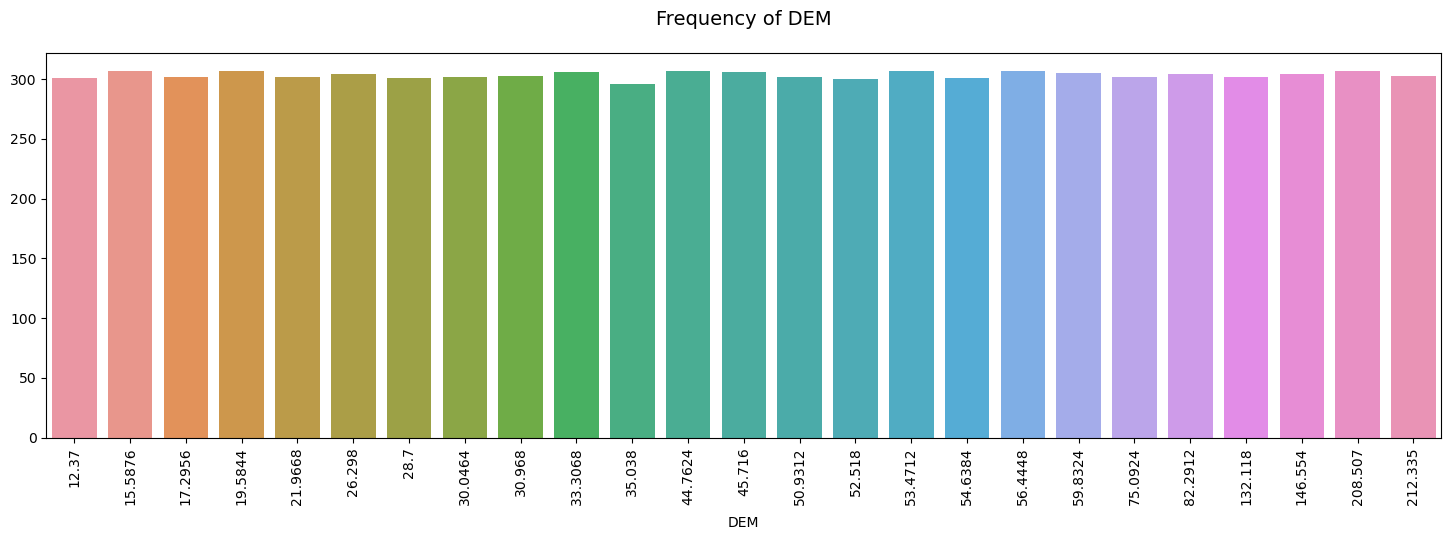

In [38]:
# Set the custom palette
sns.set_palette('Pastel1')

# Visualize the frequency of DEM (2)
column = 'DEM'
plt.figure(figsize=(18, 5))
ax = sns.countplot(x=column, data=df)

plt.xticks(rotation=90)
plt.xlabel(column, size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {column}", size=14, y=1.05);

#### Slope (3)

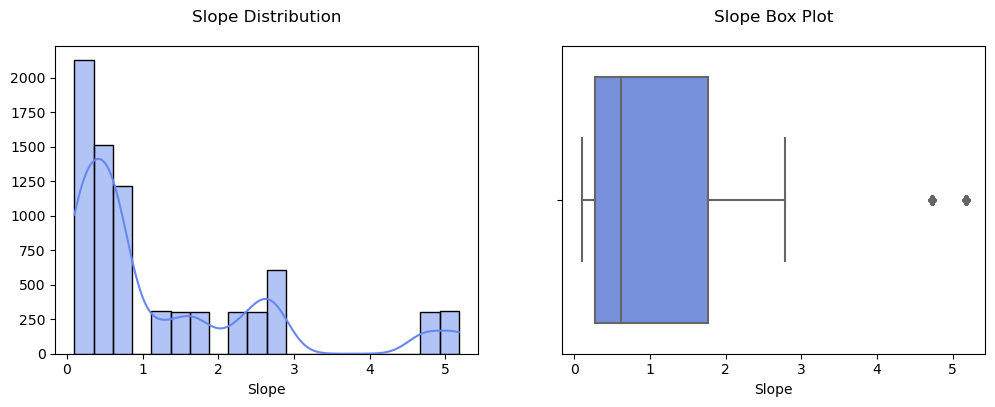

Skewness of Slope : 1.5590502641157087


In [39]:
#Visualize target distribution
col = 'Slope'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.set_palette('coolwarm')
sns.histplot(df[col], kde=True , bins=20, ax=axes[0])
sns.boxplot(df[col], ax=axes[1])

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of Slope is skewed to the right although is discrete. There are some outliers present in the Box plot.

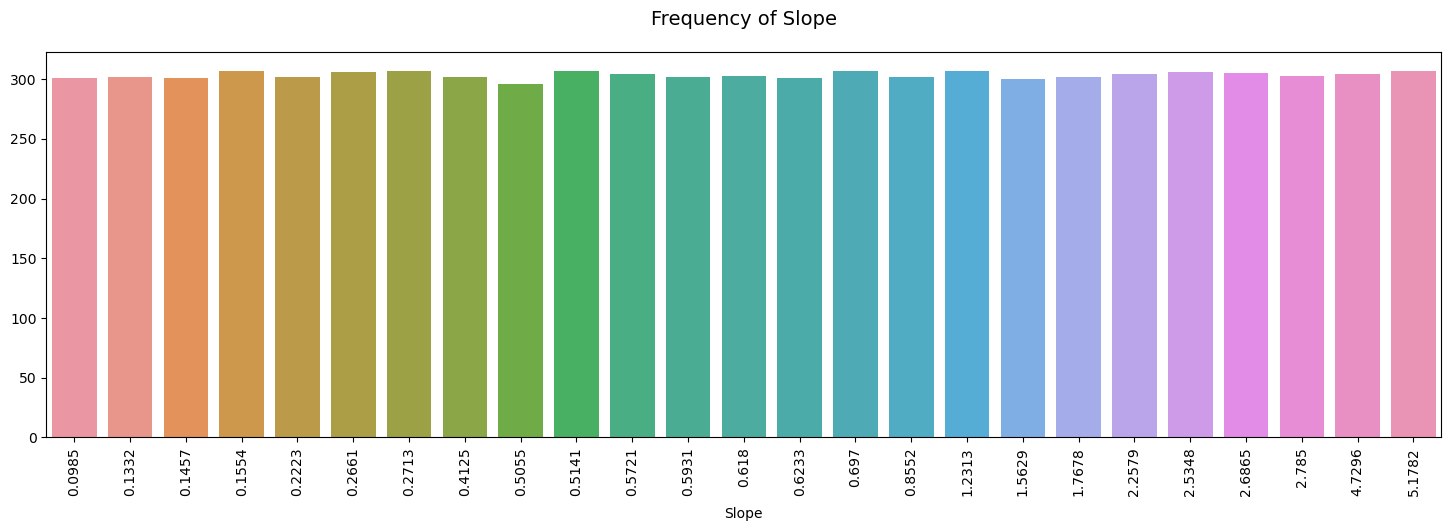

In [40]:
# Set the custom palette
sns.set_palette('Pastel1')

# Visualize the frequency of Slope (3)
column = 'Slope'
plt.figure(figsize=(18, 5))
ax = sns.countplot(x=column, data=df)

plt.xticks(rotation=90)
plt.xlabel(column, size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {column}", size=14, y=1.05);

#### Position (4)

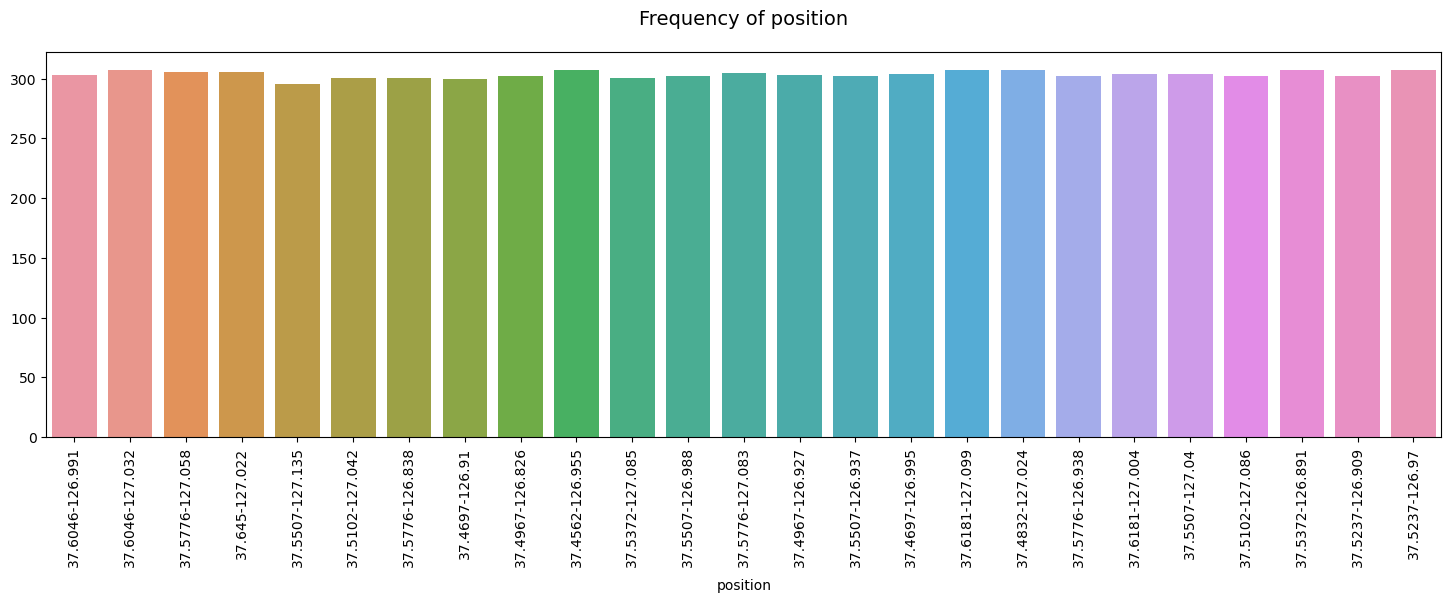

In [41]:
# Set the custom palette
sns.set_palette('Pastel1')

# Visualize the frequency of position (4)
column = 'position'
plt.figure(figsize=(18, 5))
ax = sns.countplot(x=column, data=df)

plt.xticks(rotation=90)
plt.xlabel(column, size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {column}", size=14, y=1.05);

In [42]:
df.position.nunique()

25

The number of observations of each position is almost the same. There are 25 unique position registered.

#### Numerical columns

In [43]:
# List of numerical columns in the dataset
for i,col in enumerate(numerical_col):
    print(f"{i+1}. {col}")

1. Present_Tmax
2. Present_Tmin
3. LDAPS_RHmin
4. LDAPS_RHmax
5. LDAPS_Tmax_lapse
6. LDAPS_Tmin_lapse
7. LDAPS_WS
8. LDAPS_LH
9. LDAPS_CC1
10. LDAPS_CC2
11. LDAPS_CC3
12. LDAPS_CC4
13. LDAPS_PPT1
14. LDAPS_PPT2
15. LDAPS_PPT3
16. LDAPS_PPT4
17. Solar radiation


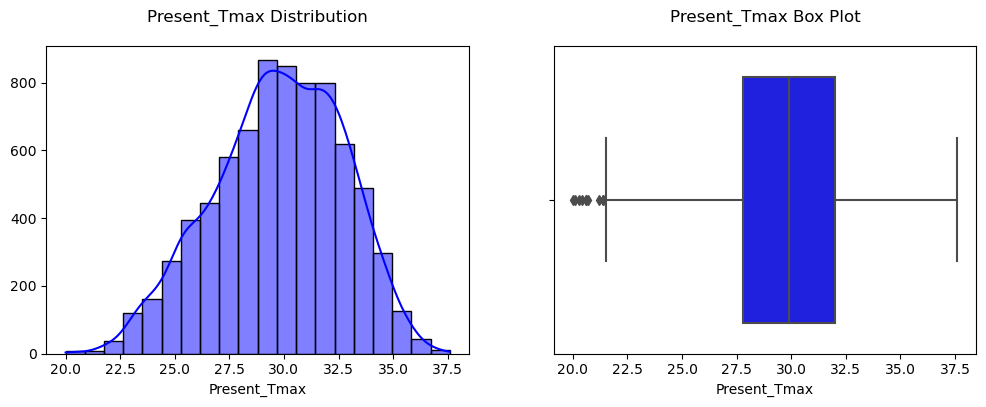

Skewness of Present_Tmax : -0.25706886624626474


In [44]:
#Visualize (1) Present_Tmax
col = 'Present_Tmax'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='blue')
sns.boxplot(df[col], ax=axes[1], color='blue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Present_Tmax
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'Present_Tmax' is slightly skewed to the left. There are outliers present in the Box plot.

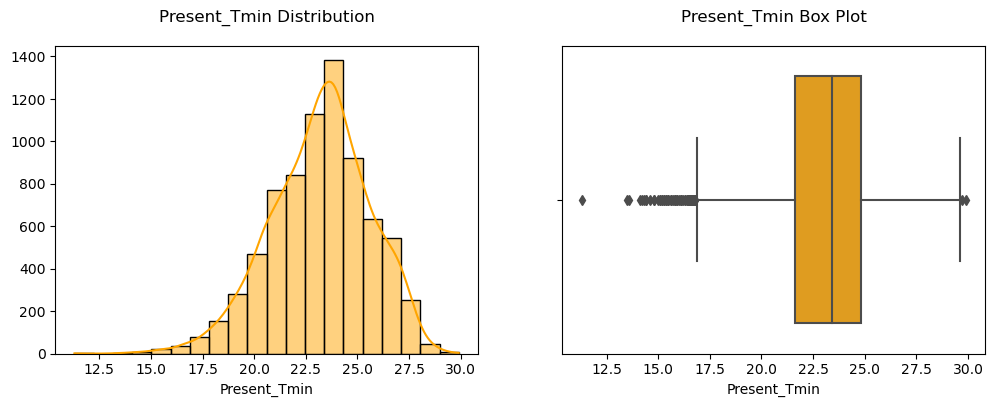

Skewness of Present_Tmin : -0.3538218967241725


In [45]:
#Visualize (2) Present_Tmin
col = 'Present_Tmin'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='orange')
sns.boxplot(df[col], ax=axes[1], color='orange')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Present_Tmin
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'Present_Tmin' is slightly skewed to the left. There are outliers present in the Box plot.

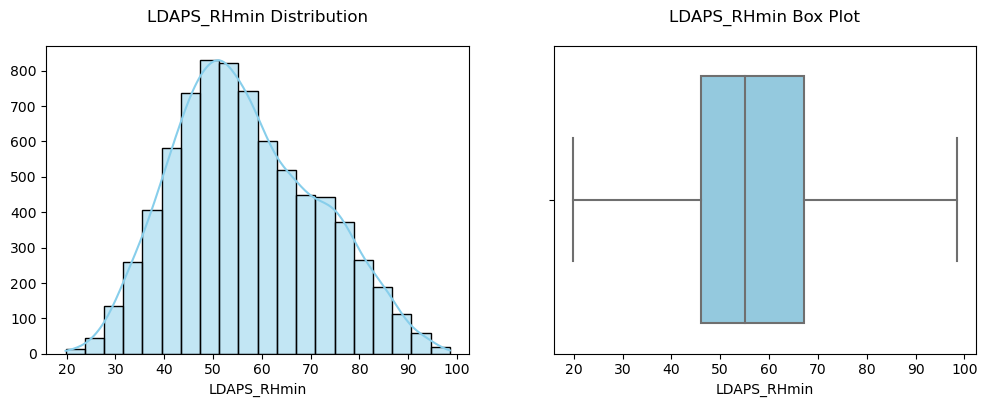

Skewness of LDAPS_RHmin : 0.30139555867014534


In [46]:
#Visualize (3) LDAPS_RHmin
col = 'LDAPS_RHmin'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='skyblue')
sns.boxplot(df[col], ax=axes[1], color='skyblue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of LDAPS_RHmin
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'LDAPS_RHmin' is skewed to the right. There are NO outliers present in the Box plot.

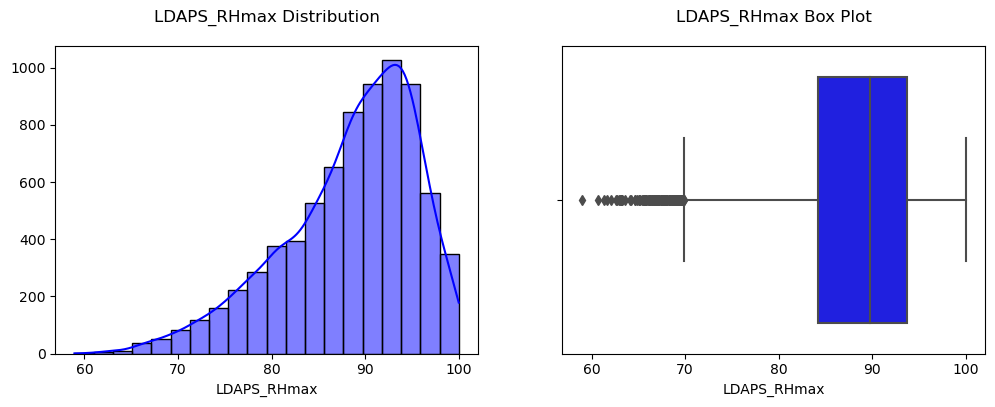

Skewness of LDAPS_RHmax : -0.8452636249574039


In [47]:
#Visualize (4) LDAPS_RHmax
col = 'LDAPS_RHmax'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='blue')
sns.boxplot(df[col], ax=axes[1], color='blue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of LDAPS_RHmax
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'LDAPS_RHmax' is skewed to the left. There are outliers present in the Box plot.

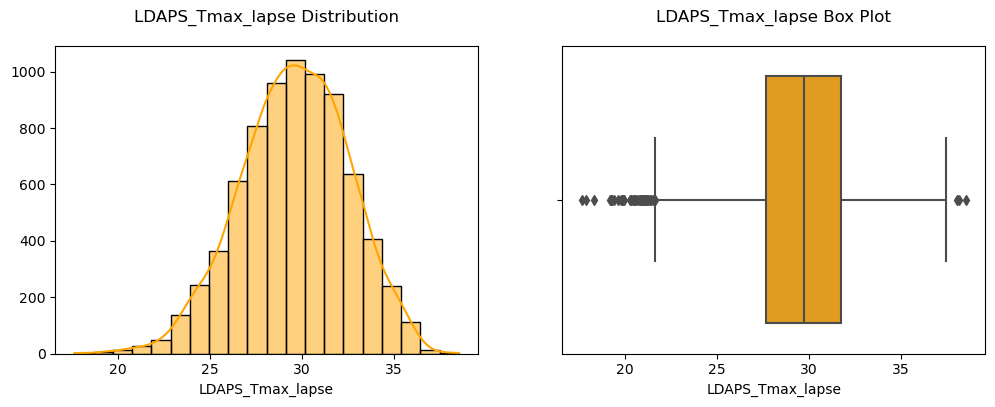

Skewness of LDAPS_Tmax_lapse : -0.22234900075307953


In [48]:
#Visualize (5) LDAPS_Tmax_lapse
col = 'LDAPS_Tmax_lapse'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='orange')
sns.boxplot(df[col], ax=axes[1], color='orange')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Total LDAPS_Tmax_lapse
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'LDAPS_Tmax_lapse' is slightly skewed to the left. There are outliers present in the Box plot.

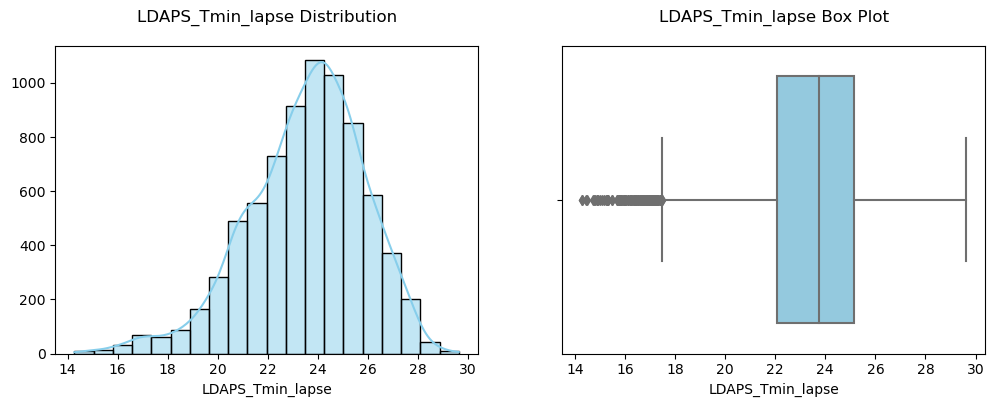

Skewness of LDAPS_Tmin_lapse : -0.5740346797849039


In [49]:
#Visualize (6) LDAPS_Tmin_lapse
col = 'LDAPS_Tmin_lapse'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='skyblue')
sns.boxplot(df[col], ax=axes[1], color='skyblue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of LDAPS_Tmin_lapse
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'LDAPS_Tmin_lapse' is skewed to the left. There are outliers present in the Box plot.

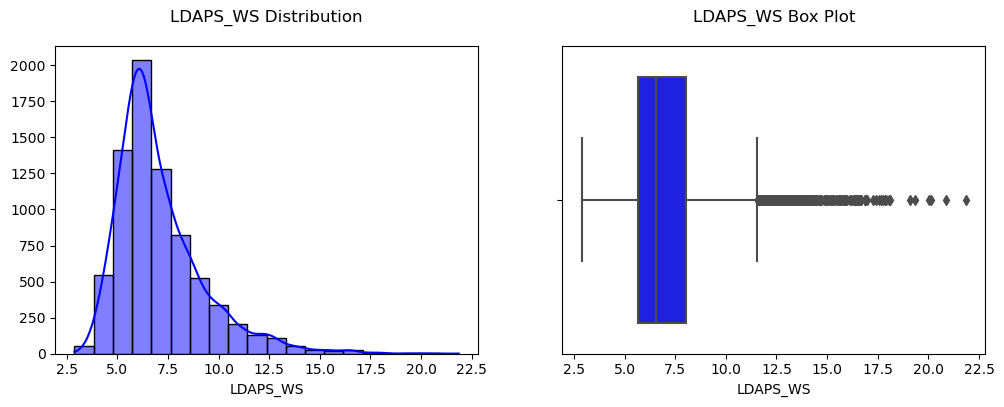

Skewness of LDAPS_WS : 1.5539261125674748


In [50]:
#Visualize (7) LDAPS_WS
col = 'LDAPS_WS'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='blue')
sns.boxplot(df[col], ax=axes[1], color='blue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of LDAPS_WS
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'LDAPS_WS' is skewed to the right. There are outliers present in the Box plot.

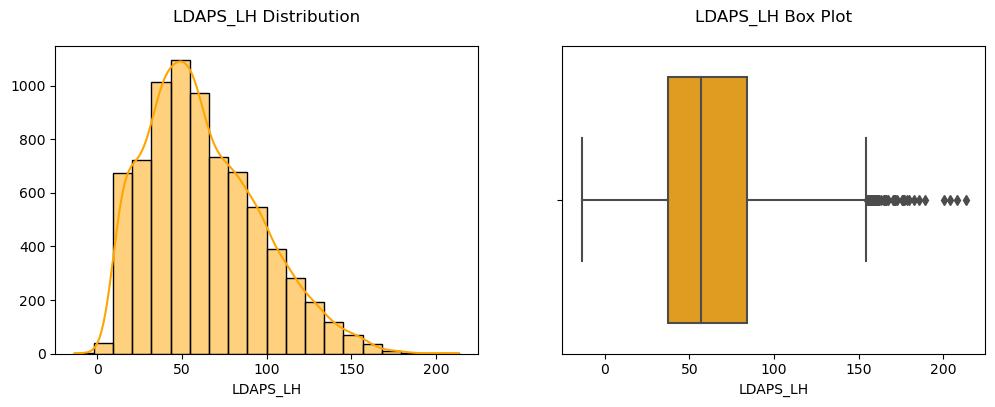

Skewness of LDAPS_LH : 0.6629705787700664


In [51]:
#Visualize (8) LDAPS_LH
col = 'LDAPS_LH'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='orange')
sns.boxplot(df[col], ax=axes[1], color='orange')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of LDAPS_LH
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'LDAPS_LH' is skewed to the right. There are outliers present in the Box plot.

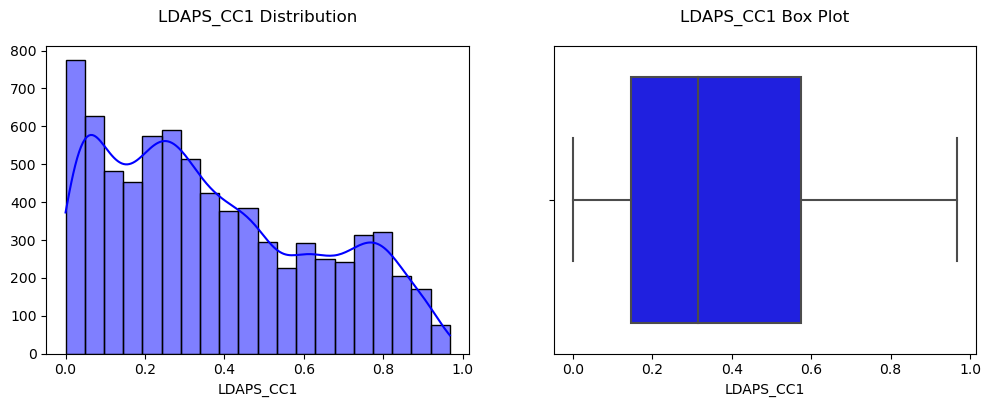

Skewness of LDAPS_CC1 : 0.4567158382781983


In [52]:
#Visualize (9) LDAPS_CC1
col = 'LDAPS_CC1'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='blue')
sns.boxplot(df[col], ax=axes[1], color='blue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of LDAPS_CC1
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'LDAPS_CC1' is skewed to the right. There are NO outliers present in the Box plot.

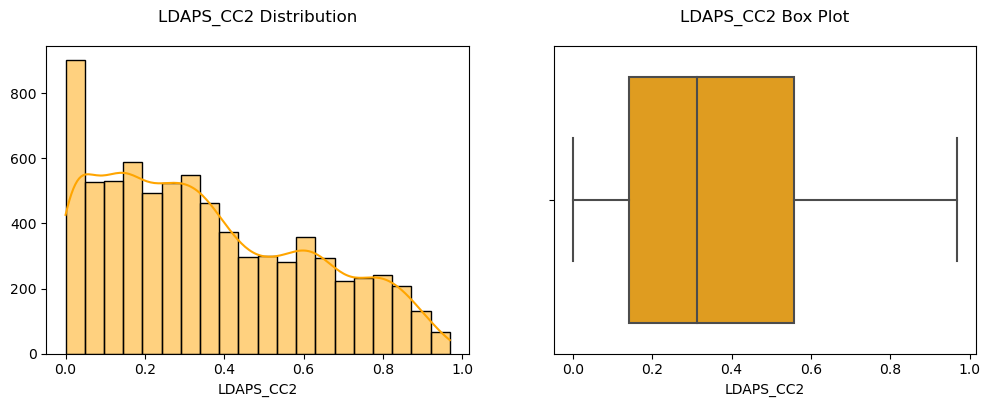

Skewness of LDAPS_CC2 : 0.4739293093576641


In [53]:
#Visualize (10) LDAPS_CC2
col = 'LDAPS_CC2'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='orange')
sns.boxplot(df[col], ax=axes[1], color='orange')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of LDAPS_CC2
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'LDAPS_CC2' is skewed to the right. There are NO outliers present in the Box plot.

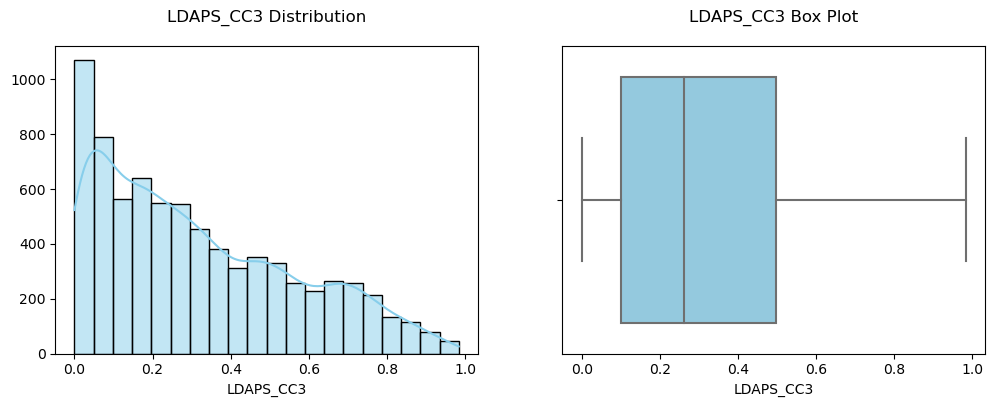

Skewness of LDAPS_CC3 : 0.6396492372098013


In [54]:
#Visualize (11) LDAPS_CC3
col = 'LDAPS_CC3'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='skyblue')
sns.boxplot(df[col], ax=axes[1], color='skyblue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of LDAPS_CC3
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'LDAPS_CC3' is skewed to the right. There are NO outliers present in the Box plot.

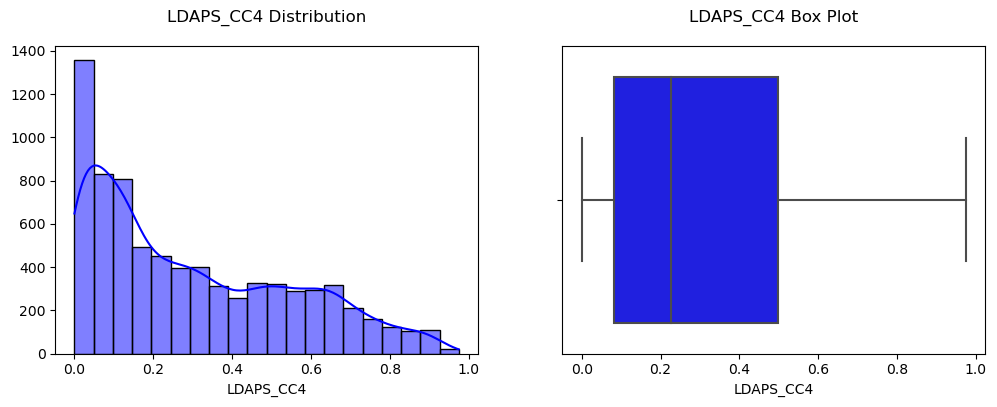

Skewness of LDAPS_CC4 : 0.6638153419746528


In [55]:
#Visualize (12) LDAPS_CC4
col = 'LDAPS_CC4'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='blue')
sns.boxplot(df[col], ax=axes[1], color='blue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of LDAPS_CC4
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'LDAPS_CC4' is skewed to the right. There are NO outliers present in the Box plot.

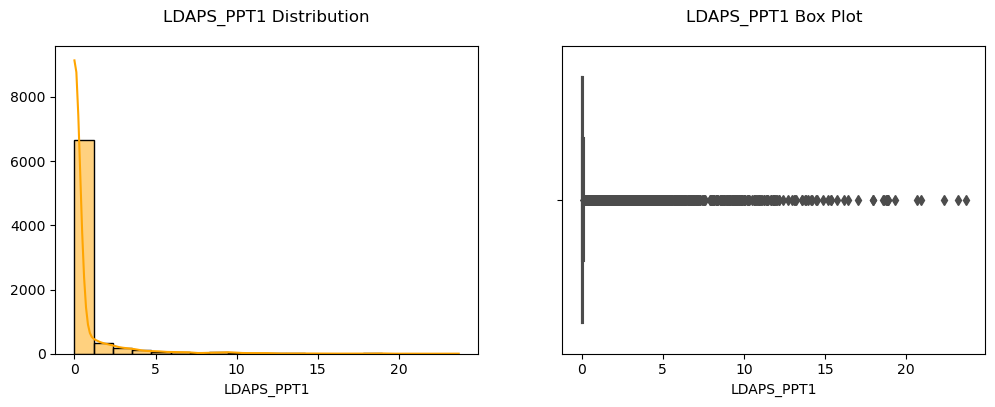

Skewness of LDAPS_PPT1 : 5.3059059957975325


In [56]:
#Visualize (13) LDAPS_PPT1
col = 'LDAPS_PPT1'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='orange')
sns.boxplot(df[col], ax=axes[1], color='orange')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Total LDAPS_PPT1
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'LDAPS_PPT1' is skewed to the right. There are outliers present in the Box plot.

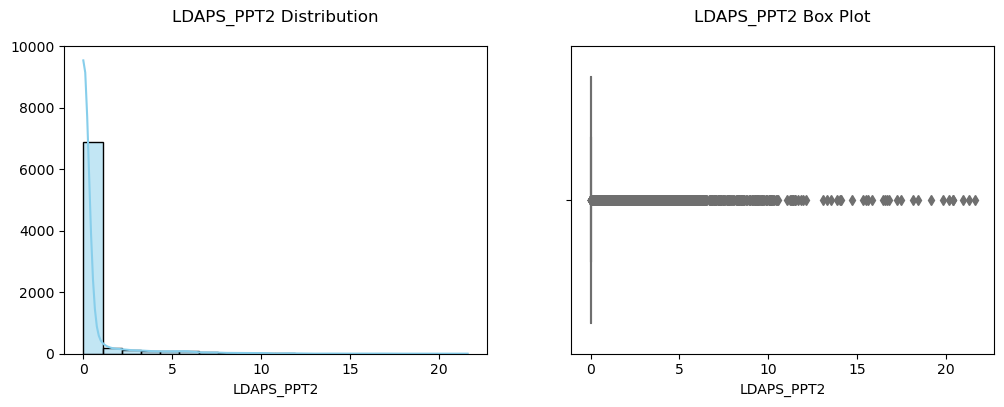

Skewness of LDAPS_PPT2 : 5.710360098053624


In [57]:
#Visualize (14) LDAPS_PPT2
col = 'LDAPS_PPT2'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='skyblue')
sns.boxplot(df[col], ax=axes[1], color='skyblue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of LDAPS_PPT2
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'LDAPS_PPT2' is skewed to the right. There are outliers present in the Box plot.

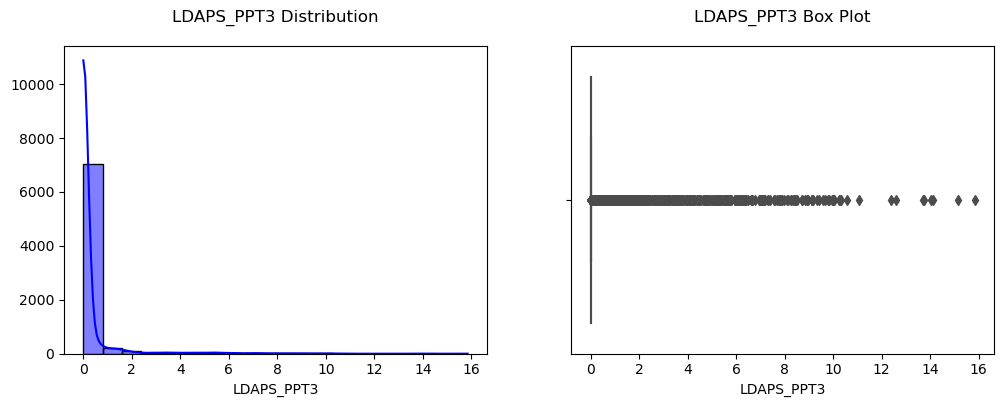

Skewness of LDAPS_PPT3 : 6.356670451431369


In [58]:
#Visualize (15) LDAPS_PPT3
col = 'LDAPS_PPT3'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='blue')
sns.boxplot(df[col], ax=axes[1], color='blue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of LDAPS_PPT3
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'LDAPS_PPT3' is skewed to the right. There are outliers present in the Box plot.

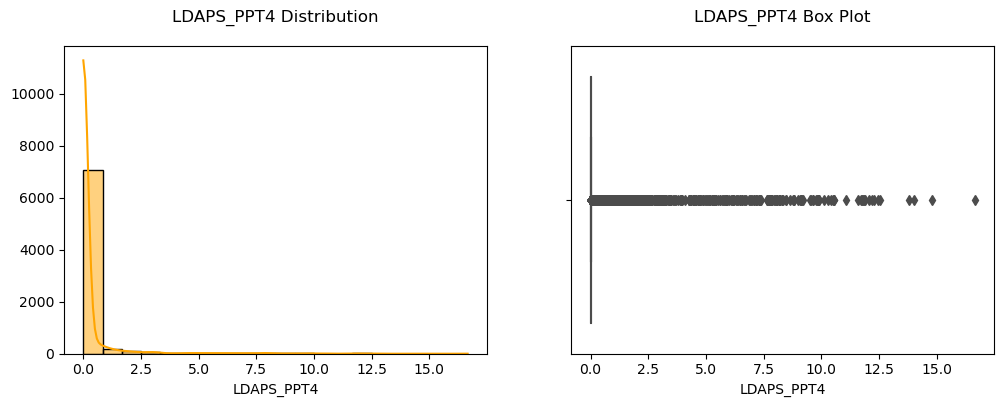

Skewness of LDAPS_PPT4 : 6.6812557353191435


In [59]:
#Visualize (16) LDAPS_PPT4
col = 'LDAPS_PPT4'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='orange')
sns.boxplot(df[col], ax=axes[1], color='orange')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of LDAPS_PPT4
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'LDAPS_PPT4' is skewed to the right. There are outliers present in the Box plot.

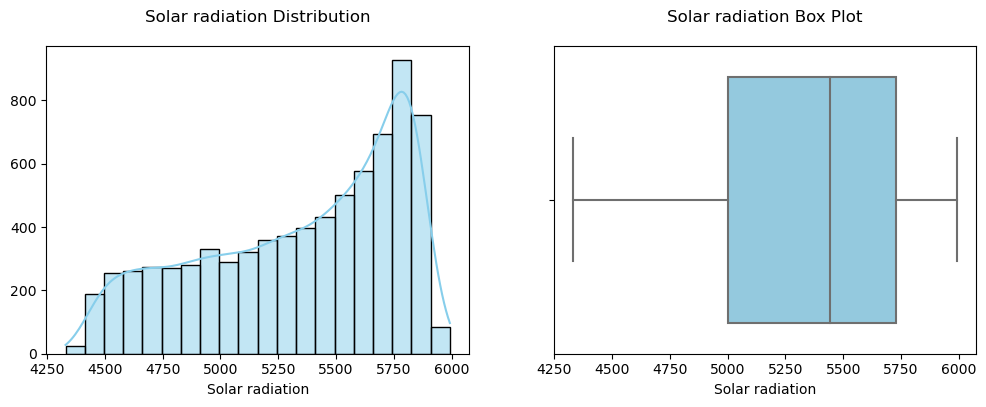

Skewness of Solar radiation : -0.5243245791911233


In [60]:
#Visualize (17) Solar radiation
col = 'Solar radiation'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='skyblue')
sns.boxplot(df[col], ax=axes[1], color='skyblue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Solar radiation
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'Solar radiation' is skewed to the left. There are NO outliers present in the Box plot.

#### 1.4.1.4 Univariate Boxplot

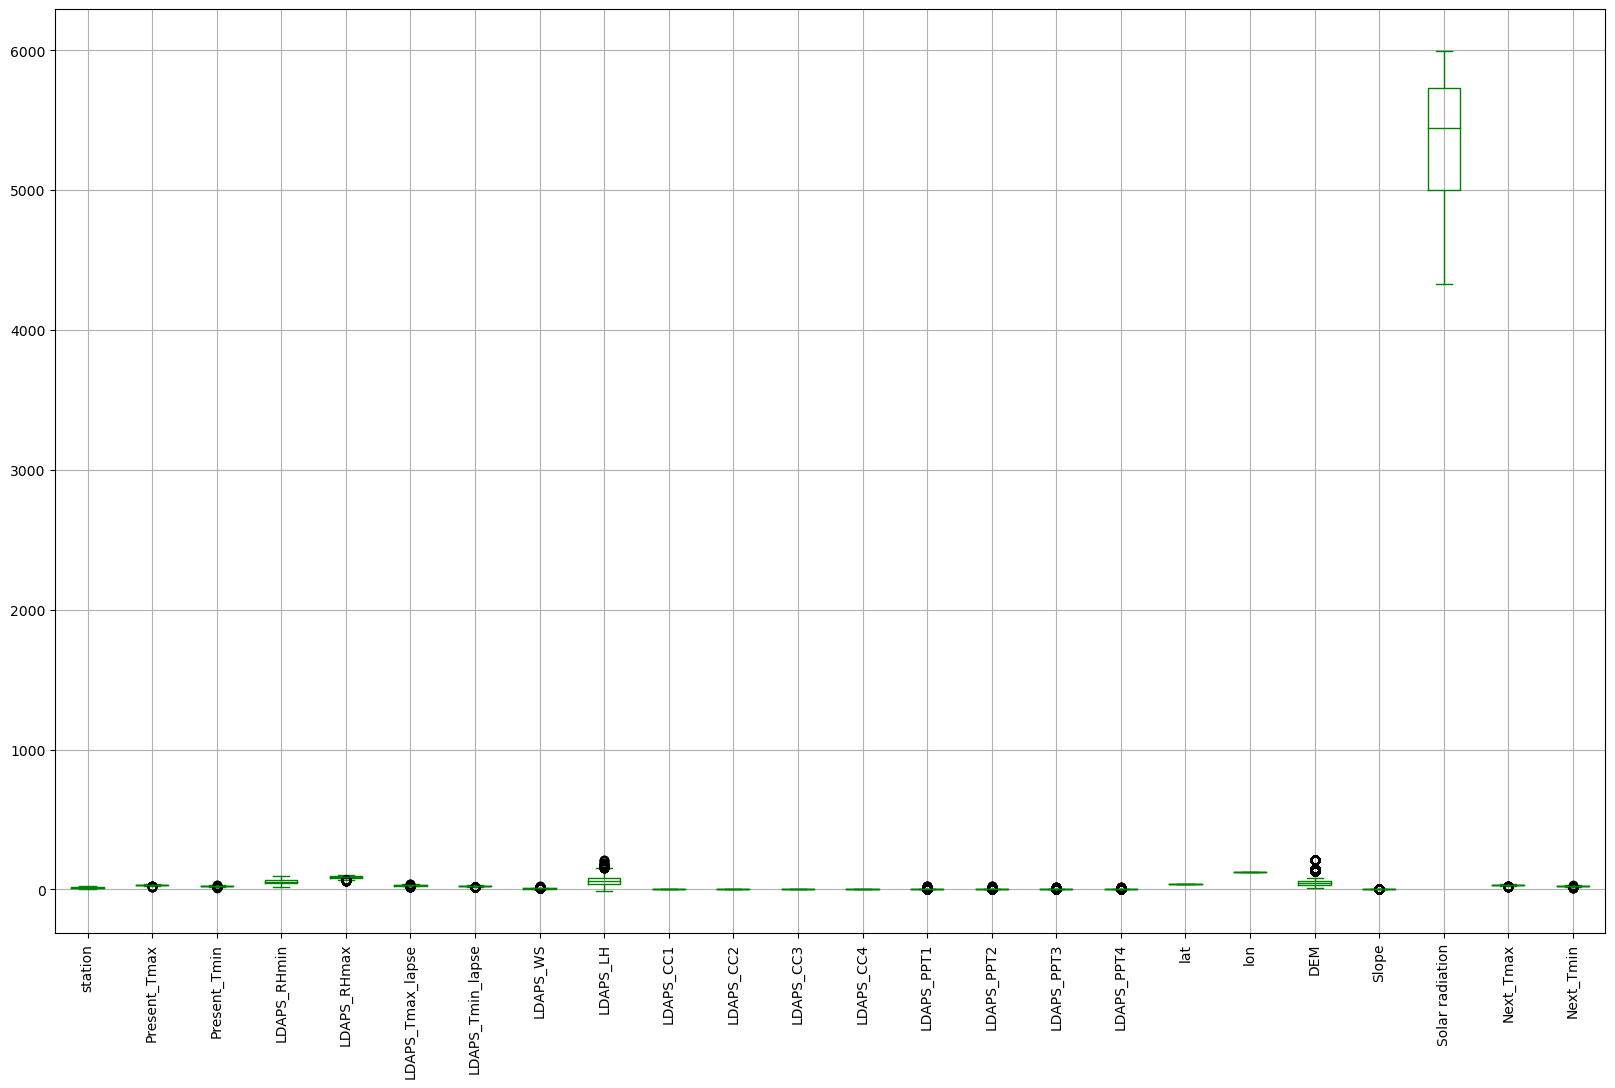

In [61]:
# Draw a boxplot for each independent variable 
df.boxplot(figsize=(20,12), color='green')
plt.xticks(rotation=90)
plt.show()

The data is in different scales therefore it will be scaled later in the analysis. Solar radiation has a different scale noticeably.

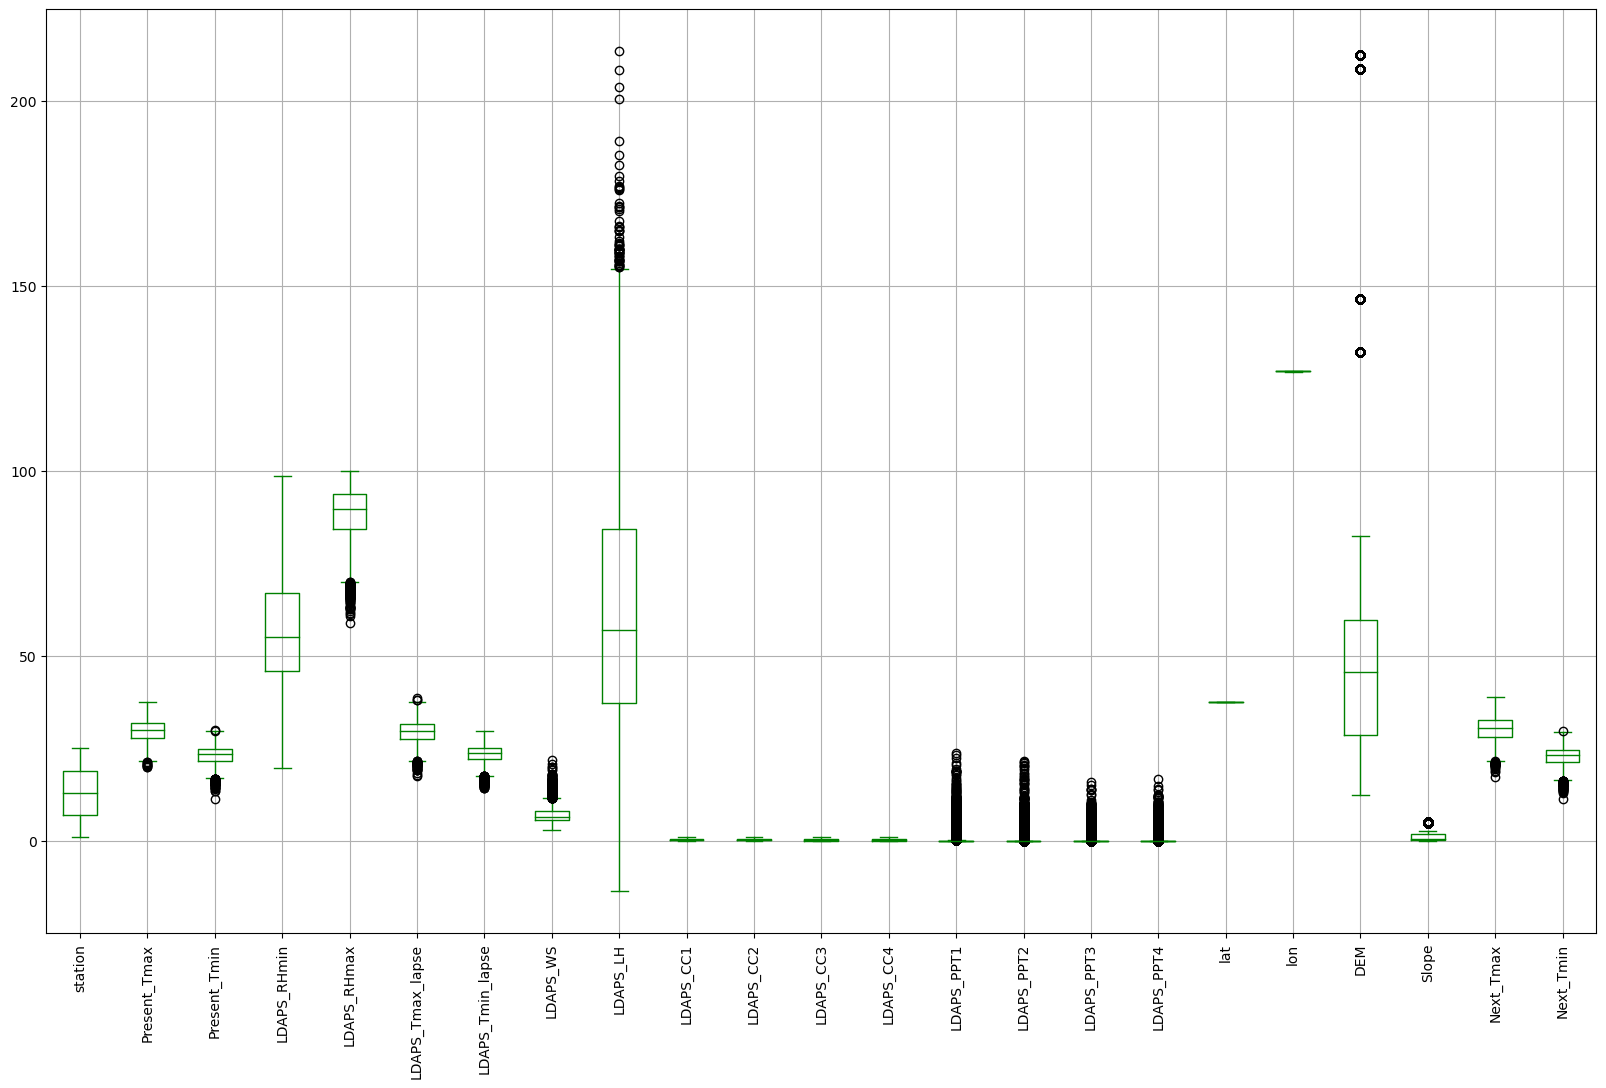

In [62]:
# Draw a boxplot for each independent variable 
df.drop('Solar radiation', axis=1).boxplot(figsize=(20,12), color='green')
plt.xticks(rotation=90)
plt.show()

Above we plot all features but 'Solar radiation' and we can conclude the other columns are in different scales too.

### 1.4.2  Bivariate Analysis

#### 1.4.2.1 Comparing the Next Day's maximum and minimum temperature over time

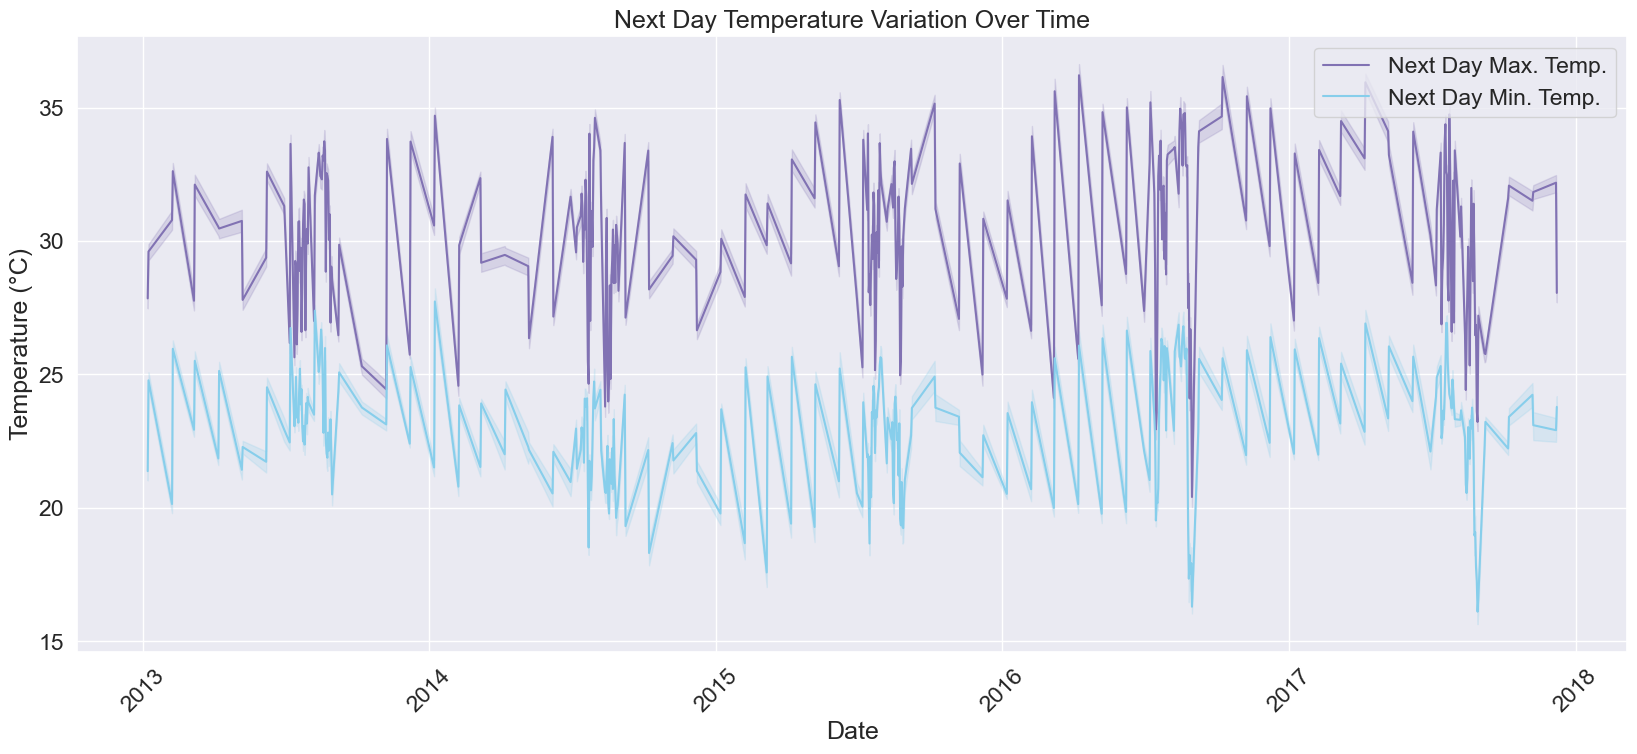

In [63]:
# Style settings
sns.set_style('whitegrid')
sns.set(font_scale=1.5)  
plt.figure(figsize=(20,8))

# line plot for the maximum temperature 
sns.lineplot(x='Date', y='Next_Tmax', data=df, label='Next Day Max. Temp.', color='m')

# line plot for the minimun temperature 
sns.lineplot(x='Date', y='Next_Tmin', data=df, label='Next Day Min. Temp.', color='skyblue')

# style the plot
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.title('Next Day Temperature Variation Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

plt.show()

The above plot shows how the maximum and minimum next-day temperature was registered over time. The maximum temperature registered was about 36 C in the last quarter of 2016, and the lowest where registered in the last quarter of 2018.

#### 1.4.2.2 Comparison of current maximum and minimum temperature over time

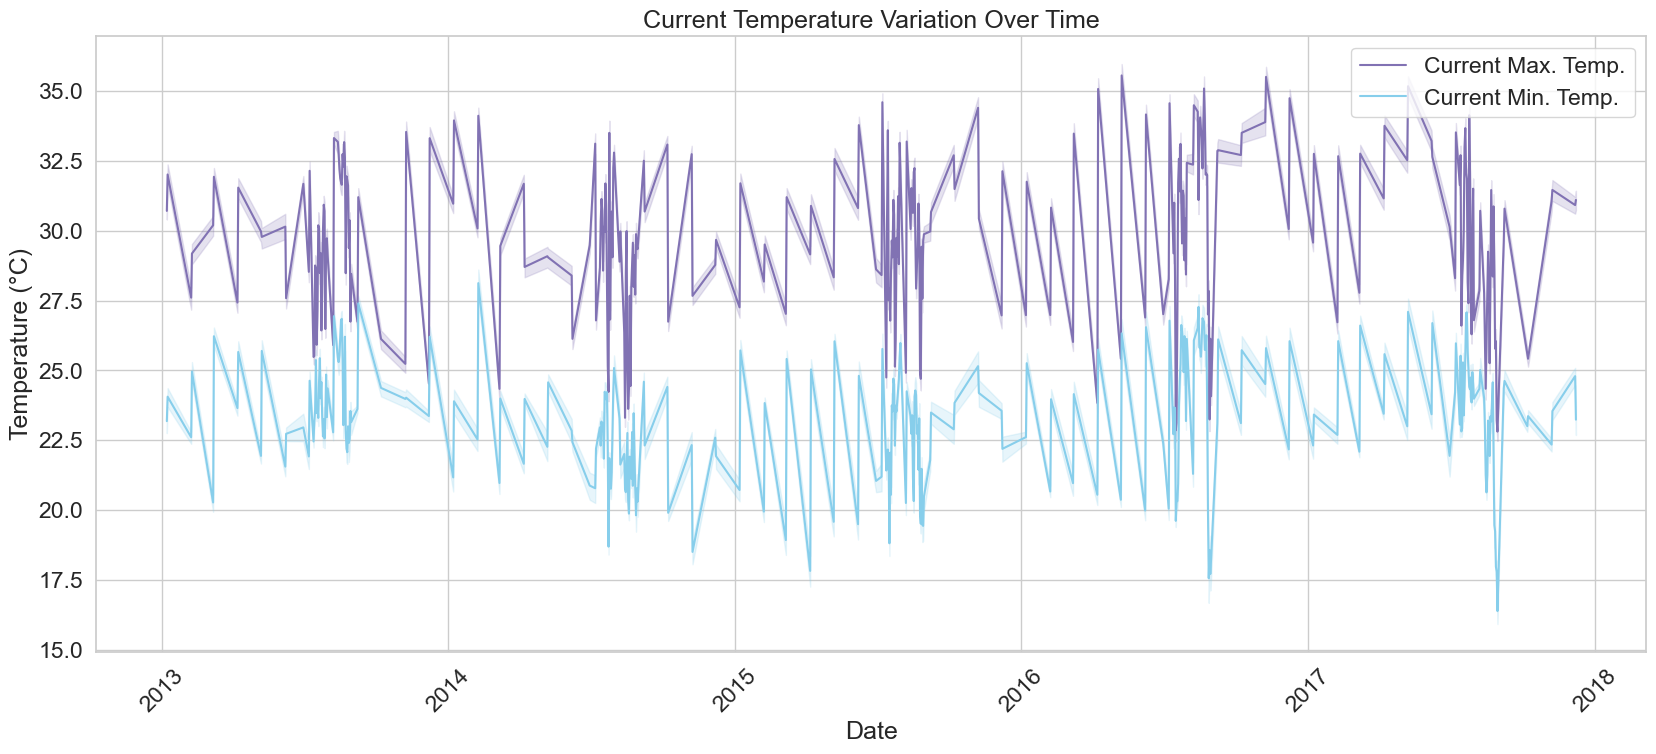

In [64]:
# Style settings
sns.set_style('whitegrid')
plt.figure(figsize=(20,8))

# line plot for the maximum temperature 
sns.lineplot(x='Date', y='Present_Tmax', data=df, label='Current Max. Temp.', color='m')

# line plot for the minimun temperature 
sns.lineplot(x='Date', y='Present_Tmin', data=df, label='Current Min. Temp.', color='skyblue')

# style the plot
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.title('Current Temperature Variation Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

plt.show()

Above plot shows how the maximum and minimum current temperature was registered over the time.

#### 1.4.2.3 Comparison of Next Day's humidity level over time

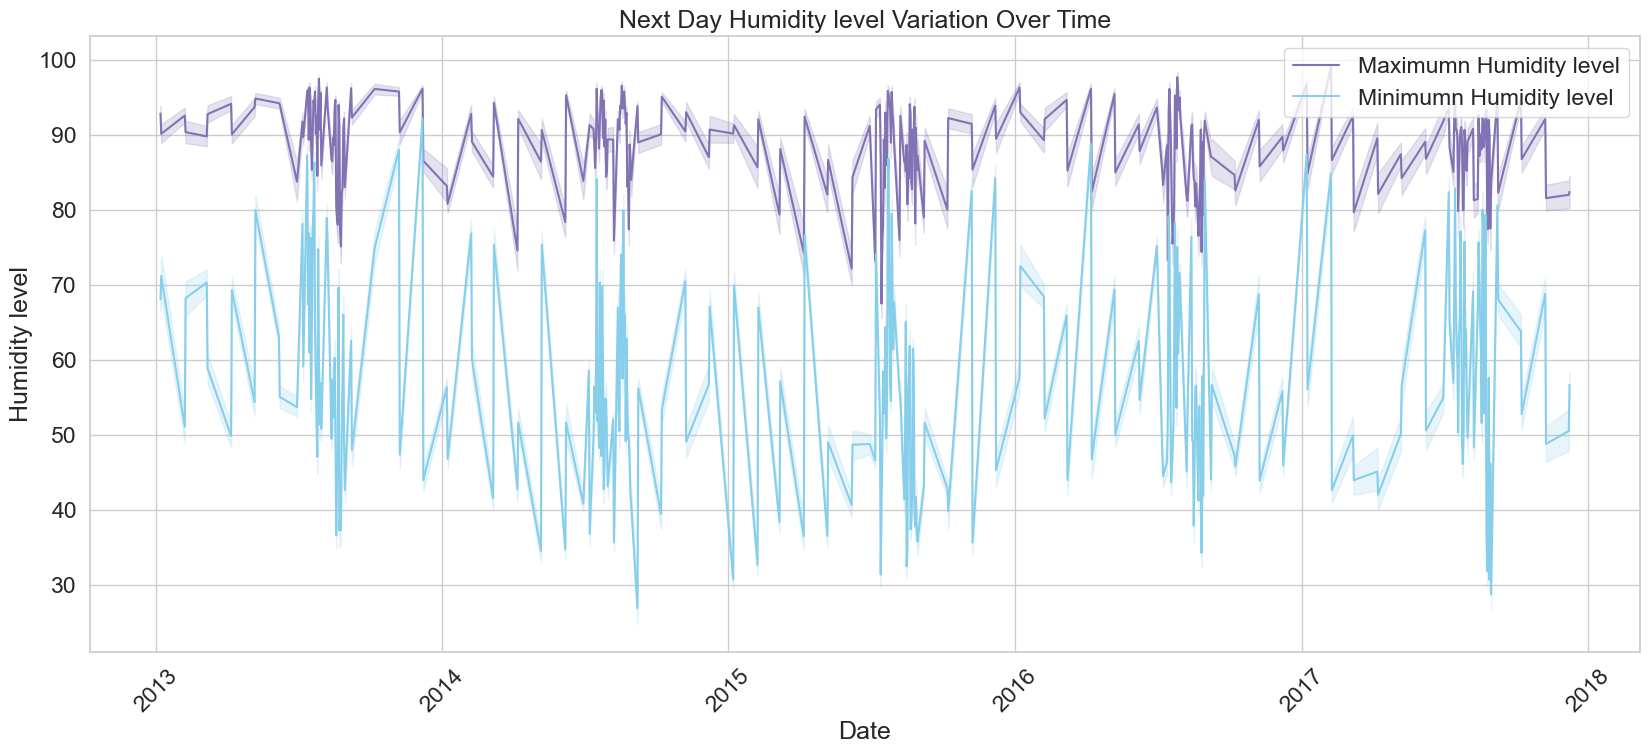

In [65]:
# Style settings
sns.set_style('whitegrid')
plt.figure(figsize=(20,8))

# line plot for the maximum humidity level 
sns.lineplot(x='Date', y='LDAPS_RHmax', data=df, label='Maximumn Humidity level', color='m')

# line plot for the minimun humidity level 
sns.lineplot(x='Date', y='LDAPS_RHmin', data=df, label='Minimumn Humidity level', color='skyblue')

# style the plot
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.title('Next Day Humidity level Variation Over Time')
plt.xlabel('Date')
plt.ylabel('Humidity level')

plt.show()

Above plot shows how the maximum and minimum next-day humidity level was registered over the time.

#### 1.4.2.4 Comparison of Next Day's Temperatue applied lapse rate over time

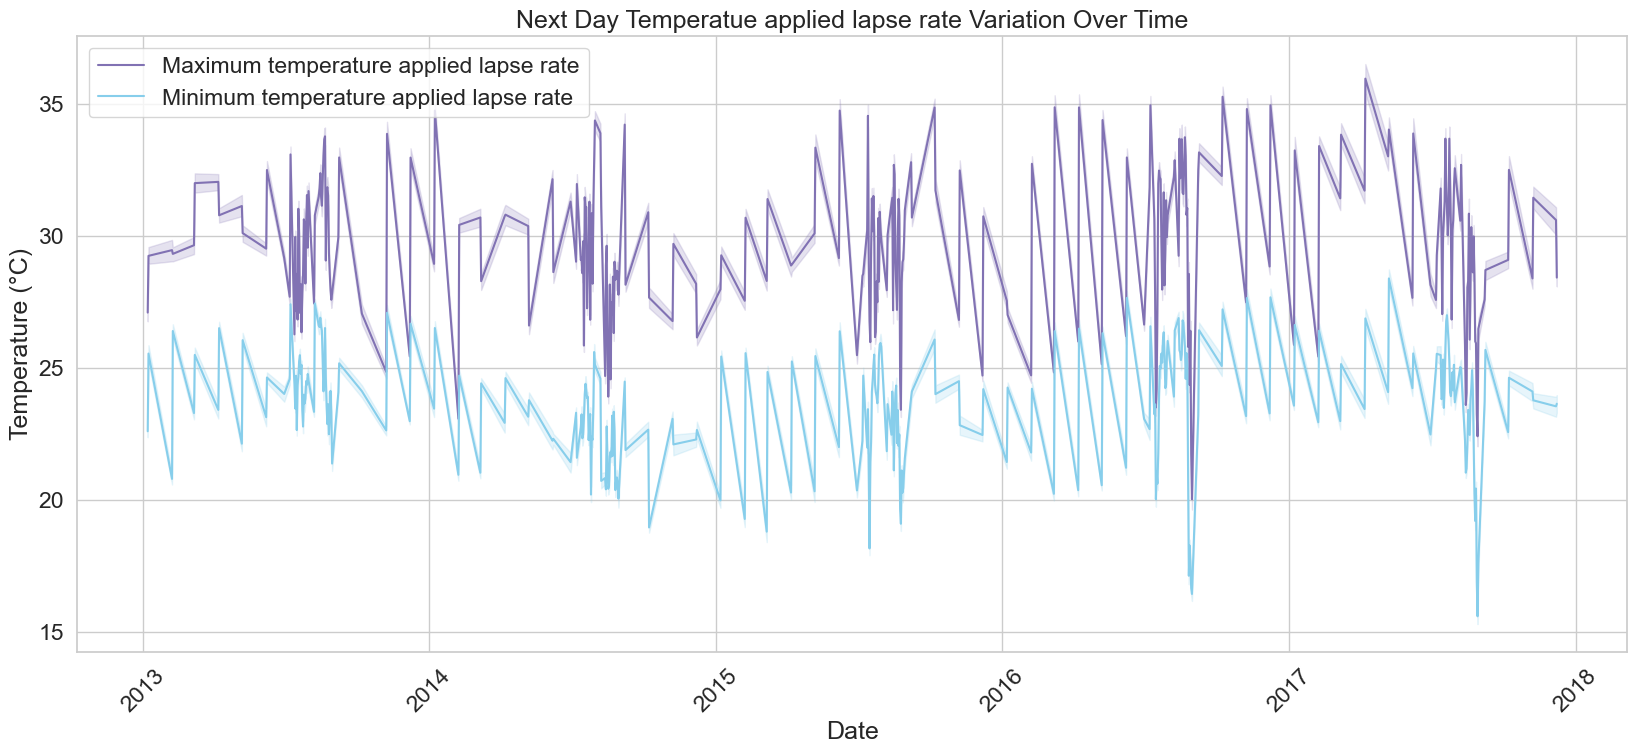

In [66]:
# Style settings
sns.set_style('whitegrid')
plt.figure(figsize=(20,8))

# line plot for the maximum temperature 
sns.lineplot(x='Date', y='LDAPS_Tmax_lapse', data=df, label='Maximum temperature applied lapse rate', color='m')

# line plot for the minimun temperature 
sns.lineplot(x='Date', y='LDAPS_Tmin_lapse', data=df, label='Minimum temperature applied lapse rate', color='skyblue')

# style the plot
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Next Day Temperatue applied lapse rate Variation Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

plt.show()

Above plot shows how the maximum and minimum next-day temperature applied lapse rate was registered over the time.

#### 1.4.2.5 Comparison model forecast of next-day split average cloud cover over time

* LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
* LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
* LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
* LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97

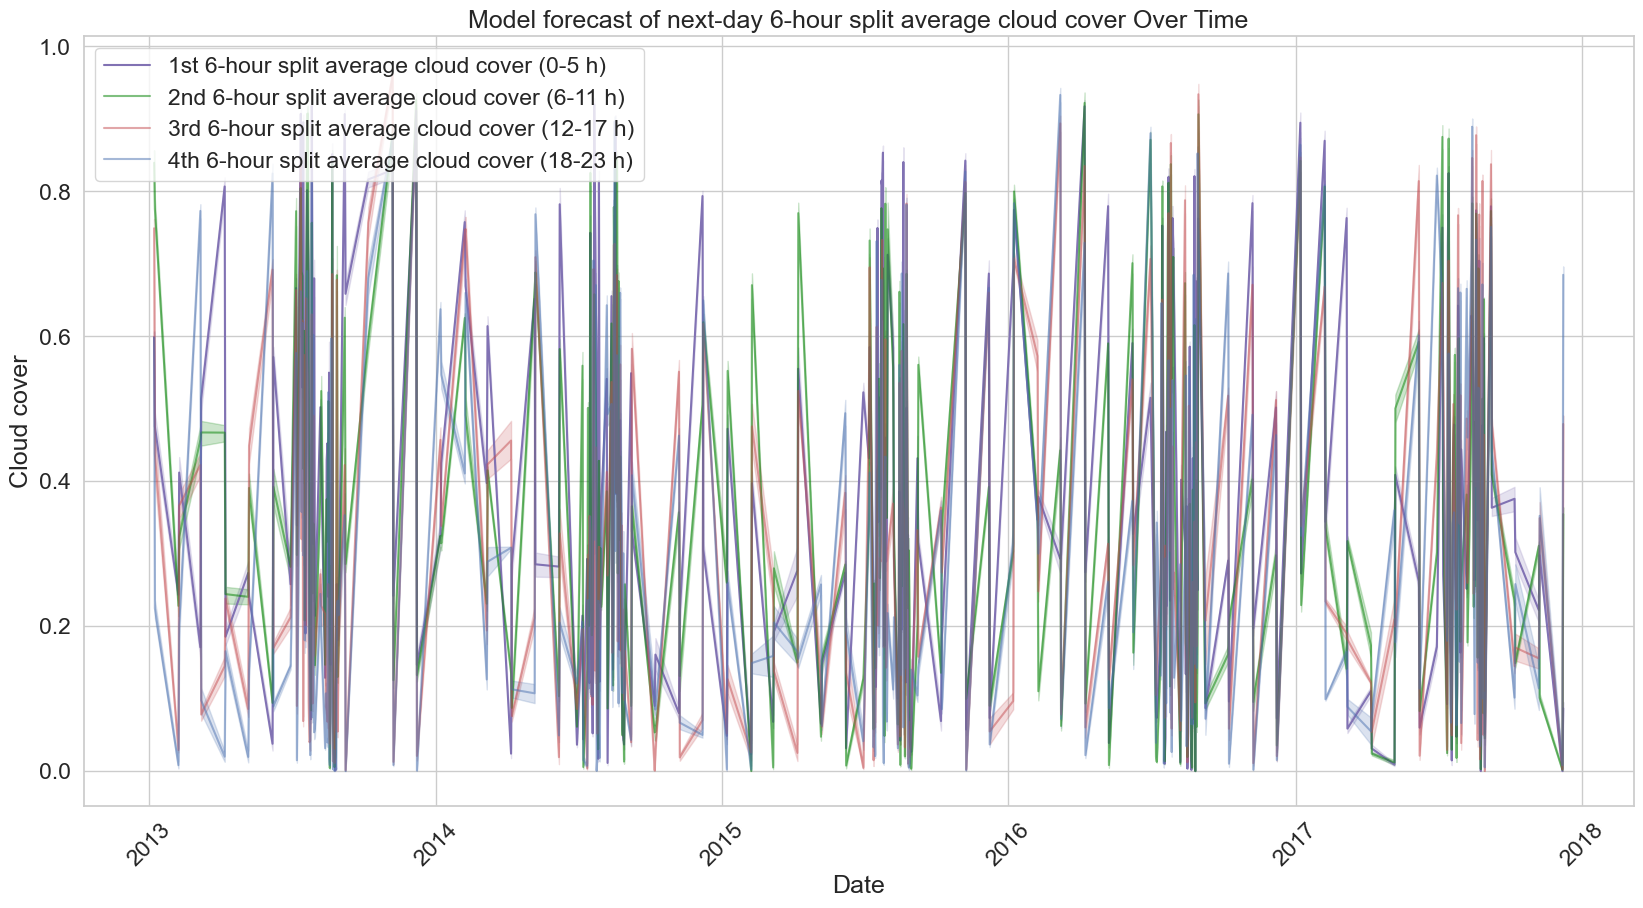

In [67]:
# Style settings
sns.set_style('whitegrid')
plt.figure(figsize=(20, 10))

sns.lineplot(x='Date', y='LDAPS_CC1', data=df, label='1st 6-hour split average cloud cover (0-5 h)', color='m')
sns.lineplot(x='Date', y='LDAPS_CC2', data=df, label='2nd 6-hour split average cloud cover (6-11 h)', color='green', alpha=.5)
sns.lineplot(x='Date', y='LDAPS_CC3', data=df, label='3rd 6-hour split average cloud cover (12-17 h)', color='r', alpha=.5)
sns.lineplot(x='Date', y='LDAPS_CC4', data=df, label='4th 6-hour split average cloud cover (18-23 h)', color='b', alpha=.5)

# style the plot
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Model forecast of next-day 6-hour split average cloud cover Over Time')
plt.xlabel('Date')
plt.ylabel('Cloud cover')

plt.show()

Above plot shows how the Average cloud cover was registered over the time.

#### 1.4.2.6 Comparison model forecast of next-day split average precipitation over time

* LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
* LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
* LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
* LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7

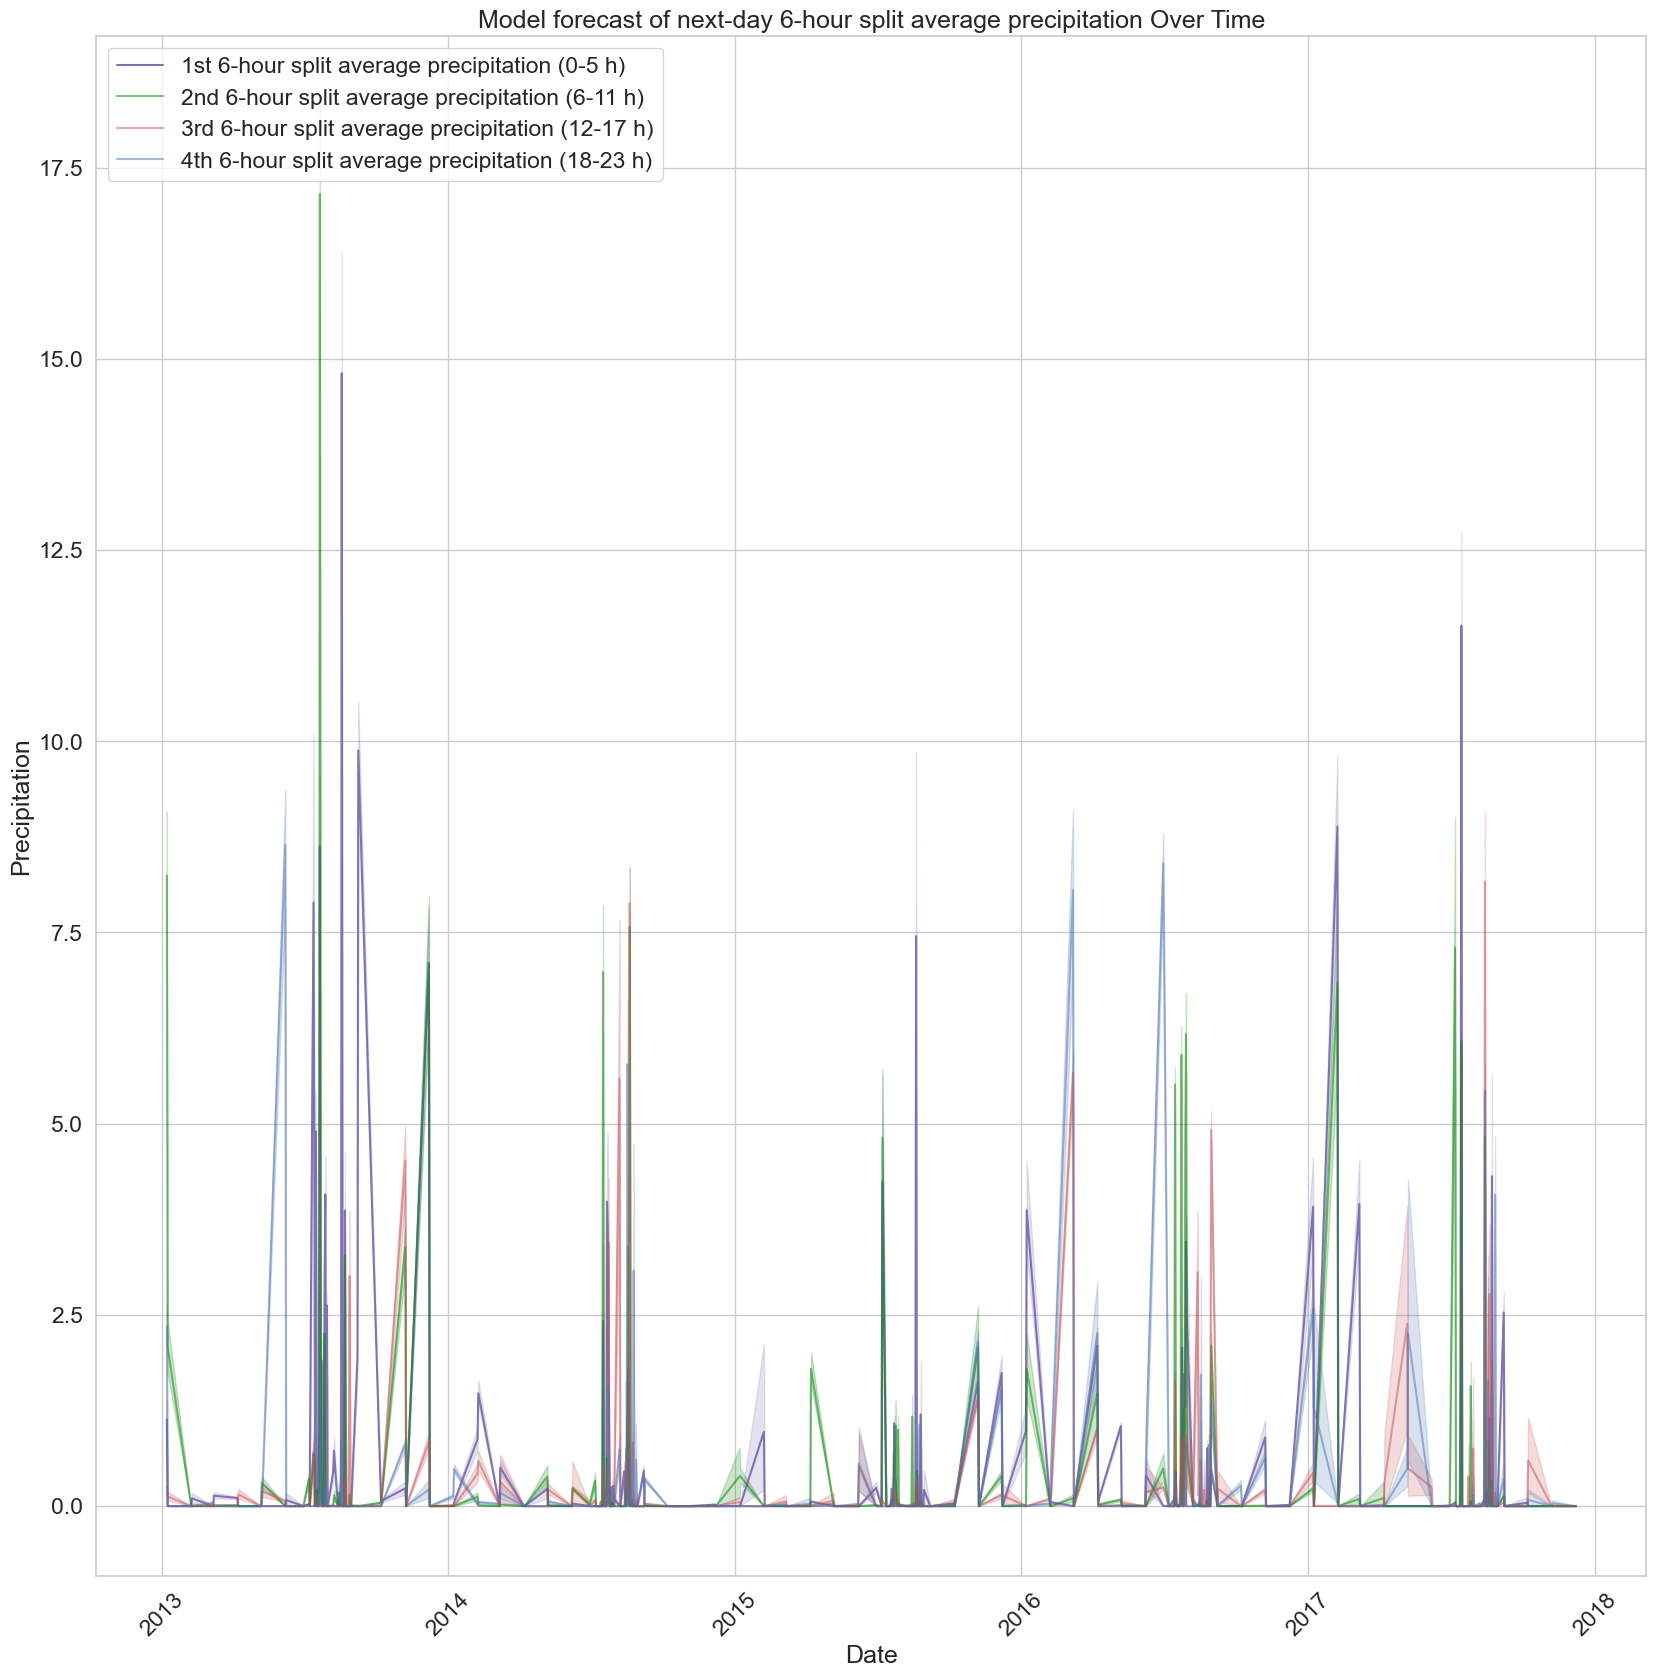

In [68]:
# Style settings
sns.set_style('whitegrid')
plt.figure(figsize=(20,20))

sns.lineplot(x='Date', y='LDAPS_PPT1', data=df, label='1st 6-hour split average precipitation (0-5 h)', color='m')
sns.lineplot(x='Date', y='LDAPS_PPT2', data=df, label='2nd 6-hour split average precipitation (6-11 h)', color='green', alpha=.5)
sns.lineplot(x='Date', y='LDAPS_PPT3', data=df, label='3rd 6-hour split average precipitation (12-17 h)', color='r', alpha=.5)
sns.lineplot(x='Date', y='LDAPS_PPT4', data=df, label='4th 6-hour split average precipitation (18-23 h)', color='b', alpha=.5)

# style the plot
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Model forecast of next-day 6-hour split average precipitation Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation')

plt.show()

Above plot shows how the Average precipitation was registered over the time.

#### 1.4.2.7 Model forecast of next-day average wind speed over time

* LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 

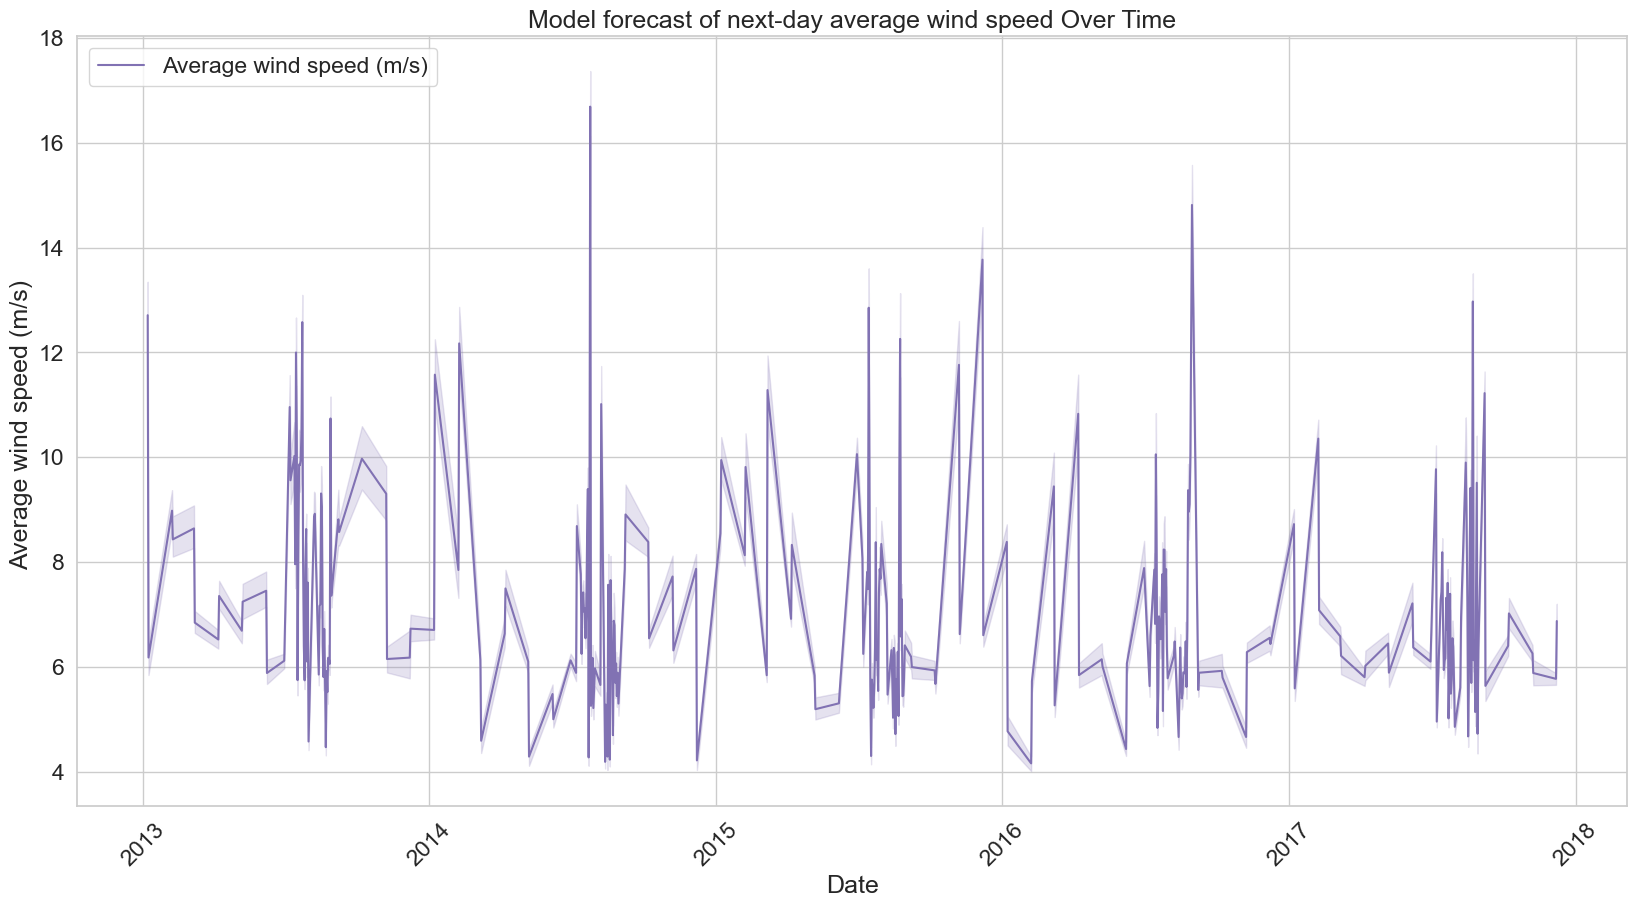

In [69]:
# Style settings
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))

sns.lineplot(x='Date', y='LDAPS_WS', data=df, label='Average wind speed (m/s)', color='m')

# style the plot
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Model forecast of next-day average wind speed Over Time')
plt.xlabel('Date')
plt.ylabel('Average wind speed (m/s) ')

plt.show()

Above plot shows how the next-day average wind speed was registered over the time.

#### 1.4.2.8 Model forecast of next-day average latent heat flux (W/m2) over time

* LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4

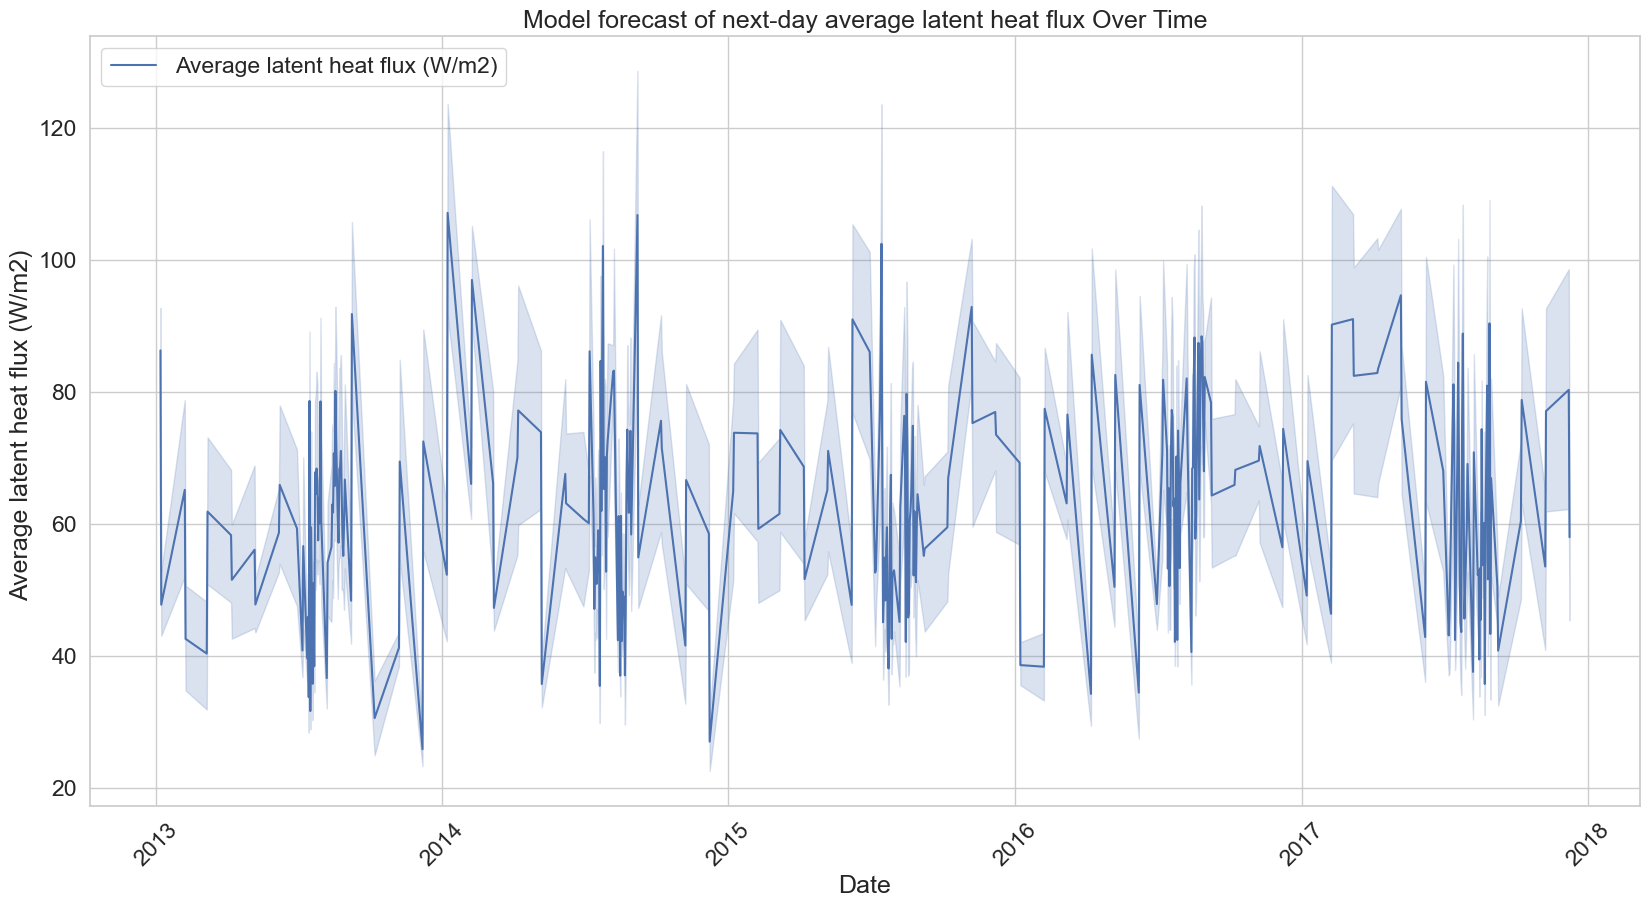

In [70]:
# Style settings
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))

sns.lineplot(x='Date', y='LDAPS_LH', data=df, label='Average latent heat flux (W/m2)', color='b')

# style the plot
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Model forecast of next-day average latent heat flux Over Time')
plt.xlabel('Date')
plt.ylabel('Average latent heat flux (W/m2) ')

plt.show()

Above plot shows how the next-day average latent heat flux was registered over the time.

#### 1.4.2.9 Elevation over time

* DEM - Elevation (m): 12.4 to 212.3

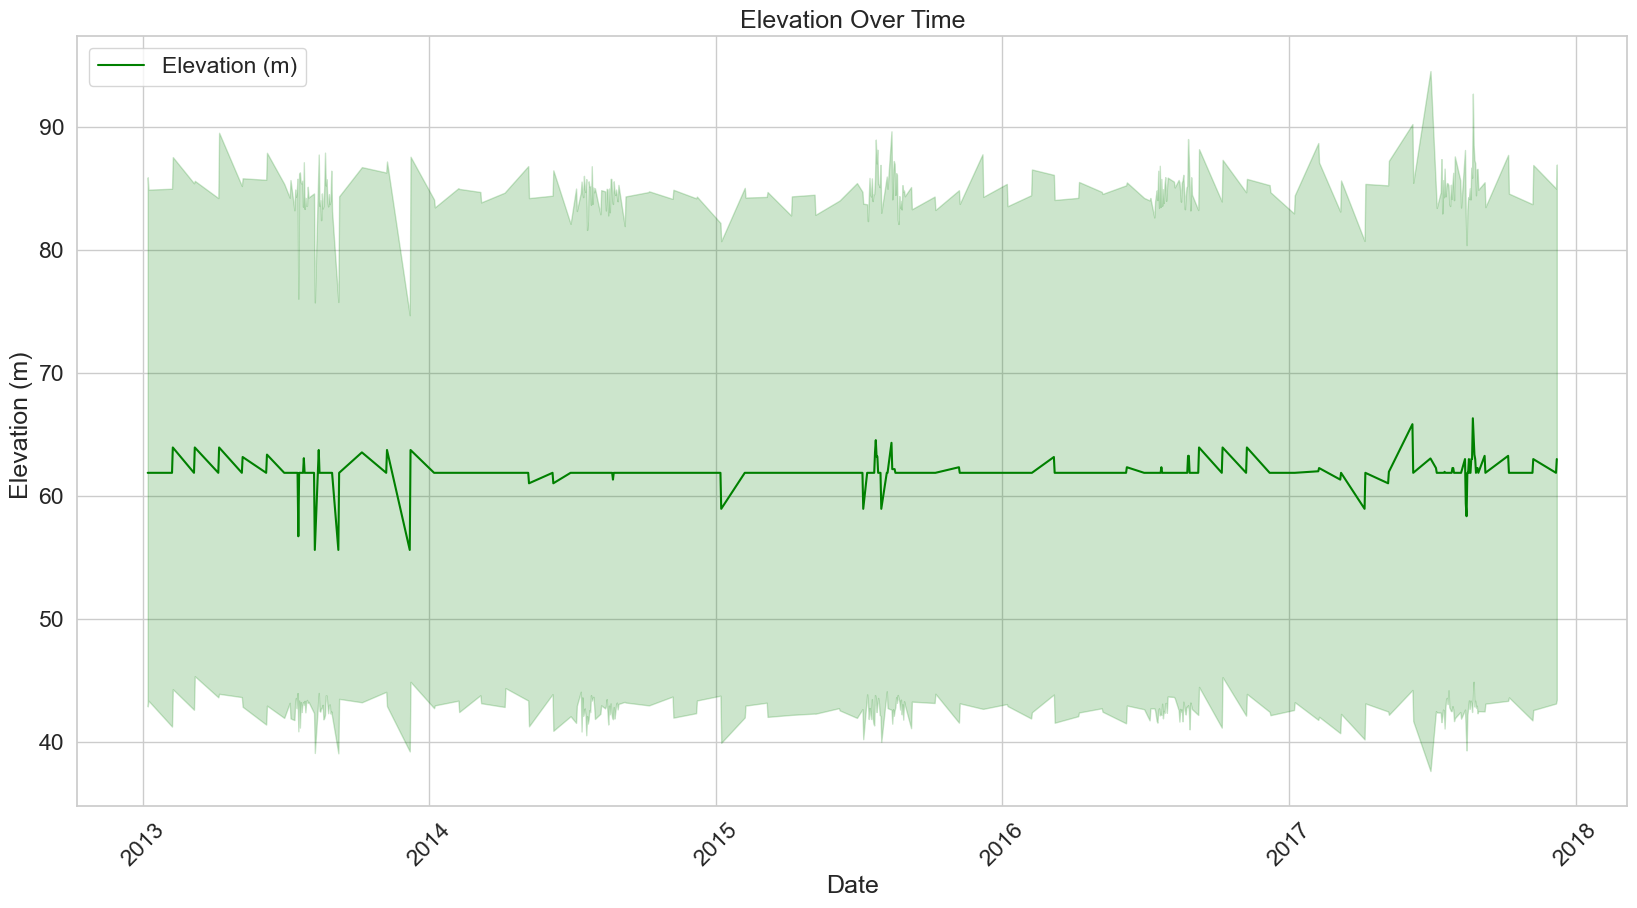

In [71]:
# Style settings
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))

sns.lineplot(x='Date', y='DEM', data=df, label='Elevation (m)', color='green')

# style the plot
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Elevation Over Time')
plt.xlabel('Date')
plt.ylabel('Elevation (m) ')

plt.show()

Above plot shows how the elevation was registered over the time.

#### 1.4.2.10 Slope  over time

* Slope - Slope (Â°): 0.1 to 5.2

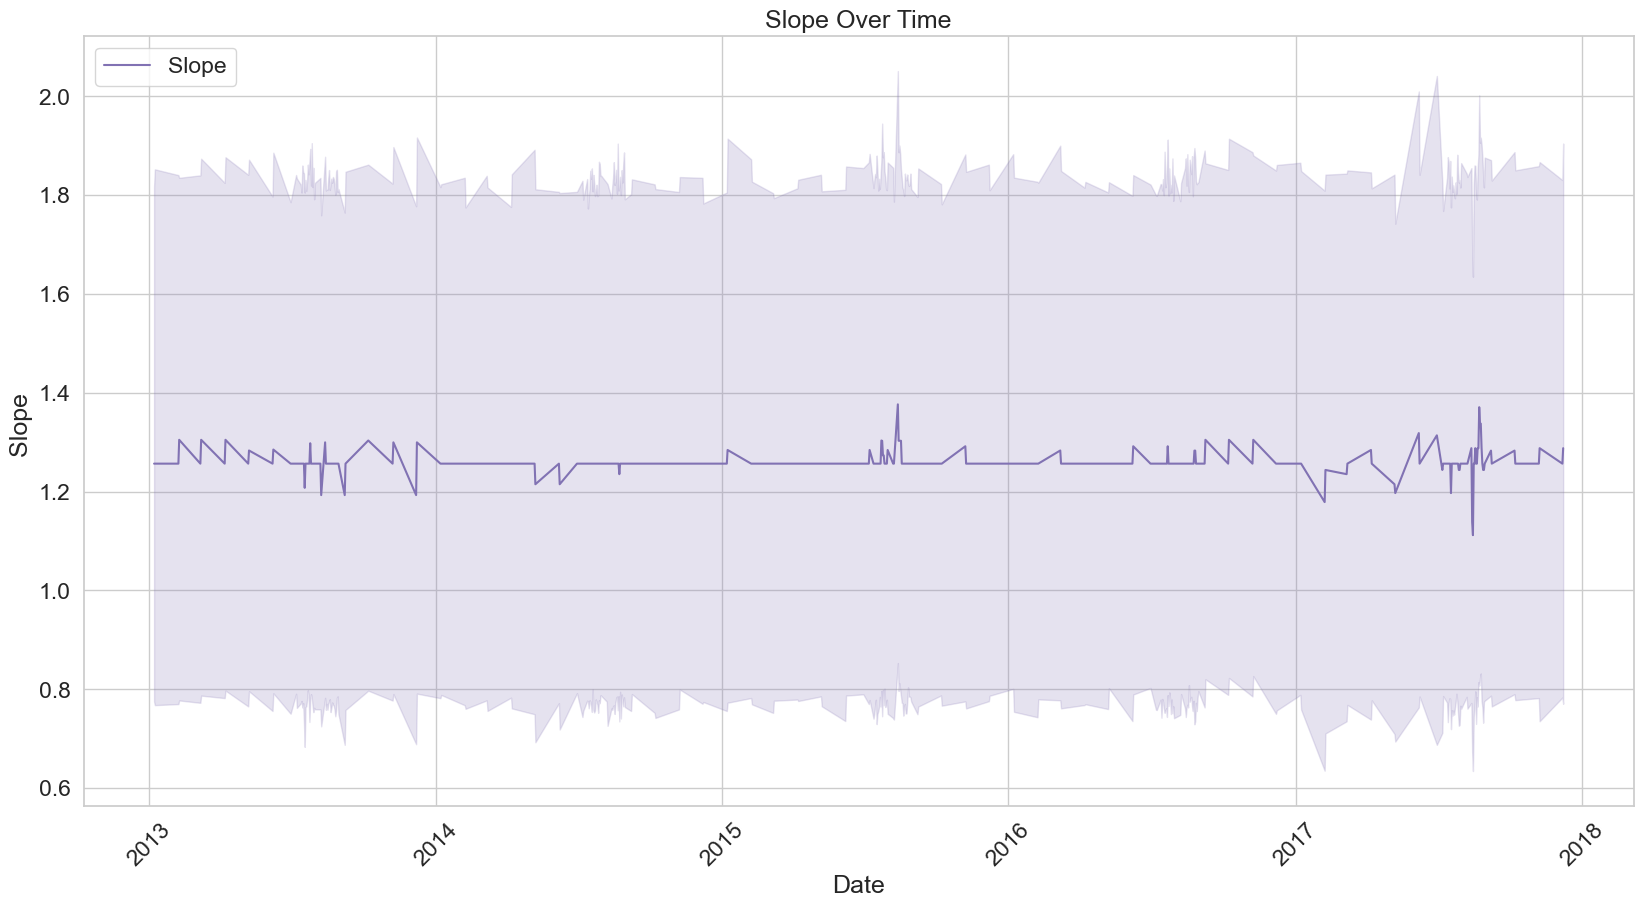

In [72]:
# Style settings
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))

sns.lineplot(x='Date', y='Slope', data=df, label='Slope', color='m')

# style the plot
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Slope Over Time')
plt.xlabel('Date')
plt.ylabel('Slope ')

plt.show()

Above plot shows how the Slope was registered over the time.

#### 1.4.2.11 Daily incoming Solar radiation over time

* Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9

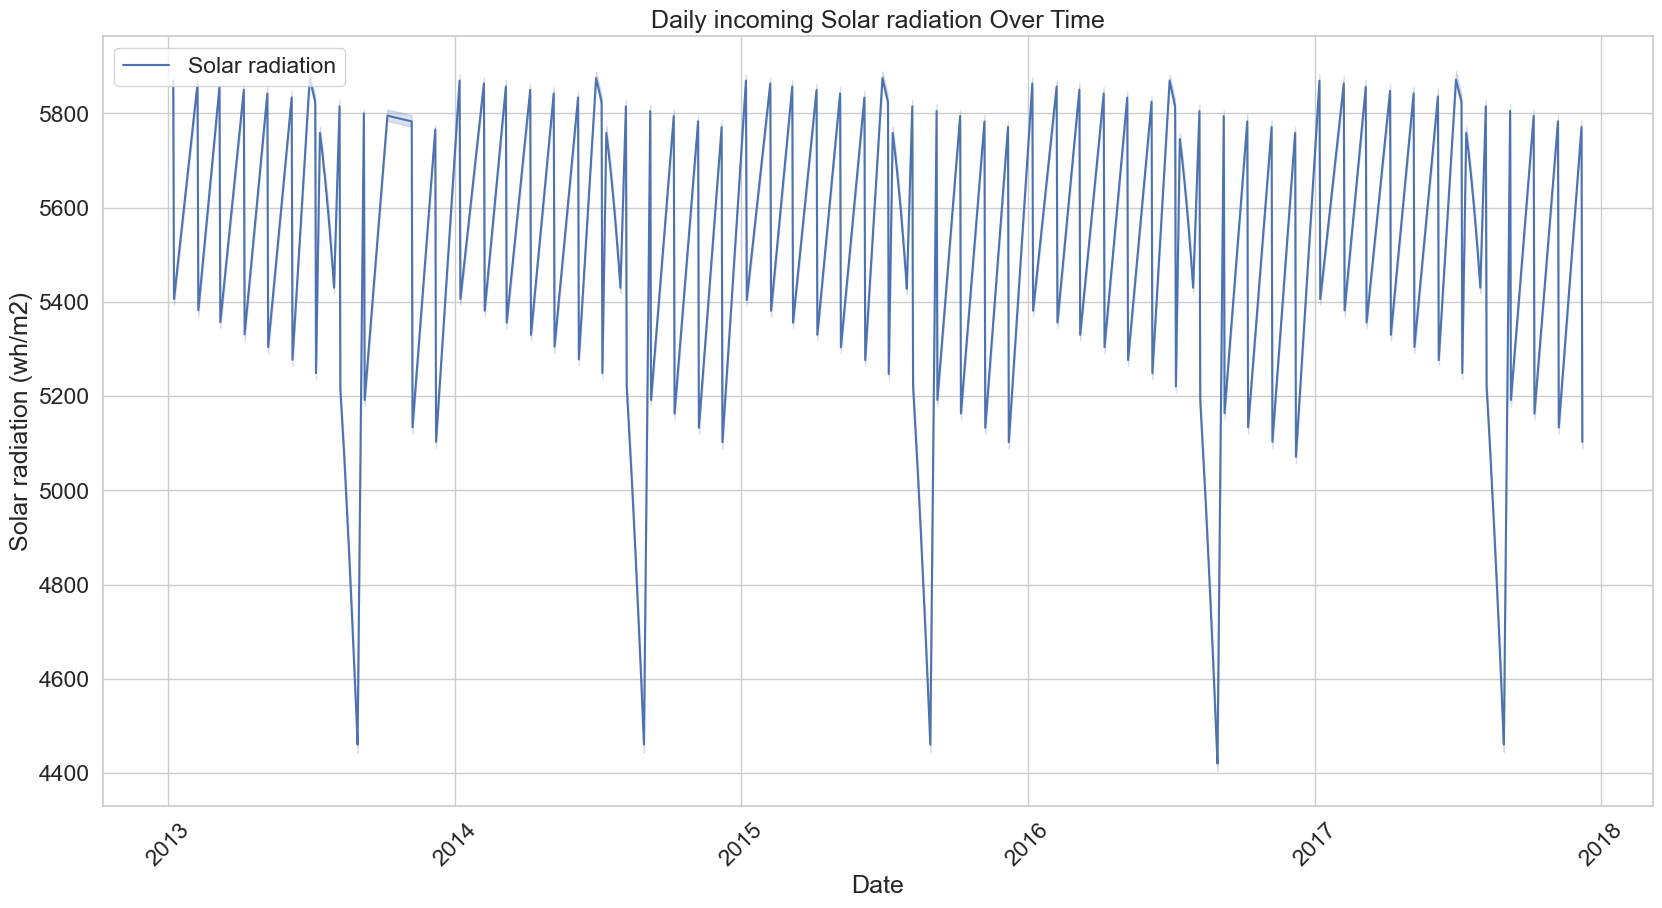

In [73]:
# Style settings
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))

sns.lineplot(x='Date', y='Solar radiation', data=df, label='Solar radiation', color='b')

# style the plot
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Daily incoming Solar radiation Over Time')
plt.xlabel('Date')
plt.ylabel('Solar radiation (wh/m2)')

plt.show()

Above plot shows how the Solar radiation was registered over the time. As we can see, there is a pattern each year.

#### 1.4.2.12  Plants location categorized by Primary Fuel

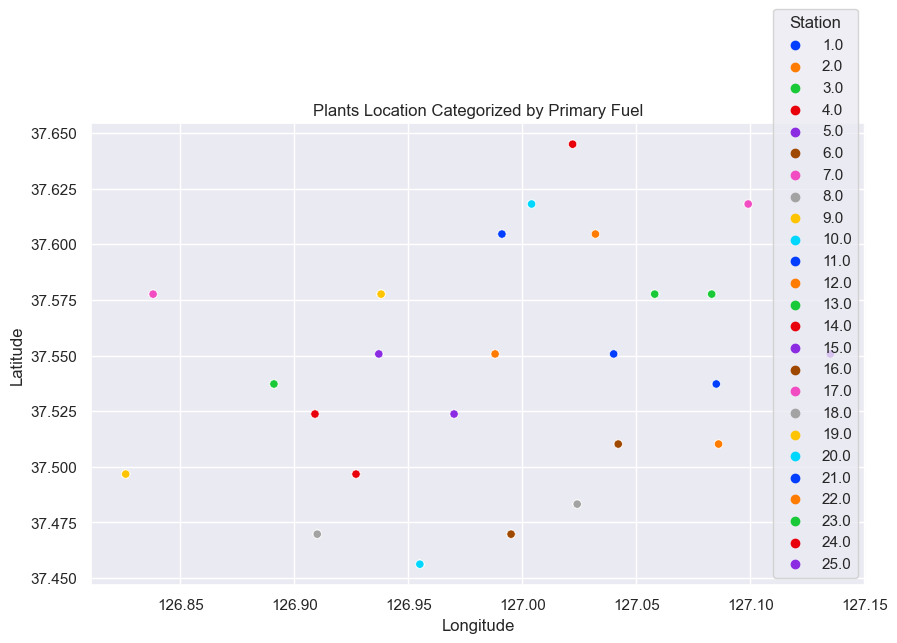

In [74]:
plt.figure(figsize=(10, 6))
sns.set(font_scale=1)  

# Map simulation with scatterplot
sns.scatterplot(x='lon', y='lat', hue='station', data=df, palette='bright')

# visual presentation
plt.legend(loc='lower right').set_title("Station")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Plants Location Categorized by Primary Fuel')
plt.show()


Above we simulate a map with the position of each position where the observation were taken by station.

### 1.4.3 Multivariate Analysis


#### 1.4.3.1 Replace the Date column with year, month and day

<!-- df_backup5 = df.copy() -->

In [75]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

# Remove Date column which was replace by year, month and day
df.drop(['Date'], axis=1, inplace=True)

df.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  ...  \
0         28.074101         23.006936  6.818887   69.451805   0.233947  ...   
1         29.850689         24.035009  5.691890   51.937448   0.225508  ...   
2         30.091292         24.565633  6.138224   20.573050   0.209344  ...   
3         29.704629         23.326177  5.650050   65.727144   0.216372  ...   
4         29.113934         23.486480  5.735004  107.965535   0.151407  ...   

       lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  \
0  126.991  212.3350  2.7850      5992.895996       29.1       21.2   
1  127.032   44.7624  0.5141      5869.312500       30.5       22.5   
2  127.058   33.3068  0.2661      5863.555664       31.1       23.9   
3  127.022   45.7160  2.5348      5856.964844       31.7       24.3   
4  127.135   35.0380  0.5055      5859.552246       31.2       22.5   

          position  year  month  day  
0  37.6046-126.991  2013      6   30  
1  37.6046-127.032  2013      6   30  
2  37.5776-127.058  2013      6   30  
3   37.645-127.022  2013      6   30  
4  37.5507-127.135  2013      6   30  

[5 rows x 28 columns]

#### 1.4.3.2  Encoding categorical columns
In order to make the multivariate Analysis we need to encode the categorical features, for this purpose, we will use OrdinalEncoder.

In [76]:
# Encoding categorical columns using OrdinalEncoder 
from sklearn.preprocessing import OrdinalEncoder
# Initialize the OrdinalEncoder
OE = OrdinalEncoder()

category_mappings = {}

col = 'position'
# Fit and transform the column
df[col] = OE.fit_transform(df[col].values.reshape(-1, 1))
# Store the category mappings 
category_mappings[col] = OE.categories_[0].tolist()

display(df.head())
display(df.tail())

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  ...  \
0         28.074101         23.006936  6.818887   69.451805   0.233947  ...   
1         29.850689         24.035009  5.691890   51.937448   0.225508  ...   
2         30.091292         24.565633  6.138224   20.573050   0.209344  ...   
3         29.704629         23.326177  5.650050   65.727144   0.216372  ...   
4         29.113934         23.486480  5.735004  107.965535   0.151407  ...   

       lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  position  \
0  126.991  212.3350  2.7850      5992.895996       29.1       21.2      20.0   
1  127.032   44.7624  0.5141      5869.312500       30.5       22.5      21.0   
2  127.058   33.3068  0.2661      5863.555664       31.1       23.9      18.0   
3  127.022   45.7160  2.5348      5856.964844       31.7       24.3      24.0   
4  127.135   35.0380  0.5055      5859.552246       31.2       22.5      15.0   

   year  month  day  
0  2013      6   30  
1  2013      6   30  
2  2013      6   30  
3  2013      6   30  
4  2013      6   30  

[5 rows x 28 columns]

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
7745     21.0          23.1          17.8    24.688997    78.261383   
7746     22.0          22.5          17.4    30.094858    83.690018   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS   LDAPS_LH  LDAPS_CC1  ...  \
7745         27.812697         18.303014  6.603253   9.614074   0.052902  ...   
7746         26.704905         17.814038  5.768083  82.146707   0.066461  ...   
7747         26.352081         18.775678  6.148918  72.058294   0.030034  ...   
7748         27.010193         18.733519  6.542819  47.241457   0.035874  ...   
7749         27.939516         18.522965  7.289264   9.090034   0.048954  ...   

          lon      DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  \
7745  127.040  26.2980  0.5721      4456.024414       27.6       17.7   
7746  127.086  21.9668  0.1332      4441.803711       28.0       17.1   
7747  126.891  15.5876  0.1554      4443.313965       28.3       18.1   
7748  126.909  17.2956  0.2223      4438.373535       28.6       18.8   
7749  126.970  19.5844  0.2713      4451.345215       27.8       17.4   

      position  year  month  day  
7745      14.0  2017      8   30  
7746       7.0  2017      8   30  
7747      10.0  2017      8   30  
7748       8.0  2017      8   30  
7749       9.0  2017      8   30  

[5 rows x 28 columns]

We have converted the categorical columns into numerical columns using Ordinal Encoder method. We save the categories for use later.

#### 1.4.3.3 Correlation between Next_Tmax and Next_Tmin with independent variables

In [77]:
# Calculate the correlation between features
cor = df.corr()
cor

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.113301      0.133282    -0.067846   
Present_Tmax      0.113301      1.000000      0.615208    -0.209059   
Present_Tmin      0.133282      0.615208      1.000000     0.122200   
LDAPS_RHmin      -0.067846     -0.209059      0.122200     1.000000   
LDAPS_RHmax      -0.169351     -0.306943     -0.018576     0.578358   
LDAPS_Tmax_lapse  0.069856      0.573777      0.467904    -0.569580   
LDAPS_Tmin_lapse  0.105277      0.628705      0.772061     0.085237   
LDAPS_WS          0.005822     -0.125952     -0.038779     0.289422   
LDAPS_LH         -0.132129      0.134246     -0.012817    -0.072195   
LDAPS_CC1         0.006539     -0.316333      0.084348     0.612831   
LDAPS_CC2         0.003526     -0.216976      0.090038     0.744774   
LDAPS_CC3        -0.000161     -0.146391     -0.004719     0.688069   
LDAPS_CC4         0.005005     -0.143069     -0.046694     0.513937   
LDAPS_PPT1       -0.001954     -0.114917      0.111577     0.259039   
LDAPS_PPT2       -0.007635     -0.104779      0.066207     0.389572   
LDAPS_PPT3       -0.013865     -0.127248     -0.052428     0.237512   
LDAPS_PPT4       -0.011085     -0.107295     -0.070391     0.167311   
lat              -0.239118     -0.054134     -0.081417     0.085027   
lon              -0.118845      0.007695     -0.045174    -0.077590   
DEM              -0.256706     -0.189439     -0.254084     0.100684   
Slope            -0.091721     -0.107079     -0.148423     0.122454   
Solar radiation  -0.021194     -0.022114      0.059765     0.242168   
Next_Tmax         0.107747      0.610357      0.463523    -0.446824   
Next_Tmin         0.128184      0.621048      0.796975     0.093249   
position         -0.241370     -0.057398     -0.090812     0.066594   
year              0.001474      0.056002      0.037457    -0.002147   
month             0.001211     -0.003266     -0.010210    -0.053499   
day              -0.000996     -0.154366     -0.115693    -0.063464   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.169351          0.069856          0.105277  0.005822   
Present_Tmax        -0.306943          0.573777          0.628705 -0.125952   
Present_Tmin        -0.018576          0.467904          0.772061 -0.038779   
LDAPS_RHmin          0.578358         -0.569580          0.085237  0.289422   
LDAPS_RHmax          1.000000         -0.377293         -0.118965  0.131269   
LDAPS_Tmax_lapse    -0.377293          1.000000          0.653425 -0.316011   
LDAPS_Tmin_lapse    -0.118965          0.653425          1.000000 -0.134652   
LDAPS_WS             0.131269         -0.316011         -0.134652  1.000000   
LDAPS_LH             0.238986          0.043663         -0.139675  0.004427   
LDAPS_CC1            0.435937         -0.440878          0.008714  0.285349   
LDAPS_CC2            0.390620         -0.525380          0.046537  0.257226   
LDAPS_CC3            0.224734         -0.542728         -0.044998  0.238155   
LDAPS_CC4            0.127242         -0.429739         -0.079536  0.218870   
LDAPS_PPT1           0.268019         -0.115659          0.034956  0.141503   
LDAPS_PPT2           0.227581         -0.248369         -0.002743  0.181634   
LDAPS_PPT3           0.132436         -0.193749         -0.093116  0.147199   
LDAPS_PPT4           0.118101         -0.170415         -0.103541  0.134428   
lat                  0.194820         -0.044052         -0.099452  0.033025   
lon                  0.025563          0.091568         -0.024703 -0.063009   
DEM                  0.176557         -0.181433         -0.198396  0.188540   
Slope                0.219436         -0.163891         -0.187864  0.169223   
Solar radiation      0.146622          0.047414          0.157763  0.120630   
Next_Tmax           -0.289788          0.835729          0.592119 -0.351107   
Next_Tmin           -0.076415          0.589963          0.8865

In [78]:
# Listing the correlation coeficients with the target variable (Regression model)
corr_df = cor.unstack().sort_values(ascending=False).reset_index()
corr_df.columns = ['Feature A', 'Feature B', 'Corr coef']
corr_df[(corr_df['Feature A']=='Next_Tmax') &  (corr_df['Feature B'] != 'Next_Tmax')]

Feature A         Feature B  Corr coef
32   Next_Tmax  LDAPS_Tmax_lapse   0.835729
57   Next_Tmax         Next_Tmin   0.616629
63   Next_Tmax      Present_Tmax   0.610357
65   Next_Tmax  LDAPS_Tmin_lapse   0.592119
83   Next_Tmax      Present_Tmin   0.463523
175  Next_Tmax          LDAPS_LH   0.156779
227  Next_Tmax           station   0.107747
264  Next_Tmax              year   0.061211
337  Next_Tmax   Solar radiation   0.016145
388  Next_Tmax               lon   0.003502
545  Next_Tmax             month  -0.033684
580  Next_Tmax               lat  -0.055367
588  Next_Tmax          position  -0.059619
647  Next_Tmax             Slope  -0.104279
668  Next_Tmax               day  -0.122303
673  Next_Tmax        LDAPS_PPT1  -0.125954
709  Next_Tmax               DEM  -0.174578
715  Next_Tmax        LDAPS_PPT2  -0.186722
720  Next_Tmax        LDAPS_PPT4  -0.190720
726  Next_Tmax        LDAPS_PPT3  -0.203554
749  Next_Tmax       LDAPS_RHmax  -0.289788
759  Next_Tmax          LDAPS_WS  -0.351107
768  Next_Tmax       LDAPS_RHmin  -0.446824
770  Next_Tmax         LDAPS_CC4  -0.454039
773  Next_Tmax         LDAPS_CC1  -0.459705
775  Next_Tmax         LDAPS_CC2  -0.498295
776  Next_Tmax         LDAPS_CC3  -0.523061

Here is the list of the correlation coefficients with the target variable Next_Tmax. 
There is a strong positive relation between the target variable Next_Tmax and the <LDAPS_Tmax_lapse, Next_Tmin, Present_Tmax, LDAPS_Tmin_lapse, and Present_Tmin> columns. Also, there is a medium negative relation with LDAPS_RHmin, LDAPS_CC4, LDAPS_CC1, LDAPS_CC2, and LDAPS_CC3.

In [79]:
# Listing the correlation coeficients with the target variable (Regression model2)
corr_df = cor.unstack().sort_values(ascending=False).reset_index()
corr_df.columns = ['Feature A', 'Feature B', 'Corr coef']
corr_df[(corr_df['Feature A'] == 'Next_Tmin') & (corr_df['Feature B'] != 'Next_Tmin')]

Feature A         Feature B  Corr coef
30   Next_Tmin  LDAPS_Tmin_lapse   0.886513
34   Next_Tmin      Present_Tmin   0.796975
55   Next_Tmin      Present_Tmax   0.621048
56   Next_Tmin         Next_Tmax   0.616629
66   Next_Tmin  LDAPS_Tmax_lapse   0.589963
196  Next_Tmin           station   0.128184
201  Next_Tmin   Solar radiation   0.125517
237  Next_Tmin       LDAPS_RHmin   0.093249
311  Next_Tmin         LDAPS_CC2   0.030358
322  Next_Tmin              year   0.021617
330  Next_Tmin        LDAPS_PPT1   0.018031
493  Next_Tmin        LDAPS_PPT2  -0.012462
496  Next_Tmin         LDAPS_CC1  -0.012877
540  Next_Tmin             month  -0.028344
564  Next_Tmin               lon  -0.045758
582  Next_Tmin         LDAPS_CC3  -0.056490
590  Next_Tmin          LDAPS_LH  -0.060392
600  Next_Tmin        LDAPS_PPT3  -0.068664
608  Next_Tmin       LDAPS_RHmax  -0.076415
622  Next_Tmin               lat  -0.085136
625  Next_Tmin         LDAPS_CC4  -0.086197
637  Next_Tmin          position  -0.094318
642  Next_Tmin          LDAPS_WS  -0.102021
657  Next_Tmin        LDAPS_PPT4  -0.114900
681  Next_Tmin               day  -0.135865
692  Next_Tmin             Slope  -0.148379
741  Next_Tmin               DEM  -0.249303

Here is the list of the correlation coefficients with the target variable Next_Tmin. 
There is a strong positive relation between the target variable Next_Tmin and the <LDAPS_Tmin_lapse, Present_Tmin, Present_Tmax, Next_Tmax, and LDAPS_Tmax_lapse> columns.

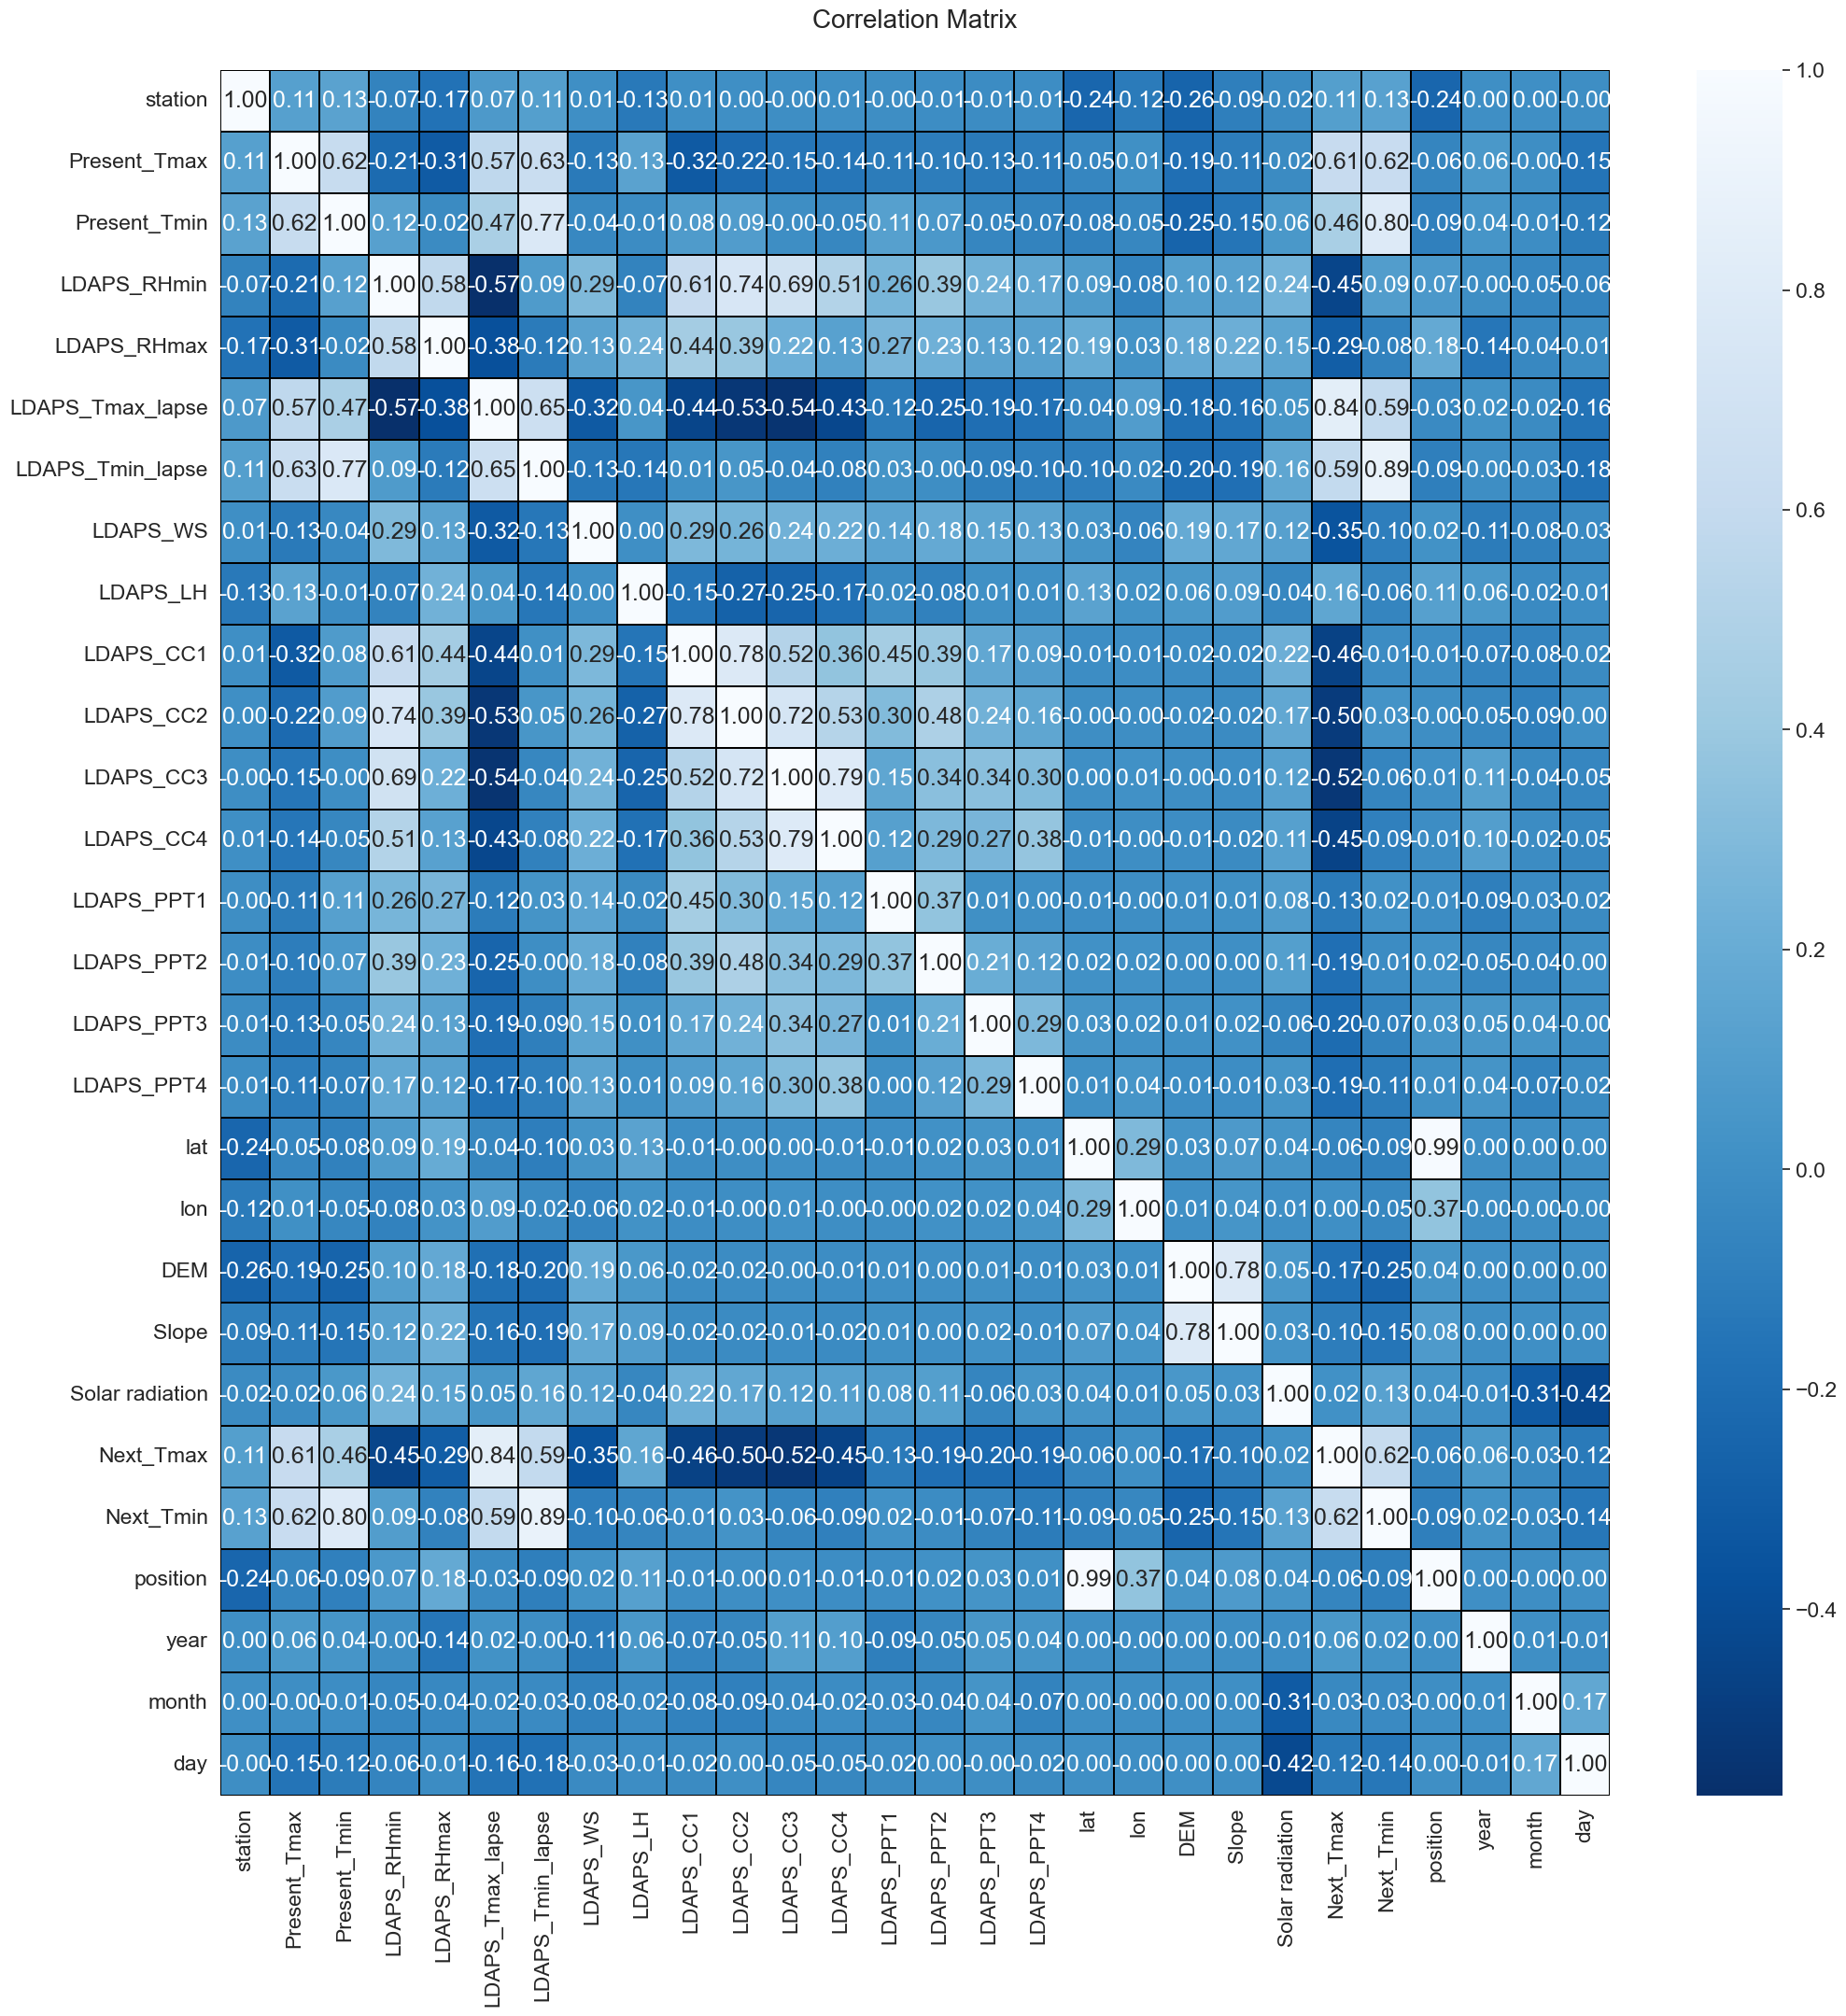

In [80]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(24, 24))
sns.set(font_scale=1.5)

sns.heatmap(cor, linewidths = 0.1, fmt = ".2f", linecolor = 'black', cmap='Blues_r', annot=True)
plt.yticks(rotation = 0)
plt.title('Correlation Matrix', size=20, y=1.02)
plt.show()

This heatmap shows the correlation matrix. We can observe the relationship between feature-to-feature and feature-to-label.

- This heatmap contains both positive and negative correlations.
- The Next_Tmax feature has a positive correlation with the LDAPS_Tmax_laspse(+0.84), Next_Tmin(+0.62), Present_Tmax(+0.61),  Present_Tmin(+0.46), LDAPS_Tmin_lapse(+0.59). Also, has a negative correlation with LDAPS_CC columns(-0.52), LDAPS_RHmin(-0.45) and LDAPS_RHmax(-0.29)

- The Next_Tmin feature has a positive correlation with the LDAPS_Tmin_laspse(+0.84), Present_Tmin(+0.80), Present_Tmax(+0.61), LDAPS_Tmin_lapse(+0.59), then LDAPS_CC columns(+0.52) and is negatively correlated with primary_fuel column(-0.38)

- The Next_Tmax and Next__Tmin are positive correlated (+0.62)

- The lat and lon column is correlated with position, which make sense.

- DEM is highly correlated with Slope (+0.78)
- LDAPS columns are correlated with each other.
- LDAPS_Tmas_lapse and LDAPS_Tmas_lapse are correlated with Present_Tmax and Present_Tmin.

# 2. Preprocessing Data
## 2.1 Missing values
In Sections 1.2 and 1.3.2 we manage the missing values in the the dataset.

In [81]:
df.isnull().sum().sum()

0

No missing values to remove.

## 2.2  Removing outliers

<!-- df_backup6 = df.copy() -->

In [82]:
features_with_outliers = ['LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4']
features_with_outliers

['LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4']

We selected the features with outliers from the Univariate Analysis, and considered only the continuous ones.

In [83]:
# Detect outliers with zscore method
from scipy.stats import zscore

z = np.abs(zscore(df[features_with_outliers]))
z

LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  \
0        0.382768          0.525269          0.215525  0.126423  0.206603   
1        0.311697          0.078334          0.223368  0.644133  0.313359   
2        0.609425          0.160080          0.449896  0.439100  1.244497   
3        1.128335          0.028710          0.079238  0.663353  0.096026   
4        0.249244          0.171981          0.010803  0.624327  1.349989   
...           ...               ...               ...       ...       ...   
7745     1.402898          0.614083          2.223667  0.225479  1.569844   
7746     0.648815          0.990460          2.432415  0.609132  0.583486   
7747     1.318376          1.110333          2.021883  0.434188  0.283984   
7748     1.537141          0.886737          2.039881  0.253241  0.452772   
7749     1.544257          0.570995          2.129768  0.089654  1.585402   

      LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4  
0       0.305589    0.275777    0.239969    0.224971  
1       0.305589    0.275777    0.239969    0.224971  
2       0.305589    0.275777    0.239969    0.224971  
3       0.305589    0.275777    0.239969    0.224971  
4       0.305589    0.275777    0.239969    0.224971  
...          ...         ...         ...         ...  
7745    0.305589    0.275777    0.239969    0.224971  
7746    0.305589    0.275777    0.239969    0.224971  
7747    0.305589    0.275777    0.239969    0.224971  
7748    0.305589    0.275777    0.239969    0.224971  
7749    0.305589    0.275777    0.239969    0.224971  

[7588 rows x 9 columns]

In [84]:
# threshold = 3.1
df_new = df[(z<3.1).all(axis=1)]

print(f"{df.shape[0] - df_new.shape[0]} rows with outliers were deleted.")
print(f"This represent {round((df.shape[0] - df_new.shape[0]) / df.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {df.shape[1]} columns.")
df = df_new.copy()
df


750 rows with outliers were deleted.
This represent 9.88% of the data.
In the new dataset there are 6838 rows and 28 columns.


station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0          28.7          21.4    58.255688    91.116364   
1         2.0          31.9          21.6    52.263397    90.604721   
2         3.0          31.6          23.3    48.690479    83.973587   
3         4.0          32.0          23.4    58.239788    96.483688   
4         5.0          31.4          21.9    56.174095    90.155128   
...       ...           ...           ...          ...          ...   
7745     21.0          23.1          17.8    24.688997    78.261383   
7746     22.0          22.5          17.4    30.094858    83.690018   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0            28.074101         23.006936  6.818887   69.451805   0.233947   
1            29.850689         24.035009  5.691890   51.937448   0.225508   
2            30.091292         24.565633  6.138224   20.573050   0.209344   
3            29.704629         23.326177  5.650050   65.727144   0.216372   
4            29.113934         23.486480  5.735004  107.965535   0.151407   
...                ...               ...       ...         ...        ...   
7745         27.812697         18.303014  6.603253    9.614074   0.052902   
7746         26.704905         17.814038  5.768083   82.146707   0.066461   
7747         26.352081         18.775678  6.148918   72.058294   0.030034   
7748         27.010193         18.733519  6.542819   47.241457   0.035874   
7749         27.939516         18.522965  7.289264    9.090034   0.048954   

      ...      lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  \
0     ...  126.991  212.3350  2.7850      5992.895996       29.1       21.2   
1     ...  127.032   44.7624  0.5141      5869.312500       30.5       22.5   
2     ...  127.058   33.3068  0.2661      5863.555664       31.1       23.9   
3     ...  127.022   45.7160  2.5348      5856.964844       31.7       24.3   
4     ...  127.135   35.0380  0.5055      5859.552246       31.2       22.5   
...   ...      ...       ...     ...              ...        ...        ...   
7745  ...  127.040   26.2980  0.5721      4456.024414       27.6       17.7   
7746  ...  127.086   21.9668  0.1332      4441.803711       28.0       17.1   
7747  ...  126.891   15.5876  0.1554      4443.313965       28.3       18.1   
7748  ...  126.909   17.2956  0.2223      4438.373535       28.6       18.8   
7749  ...  126.970   19.5844  0.2713      4451.345215       27.8       17.4   

      position  year  month  day  
0         20.0  2013      6   30  
1         21.0  2013      6   30  
2         18.0  2013      6   30  
3         24.0  2013      6   30  
4         15.0  2013      6   30  
...        ...   ...    ...  ...  
7745      14.0  2017      8   30  
7746       7.0  2017      8   30  
7747      10.0  2017      8   30  
7748       8.0  2017      8   30  
7749       9.0  2017      8   30  

[6838 rows x 28 columns]

Since we can not afford lossing more than 10% of the data we select only the columns continuous with outliers from thel Univariate Analysis. 

Also threshold was defined as 3.1 instead of 3. Therefore only 9.88% of the data was lost.

Now, our datset has 6838 rows and 28 columns.

## 2.4 Skewness Correction

We will modify the columns' names for a better approach.

In [85]:
# Checking the skewness in the data
df_skew = df.skew().sort_values(ascending=False).to_frame("Skew")
df_skew

Skew
LDAPS_PPT4        5.936245
LDAPS_PPT3        5.513040
LDAPS_PPT2        4.832021
LDAPS_PPT1        3.730281
DEM               1.749481
Slope             1.584216
LDAPS_WS          1.099534
LDAPS_CC4         0.707785
LDAPS_CC3         0.696620
LDAPS_CC1         0.587032
LDAPS_LH          0.571404
LDAPS_CC2         0.504339
LDAPS_RHmin       0.309590
day               0.248362
lat               0.098523
year              0.015131
position          0.013850
station          -0.003136
LDAPS_Tmax_lapse -0.121441
Next_Tmax        -0.275309
lon              -0.279571
Present_Tmax     -0.287600
Next_Tmin        -0.335940
Present_Tmin     -0.339229
LDAPS_Tmin_lapse -0.428164
Solar radiation  -0.519327
month            -0.688439
LDAPS_RHmax      -0.707277

We are going to select which features have a skew greater than 0.5 and apply transform methods to those features in order to eliminate the skewness.

In [86]:
# Subsetting the features with a skew > 0.5
skew_columns = df_skew[df_skew['Skew'] > 0.5].index.to_list()
skew_columns = sorted(skew_columns)
skew_columns

['DEM',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_LH',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'LDAPS_WS',
 'Slope']

In [87]:
# The categorical variables will not be taken into account
skew_columns.remove('DEM')
skew_columns.remove('Slope')

We are going to use the cube-root method, square-root method, and log method to transform the columns with a skewness of more than 0.5. Later, we will compare the resulting skewness in order to select the best transform method.

In [88]:
# Checking skewness using cuberoot method and log method
df_transformed = pd.DataFrame()

for col in skew_columns:
    df_transformed[f"{col}_cbrt"] = np.cbrt(df[col])
    df_transformed[f"{col}_sqrt"] = np.sqrt(df[col])
    df_transformed[f"{col}_log"] = np.log(df[col])
    
# Adding the other columns
df_transformed = pd.concat([df_transformed, df[skew_columns]], axis=1)

We will select the best transformation method looking for the minimum absolute value of skewness.

In [89]:
# Comparing which transform method give better results
df_comp = df_transformed.skew().sort_index(ascending=False).to_frame("Skewness")

# Reset the index and identify the feature
df_comp.reset_index(inplace=True)
df_comp['feature'] = df_comp['index'].str.extract(r'^(.*)_.*')
df_comp['Skewness_abs'] = abs(df_comp['Skewness'])

# Drop the records with no valid skewness
df_comp = df_comp[~df_comp.Skewness.isnull()]

# Find the indexes of the rows with the minimum 'Skewness_abs' values
min_indices = df_comp.groupby('feature')['Skewness_abs'].idxmin()

# Select the rows corresponding to the minimum values in Skewness_abs,
low_skewness = df_comp.loc[min_indices]
low_skewness

index  Skewness     feature  Skewness_abs
35        LDAPS_CC2  0.504339       LDAPS      0.504339
36   LDAPS_CC1_sqrt -0.170251   LDAPS_CC1      0.170251
32   LDAPS_CC2_sqrt -0.285448   LDAPS_CC2      0.285448
28   LDAPS_CC3_sqrt -0.094729   LDAPS_CC3      0.094729
24   LDAPS_CC4_sqrt  0.008746   LDAPS_CC4      0.008746
20    LDAPS_LH_sqrt  0.000355    LDAPS_LH      0.000355
18  LDAPS_PPT1_cbrt  1.912283  LDAPS_PPT1      1.912283
14  LDAPS_PPT2_cbrt  2.344740  LDAPS_PPT2      2.344740
10  LDAPS_PPT3_cbrt  2.488518  LDAPS_PPT3      2.488518
6   LDAPS_PPT4_cbrt  2.821910  LDAPS_PPT4      2.821910
1      LDAPS_WS_log  0.392272    LDAPS_WS      0.392272

For each skewness column, we obtain the better transform method. We can observe as follows:
* cube-root transform method is better for columns LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, and LDAPS_PPT4
* square-root transform method is better for columns LDAPS_CC3 and LDAPS_CC4
* logarithmic transform method is better for column LDAPS_WS.

<!-- df_backup7 = df.copy() -->

We will transform only the columns with a skewness > 0.6 since the transformation is affecting the VIF analysis to manage multicollinearity. The columns LDAPS_CC1, LDAPS_CC2, and LDAPS_LH remain the same.

In [90]:
# Selecting columns to apply cube-root transform method
cbrt_columns = ['LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4']
sqrt_columns = ['LDAPS_CC3', 'LDAPS_CC4']


print(f"Cube-root: {cbrt_columns}")
print(f"Square-root: {sqrt_columns}")

# Update the df dataset with the transfor data with cube-root method.
for col in cbrt_columns:
    df[col] = np.cbrt(df[col])
    
# Update the df dataset with the transfor data with square-root method.
for col in sqrt_columns:
    df[col] = np.sqrt(df[col])    
    

Cube-root: ['LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4']
Square-root: ['LDAPS_CC3', 'LDAPS_CC4']


In [91]:
# log Transform the LDAPS_WS column
df['LDAPS_WS'] = np.log(df['LDAPS_WS'])

In [92]:
# This is the new skewness for the transformed columns
df[skew_columns].skew()

LDAPS_CC1     0.587032
LDAPS_CC2     0.504339
LDAPS_CC3    -0.094729
LDAPS_CC4     0.008746
LDAPS_LH      0.571404
LDAPS_PPT1    1.912283
LDAPS_PPT2    2.344740
LDAPS_PPT3    2.488518
LDAPS_PPT4    2.821910
LDAPS_WS      0.392272
dtype: float64

After updating the df dataset with the corresponding transform method, we can continue with the analysis.

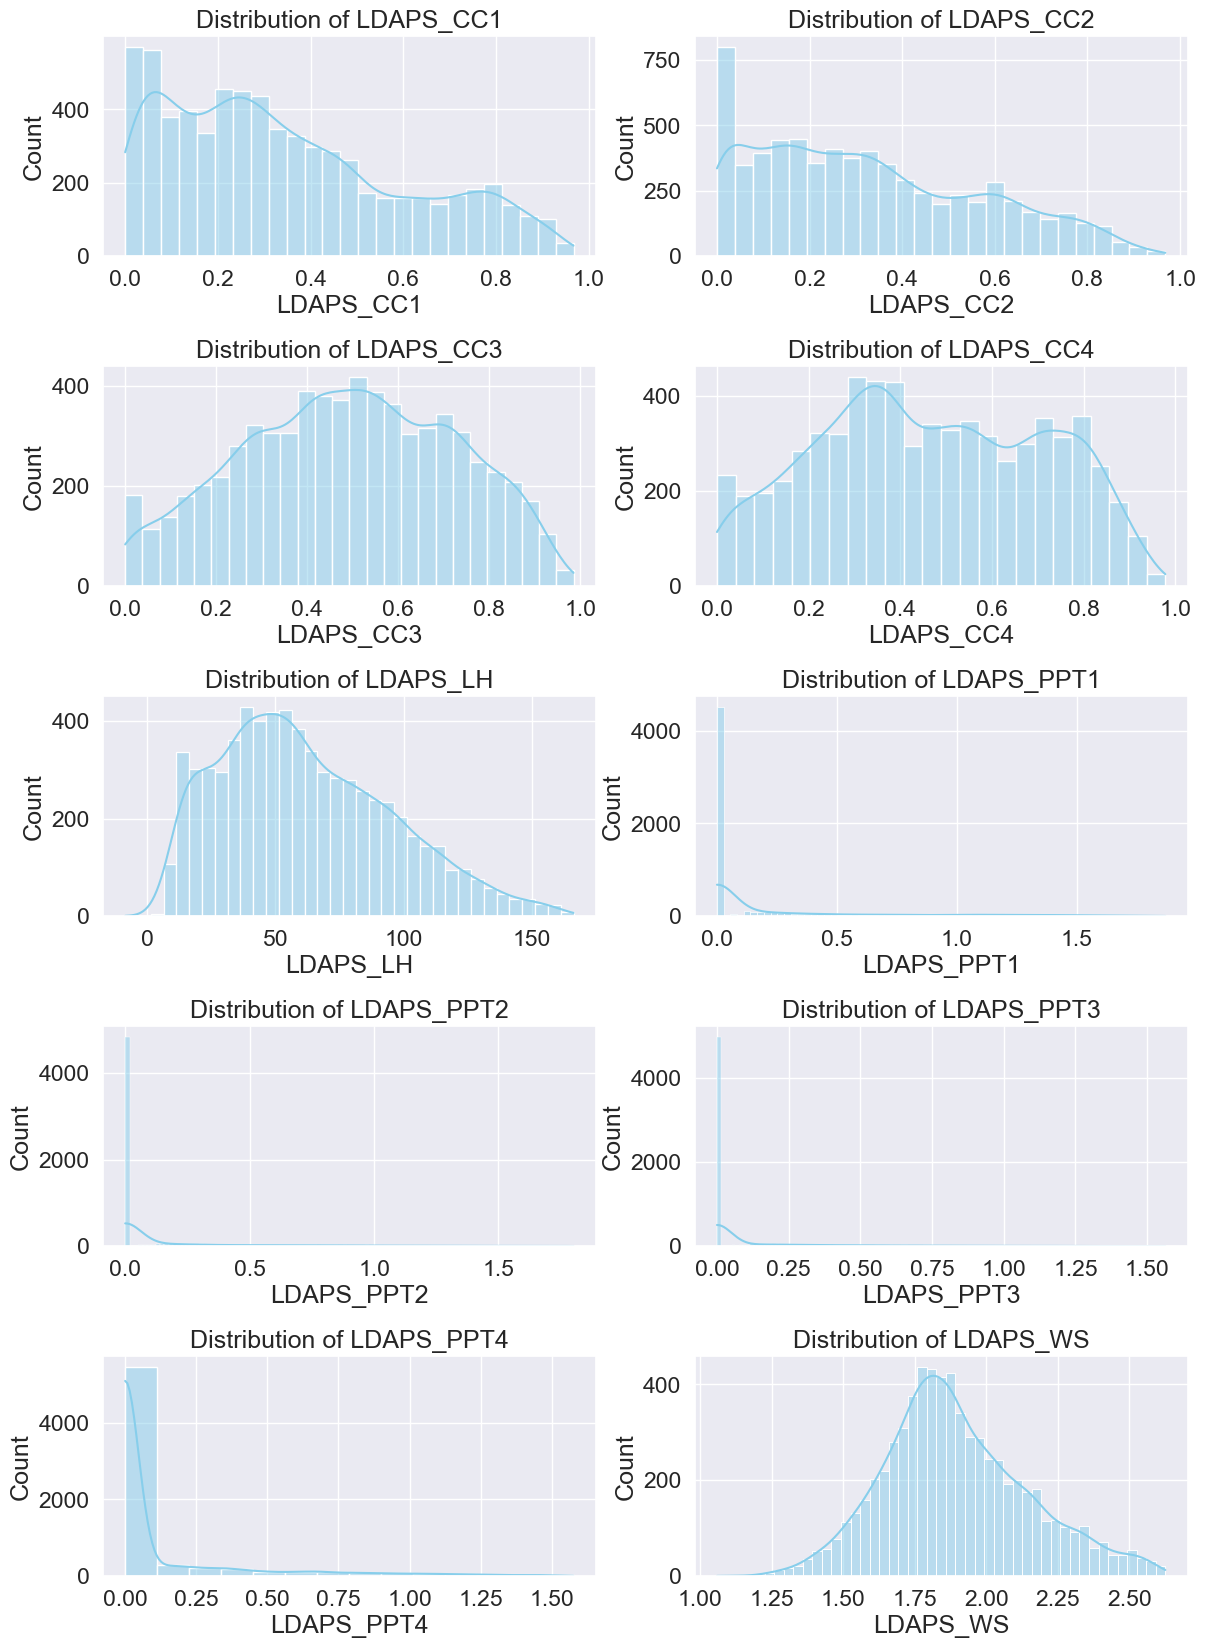

In [93]:
# Visualizing the distribution of the columns after removing skewness
fig, axs = plt.subplots(5, 2, figsize=(14, 20))
for ax, column in zip(axs.flat, skew_columns):
    sns.histplot(data=df, x=column, ax=ax, kde=True, color='skyblue')
    ax.set_title(f"Distribution of {column}")

plt.subplots_adjust(hspace=0.5)
plt.show()

## 2.5 Feature Scaling using Standard Scalarization

### 2.5.1 Separating features and label
#### 2.5.1.1 Separating features for regression model to predict Next_Tmax

In [94]:
# Separating the independent and target variables into x and y 
x = df.drop('Next_Tmax', axis=1)
y = df['Next_Tmax']

print(f"Feature Dimension = {x.shape}")
print(f"Label Dimension = {y.shape}")
display(x.head())
display(y.head())

Feature Dimension = (6838, 27)
Label Dimension = (6838,)


station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  ...  \
0         28.074101         23.006936  1.919696   69.451805   0.233947  ...   
1         29.850689         24.035009  1.739042   51.937448   0.225508  ...   
2         30.091292         24.565633  1.814535   20.573050   0.209344  ...   
3         29.704629         23.326177  1.731664   65.727144   0.216372  ...   
4         29.113934         23.486480  1.746589  107.965535   0.151407  ...   

       lat      lon       DEM   Slope  Solar radiation  Next_Tmin  position  \
0  37.6046  126.991  212.3350  2.7850      5992.895996       21.2      20.0   
1  37.6046  127.032   44.7624  0.5141      5869.312500       22.5      21.0   
2  37.5776  127.058   33.3068  0.2661      5863.555664       23.9      18.0   
3  37.6450  127.022   45.7160  2.5348      5856.964844       24.3      24.0   
4  37.5507  127.135   35.0380  0.5055      5859.552246       22.5      15.0   

   year  month  day  
0  2013      6   30  
1  2013      6   30  
2  2013      6   30  
3  2013      6   30  
4  2013      6   30  

[5 rows x 27 columns]

0    29.1
1    30.5
2    31.1
3    31.7
4    31.2
Name: Next_Tmax, dtype: float64

#### 2.5.1.2 Separating features for regression model 2 to predict Next_Tmin

In [95]:
# Separating the independent and target variables into x and y 
x2 = df.drop('Next_Tmin', axis=1)
y2 = df['Next_Tmin']

print(f"Feature Dimension = {x2.shape}")
print(f"Label Dimension = {y2.shape}")
display(x2.head())
display(y2.unique())

Feature Dimension = (6838, 27)
Label Dimension = (6838,)


station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  ...  \
0         28.074101         23.006936  1.919696   69.451805   0.233947  ...   
1         29.850689         24.035009  1.739042   51.937448   0.225508  ...   
2         30.091292         24.565633  1.814535   20.573050   0.209344  ...   
3         29.704629         23.326177  1.731664   65.727144   0.216372  ...   
4         29.113934         23.486480  1.746589  107.965535   0.151407  ...   

       lat      lon       DEM   Slope  Solar radiation  Next_Tmax  position  \
0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1      20.0   
1  37.6046  127.032   44.7624  0.5141      5869.312500       30.5      21.0   
2  37.5776  127.058   33.3068  0.2661      5863.555664       31.1      18.0   
3  37.6450  127.022   45.7160  2.5348      5856.964844       31.7      24.0   
4  37.5507  127.135   35.0380  0.5055      5859.552246       31.2      15.0   

   year  month  day  
0  2013      6   30  
1  2013      6   30  
2  2013      6   30  
3  2013      6   30  
4  2013      6   30  

[5 rows x 27 columns]

array([21.2, 22.5, 23.9, 24.3, 24. , 23.4, 22.9, 21.6, 21. , 24.5, 22.2,
       22.8, 20.9, 21.1, 23. , 23.7, 23.2, 24.2, 21.3, 20.7, 20.8, 22.1,
       17.8, 19.8, 20.1, 20.3, 19.4, 19.1, 18.9, 20. , 19.7, 20.5, 19.5,
       20.6, 23.1, 23.3, 22.7, 22.6, 22.4, 22. , 23.5, 23.8, 21.7, 22.3,
       21.9, 21.4, 21.5, 19.3, 20.4, 21.8, 24.1, 23.6, 24.4, 24.8, 25.1,
       24.6, 24.7, 25. , 24.9, 25.3, 26. , 26.1, 25.5, 25.8, 25.4, 25.6,
       25.7, 25.2, 25.9, 26.3, 26.2, 26.4, 26.5, 26.9, 26.8, 26.6, 27. ,
       27.1, 26.7, 27.5, 27.2, 27.4, 27.7, 28.3, 27.6, 28. , 27.3, 19.9,
       20.2, 19.6, 19.2, 18.6, 18.7, 18.5, 18.2, 18.4, 18.8, 17.9, 17.5,
       16.5, 18. , 19. , 16.7, 18.3, 28.4, 28.1, 29.1, 28.5, 28.8, 29.8,
       29.5, 28.6, 17.1, 18.1, 16.8, 17.6, 17.4, 15.8, 16.9, 17.7, 17.2,
       15.5, 16.6, 16.4, 14.7, 15.9, 16. , 17.3, 15.4, 15.3, 13.8, 17. ,
       15.6, 15.1, 27.9, 28.7, 27.8, 28.2, 13.3, 15. , 14.1, 13.4, 15.7,
       16.2, 29. , 14.3, 16.3, 12.9])

### 2.5.2 Scaling Data
### 2.5.2.1 Scaling the data for regression model to predict Next_Tmax

In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling data 
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

print(f"\n\n{'*'*30} x features for regression model 1 to predict Next_Tmax {'*'*30}")
display(x.head())



****************************** x features for regression model 1 to predict Next_Tmax ******************************


station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0 -1.671252     -0.410874     -0.774141     0.194948     0.438330   
1 -1.532438      0.694339     -0.689730    -0.234782     0.365776   
2 -1.393623      0.590725      0.027763    -0.491010    -0.574567   
3 -1.254809      0.728877      0.069968     0.193808     1.199456   
4 -1.115995      0.521650     -0.563113     0.045669     0.302020   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0         -0.642661         -0.266525  0.098833  0.222206  -0.441999  ...   
1         -0.002980          0.185911 -0.609357 -0.300345  -0.475423  ...   
2          0.083652          0.419429 -0.313413 -1.236119  -0.539444  ...   
3         -0.055570         -0.126033 -0.638279  0.111078  -0.511608  ...   
4         -0.268257         -0.055487 -0.579775  1.371285  -0.768906  ...   

        lat       lon       DEM     Slope  Solar radiation  Next_Tmin  \
0  1.205756 -0.000840  2.802134  1.133418         1.537545  -0.748609   
1  1.205756  0.515839 -0.309579 -0.538873         1.246130  -0.212114   
2  0.667544  0.843489 -0.522302 -0.721500         1.232556   0.365650   
3  2.011082  0.389819 -0.291871  0.949170         1.217014   0.530726   
4  0.131325  1.813837 -0.490155 -0.545206         1.223115  -0.212114   

   position      year     month       day  
0  1.123753 -1.429175 -0.478129  1.665244  
1  1.262753 -1.429175 -0.478129  1.665244  
2  0.845752 -1.429175 -0.478129  1.665244  
3  1.679755 -1.429175 -0.478129  1.665244  
4  0.428751 -1.429175 -0.478129  1.665244  

[5 rows x 27 columns]

### 2.5.2.2 Scaling the data for classification ??? model to predict Next_Tmin

In [97]:
scaler2 = StandardScaler()

# Scaling data 
x2 = pd.DataFrame(scaler2.fit_transform(x2), columns = x2.columns)

print(f"\n\n{'*'*30} x2 features for regression model 2 to predict Next_Tmin {'*'*30}")
display(x2.head())



****************************** x2 features for regression model 2 to predict Next_Tmin ******************************


station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0 -1.671252     -0.410874     -0.774141     0.194948     0.438330   
1 -1.532438      0.694339     -0.689730    -0.234782     0.365776   
2 -1.393623      0.590725      0.027763    -0.491010    -0.574567   
3 -1.254809      0.728877      0.069968     0.193808     1.199456   
4 -1.115995      0.521650     -0.563113     0.045669     0.302020   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0         -0.642661         -0.266525  0.098833  0.222206  -0.441999  ...   
1         -0.002980          0.185911 -0.609357 -0.300345  -0.475423  ...   
2          0.083652          0.419429 -0.313413 -1.236119  -0.539444  ...   
3         -0.055570         -0.126033 -0.638279  0.111078  -0.511608  ...   
4         -0.268257         -0.055487 -0.579775  1.371285  -0.768906  ...   

        lat       lon       DEM     Slope  Solar radiation  Next_Tmax  \
0  1.205756 -0.000840  2.802134  1.133418         1.537545  -0.471260   
1  1.205756  0.515839 -0.309579 -0.538873         1.246130   0.002902   
2  0.667544  0.843489 -0.522302 -0.721500         1.232556   0.206115   
3  2.011082  0.389819 -0.291871  0.949170         1.217014   0.409327   
4  0.131325  1.813837 -0.490155 -0.545206         1.223115   0.239984   

   position      year     month       day  
0  1.123753 -1.429175 -0.478129  1.665244  
1  1.262753 -1.429175 -0.478129  1.665244  
2  0.845752 -1.429175 -0.478129  1.665244  
3  1.679755 -1.429175 -0.478129  1.665244  
4  0.428751 -1.429175 -0.478129  1.665244  

[5 rows x 27 columns]

## 2.6 Muticollinearity Analysis and Feature Selection


### 2.6.1 Checking Variance Inflation Factor (VIF)

#### 2.6.1.1 Checking VIF for regression model 1 to predict Next_Tmax

In [98]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

Features  VIF values
23          position   85.308458
17               lat   81.416048
6   LDAPS_Tmin_lapse    9.602020
5   LDAPS_Tmax_lapse    7.069248
3        LDAPS_RHmin    6.262708
22         Next_Tmin    6.076196
10         LDAPS_CC2    5.502647
9          LDAPS_CC1    4.911715
11         LDAPS_CC3    4.416321
2       Present_Tmin    3.471991
19               DEM    3.374970
20             Slope    3.120278
1       Present_Tmax    2.839632
12         LDAPS_CC4    2.804156
13        LDAPS_PPT1    2.679436
4        LDAPS_RHmax    2.353030
14        LDAPS_PPT2    2.239323
18               lon    1.749653
16        LDAPS_PPT4    1.663931
15        LDAPS_PPT3    1.620893
8           LDAPS_LH    1.550806
21   Solar radiation    1.532469
26               day    1.290010
7           LDAPS_WS    1.255433
0            station    1.234158
25             month    1.137501
24              year    1.126255

By checking VIF values we can find the features causing multicollinearity problem. Here we can find the features:  
- position
- lat

have VIF value greater than 10 which means they have high correlation with each other. 

We will drop one of the column first, if the same issue exist then we will try to remove the column having high VIF.


In [99]:
# Reviewing the correlation between label and the features with multicollinearity
corr_df[(corr_df['Feature A'] == 'Next_Tmax') & (corr_df['Feature B'].isin(['position', 'lat'])) ]

Feature A Feature B  Corr coef
580  Next_Tmax       lat  -0.055367
588  Next_Tmax  position  -0.059619

<!-- # Saving a backup of x
x_backup = x.copy() -->

In [100]:
# Dropping the columns with multicollinearity
x = x.drop(['lat'], axis=1) 

We drop the column 'lat' to solve the multicollinearity problem since is less correlated with the target than position.

In [101]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

Features  VIF values
6   LDAPS_Tmin_lapse    9.284300
5   LDAPS_Tmax_lapse    7.066311
3        LDAPS_RHmin    6.196492
21         Next_Tmin    5.931216
10         LDAPS_CC2    5.496468
9          LDAPS_CC1    4.911710
11         LDAPS_CC3    4.414841
2       Present_Tmin    3.463617
18               DEM    3.363095
19             Slope    3.064961
1       Present_Tmax    2.831784
12         LDAPS_CC4    2.803447
13        LDAPS_PPT1    2.676220
4        LDAPS_RHmax    2.349368
14        LDAPS_PPT2    2.239304
16        LDAPS_PPT4    1.663430
15        LDAPS_PPT3    1.620670
8           LDAPS_LH    1.537596
20   Solar radiation    1.532283
22          position    1.290602
25               day    1.289991
7           LDAPS_WS    1.255433
17               lon    1.236481
0            station    1.234132
24             month    1.137449
23              year    1.126172

Dropping the lat column solved the multicollinearity issue. We can now move ahead with model building. 

#### 2.6.1.1 Checking VIF for regression model 2 to predict Next_Tmin

In [102]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x2.columns
vif['VIF values'] = [variance_inflation_factor(x2.values, i) for i in range(len(x2.columns))]

vif.sort_values(by='VIF values', ascending=False)

Features  VIF values
23          position   84.239721
17               lat   80.472257
5   LDAPS_Tmax_lapse    8.426737
6   LDAPS_Tmin_lapse    7.458576
3        LDAPS_RHmin    6.237375
10         LDAPS_CC2    5.497648
9          LDAPS_CC1    4.918913
11         LDAPS_CC3    4.429088
22         Next_Tmax    4.325338
2       Present_Tmin    3.240397
19               DEM    3.194201
20             Slope    3.027993
1       Present_Tmax    2.921918
12         LDAPS_CC4    2.875630
13        LDAPS_PPT1    2.685685
4        LDAPS_RHmax    2.352015
14        LDAPS_PPT2    2.216039
18               lon    1.743221
16        LDAPS_PPT4    1.654950
15        LDAPS_PPT3    1.621974
8           LDAPS_LH    1.579074
21   Solar radiation    1.532841
26               day    1.280825
7           LDAPS_WS    1.268131
0            station    1.241069
25             month    1.142416
24              year    1.130137

By checking VIF values we can find the features causing multicollinearity problem. Here we can find the same features:  
- position
- lat

have VIF value greater than 10 which means they have high correlation with each other. 

We will drop one of the column first, if the same issue exist then we will try to remove the column having high VIF.


In [103]:
# Reviewing the correlation between label and the features with multicollinearity
corr_df[(corr_df['Feature A'] == 'Next_Tmin') & (corr_df['Feature B'].isin(['position', 'lat'])) ]

Feature A Feature B  Corr coef
622  Next_Tmin       lat  -0.085136
637  Next_Tmin  position  -0.094318

<!-- # Saving a backup of x
x_backup = x.copy() -->

In [104]:
# Dropping the columns with multicollinearity
x2 = x2.drop(['lat'], axis=1) 

We drop the column 'lat' to solve the multicollinearity problem since is less correlated with the target than position.

In [105]:
vif = pd.DataFrame()
vif['Features'] = x2.columns
vif['VIF values'] = [variance_inflation_factor(x2.values, i) for i in range(len(x2.columns))]

vif.sort_values(by='VIF values', ascending=False)

Features  VIF values
5   LDAPS_Tmax_lapse    8.425517
6   LDAPS_Tmin_lapse    7.329874
3        LDAPS_RHmin    6.161075
10         LDAPS_CC2    5.495486
9          LDAPS_CC1    4.918864
11         LDAPS_CC3    4.428299
21         Next_Tmax    4.271652
2       Present_Tmin    3.213392
18               DEM    3.191025
19             Slope    2.987295
1       Present_Tmax    2.916051
12         LDAPS_CC4    2.875603
13        LDAPS_PPT1    2.682579
4        LDAPS_RHmax    2.347060
14        LDAPS_PPT2    2.215720
16        LDAPS_PPT4    1.652638
15        LDAPS_PPT3    1.621607
8           LDAPS_LH    1.568630
20   Solar radiation    1.532636
22          position    1.288410
25               day    1.280575
7           LDAPS_WS    1.266450
17               lon    1.242489
0            station    1.241035
24             month    1.142290
23              year    1.129976

Dropping the lat column solved the multicollinearity issue. We can now move ahead with model building. 

# 3. Modeling for predicting Next_Tmax

In [106]:
# Import Regression Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split

## 3.1 Finding the best random state

In [107]:
def find_best_random_state(model, x, y):
    best_acc = 0
    best_random_state = 0

    for i in range(1,200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        # Adapt to Regression Models
        acc = r2_score(y_test, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_random_state = i
            
    return [best_random_state, best_acc]


In [108]:
# Build the model
model = LinearRegression()
random_state, acc = find_best_random_state(model, x, y) 
print(f"Maximum r2 score is {round(acc,4)} at random_state {random_state}")

Maximum r2 score is 0.8032 at random_state 66


Metrics: Mean Square Error (MSE): measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.

## 3.2 Creating train test split

In [109]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

x_train shape:  (4786, 26)
x_test shape:   (2052, 26)
y_train shape:  (4786,)
y_test shape:   (2052,)


## 3.3 Regression Algoritms

In [110]:
# Setting a DataFrame to save the evaluation of each model
eval_model = pd.DataFrame(columns=['id', 'Model', 'RMSE', 'R2_Score(test)', 'CV_Mean'])

In [111]:
eval_model

Empty DataFrame
Columns: [id, Model, RMSE, R2_Score(test), CV_Mean]
Index: []

### 3.3.1 Linear Regression

In [112]:
lm = LinearRegression()
lm.fit(x_train, y_train)

print("LR coef_        :", lm.coef_)
print("\nLR intercept_ :", lm.intercept_)
print("LR score train  :", lm.score(x_train, y_train))
print("LR score test   :", lm.score(x_test, y_test))

# Predict the value
y_pred = lm.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(lm, x, y, cv=10, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = r2_score(y_test, y_pred)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id':'LinearRegression', 'Model': lm, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

LR coef_        : [ 0.13362635  0.4286447  -0.13571207  0.16110335 -0.02781975  1.52405967
 -0.40527349 -0.30833904  0.22612631 -0.1051246  -0.23645975 -0.1758522
 -0.39299349 -0.11712055  0.04640225 -0.04814546  0.13643148 -0.08027214
  0.01870268  0.05964969  0.02463784  1.0929557  -0.03285334  0.07588973
 -0.10741453  0.0136874 ]

LR intercept_ : 30.477486989228
LR score train  : 0.7789160058457996
LR score test   : 0.8031514158656667
********** E R R O R **********
Mean squared error: 1.7420
Root Mean squared error: 1.3199
Cross-validation results (R2): [0.63179226 0.71681749 0.63575519 0.5966259  0.72714169 0.59932103
 0.7754081  0.73815422 0.65073055 0.72416019]
Average R2: 0.6796
R2_Score(test): 0.8032


### 3.3.2 Random Forest Regressor

In [113]:
%%time
# Create the model
model = RandomForestRegressor()

# Define the hyperparameter grid  
param_dist = {
    'n_estimators': np.arange(10, 200, 10),  # number of trees
    'max_depth': [None] + list(np.arange(10, 110, 10)),  # maximum depth of trees
    'min_samples_split': np.arange(2, 11),  # minimum samples required to split
    'min_samples_leaf': np.arange(1, 11),   # minimum samples required for a leaf
    'bootstrap': [True, False]  # Bootstrap sampling
}

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=random_state)
# Fit the model 
random_search.fit(x_train, y_train)

Wall time: 52 s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   random_state=66)

In [114]:
random_search.best_estimator_

RandomForestRegressor(max_depth=30, min_samples_split=5, n_estimators=130)

In [115]:
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_
best_score = random_search.best_score_
print(f"Best parameters : {best_params}")
print(f"Best score : {best_score}")
print ("Best Estimator: ", best_estimator)

# Predict the value
y_pred = best_estimator.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2_score_test = best_estimator.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {best_score}" )
print(f"Average R2: {best_score.mean():.4f}")
print(f"R2_Score(test): {r2_score_test:.4f}")

model_scores = {'id':'Random Forest Regressor', 'Model': best_estimator, 'RMSE': r_mse, 'R2_Score(test)': r2_score_test, 'CV_Mean': best_score }
eval_model = eval_model.append(model_scores, ignore_index=True)

Best parameters : {'n_estimators': 130, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': True}
Best score : 0.8904623192087433
Best Estimator:  RandomForestRegressor(max_depth=30, min_samples_split=5, n_estimators=130)
********** E R R O R **********
Mean squared error: 0.8489
Root Mean squared error: 0.9213
Cross-validation results (R2): 0.8904623192087433
Average R2: 0.8905
R2_Score(test): 0.9041


### 3.3.3 Decision Tree Regressor

In [116]:
# Create the decision tree regression model
dtr = DecisionTreeRegressor(random_state=random_state)
dtr.fit(x_train, y_train)

# Predict the value
y_pred = dtr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(dtr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = dtr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Decision Tree Regressor', 'Model': dtr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 2.0541
Root Mean squared error: 1.4332
Cross-validation results (R2): [0.44614527 0.34470351 0.38330286 0.53971953 0.36999751]
Average R2: 0.4168
R2_Score(test): 0.7679


### 3.3.4 K Neighbors Regressor

In [117]:
# Create the KNN model
knn = KNN()
knn.fit(x_train, y_train)

# Predict the value
y_pred = knn.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(knn, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = knn.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'K Neighbors Regressor', 'Model': knn, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 0.9689
Root Mean squared error: 0.9843
Cross-validation results (R2): [0.55864761 0.38478047 0.51800186 0.65762684 0.5766266 ]
Average R2: 0.5391
R2_Score(test): 0.8905


### 3.3.5 Gradient Boosting Regressor

In [118]:
%%time
# Create the GradientBoostingRegressor model
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

# Predict the value
y_pred = gbr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(gbr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = gbr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Gradient Boosting Regressor', 'Model': gbr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 1.1970
Root Mean squared error: 1.0941
Cross-validation results (R2): [0.75665113 0.67882379 0.71512475 0.79709851 0.66203769]
Average R2: 0.7219
R2_Score(test): 0.8647
Wall time: 13.9 s


### 3.3.6 Lasso

In [119]:
%%time
# Create the Lasso model
lasso = Lasso()
lasso.fit(x_train, y_train)

# Predict the value
y_pred = lasso.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(lasso, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = lasso.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Lasso', 'Model': lasso, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 3.8400
Root Mean squared error: 1.9596
Cross-validation results (R2): [0.50270627 0.48307767 0.55915495 0.44281392 0.54278146]
Average R2: 0.5061
R2_Score(test): 0.5661
Wall time: 57.8 ms


### 3.3.7 Ridge

In [120]:
%%time 
# Create the Ridge model
rd = Ridge()
rd.fit(x_train, y_train)

# Predict the value
y_pred = rd.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(rd, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = rd.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Ridge', 'Model': rd, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 1.7421
Root Mean squared error: 1.3199
Cross-validation results (R2): [0.73317224 0.67241468 0.69046132 0.77333988 0.58648204]
Average R2: 0.6912
R2_Score(test): 0.8031
Wall time: 34.9 ms


### 3.3.8 Support Vector Regressor

In [121]:
%%time
# Create the Ridge model
svr = SVR()
svr.fit(x_train, y_train)

# Predict the value
y_pred = svr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(svr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = svr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'SVR', 'Model': svr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 0.9551
Root Mean squared error: 0.9773
Cross-validation results (R2): [0.73915542 0.58097333 0.69271368 0.79324362 0.6223471 ]
Average R2: 0.6857
R2_Score(test): 0.8921
Wall time: 16.2 s


In [122]:
# Calculate the difference between R2 score and cross-validation score 
eval_model['Dif_R2_CVmean'] = eval_model['R2_Score(test)'] - eval_model['CV_Mean']

# Presenting the results ordered
eval_model.sort_values(['CV_Mean','Dif_R2_CVmean'], ascending=[False,True])

id  \
1      Random Forest Regressor   
4  Gradient Boosting Regressor   
6                        Ridge   
7                          SVR   
0             LinearRegression   
3        K Neighbors Regressor   
5                        Lasso   
2      Decision Tree Regressor   

                                               Model      RMSE  \
1  (DecisionTreeRegressor(max_depth=30, max_featu...  0.921332   
4  ([DecisionTreeRegressor(criterion='friedman_ms...  1.094094   
6                                            Ridge()  1.319881   
7                                              SVR()  0.977289   
0                                 LinearRegression()  1.319862   
3                              KNeighborsRegressor()  0.984337   
5                                            Lasso()  1.959601   
2             DecisionTreeRegressor(random_state=66)  1.433204   

   R2_Score(test)   CV_Mean  Dif_R2_CVmean  
1        0.904080  0.890462       0.013618  
4        0.864735  0.721947       0.142788  
6        0.803146  0.691174       0.111972  
7        0.892075  0.685687       0.206389  
0        0.803151  0.679591       0.123561  
3        0.890513  0.539137       0.351376  
5        0.566079  0.506107       0.059972  
2        0.767891  0.416774       0.351118

From the summary of models results and compare the cross-validation scores and R2 score, we conclude Random Forest Regressor is our best performing model.

In order to apply Hyper Parameter tunning we are going to select **Random Forest Regressor as our final model.**

## 3.4 Hyper Parameter Tuning
### 3.4.1 Finding the best parameters for Random Forest Regressor

In [123]:
random_state

66

In [124]:
%%time
# Random Forest Regressor
param_dist = {
    'n_estimators': np.arange(10, 200, 10),  # Vary the number of trees
    'max_depth': [None] + list(np.arange(10, 110, 10)),  # Vary the maximum depth of trees
    'min_samples_split': np.arange(2, 11),  # Vary the minimum samples required to split
    'min_samples_leaf': np.arange(1, 11),  # Vary the minimum samples required for a leaf
    'bootstrap': [True, False]  # Bootstrap sampling
}

# Build the model 
model = RandomForestRegressor()

# Perform search with cross validation
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=random_state)
random_search.fit(x_train, y_train)

Wall time: 47 s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   random_state=66, scoring='neg_mean_squared_error')

In [125]:
# Get the best hyperparameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters for RandomForestRegressor model:")
best_params

Best Parameters for RandomForestRegressor model:


{'n_estimators': 130,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 30,
 'bootstrap': True}

These are the best parameters for training the model.

In [126]:
best_model

RandomForestRegressor(max_depth=30, min_samples_split=5, n_estimators=130)

## 3.5 Final Regression Model 1 to predict Next_Tmax

In [127]:
# Create the model with the best parameters
best_model = RandomForestRegressor(max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=130)

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the r2 score
r2_score_val = r2_score(y_test, y_pred)
print(f"Maximum R2 score: {r2_score_val*100:.2f}%")

Maximum R2 score: 90.25%


### 3.5.1 Saving the model

In [128]:
# Saving the model using .pkl
import joblib
joblib.dump(best_model, "models/next_tmax_regressor_model.pkl")

['models/next_tmax_regressor_model.pkl']

### 3.5.2  Predicting the saved model

In [129]:
# Lets load the saved model and get the predictions
model = joblib.load("models/next_tmax_regressor_model.pkl")

# Prediction
prediction = model.predict(x_test)

# Maximum R2 score of the prediction with the model selected
print(f"Maximum R2 score: {r2_score(y_test, prediction)*100:.3f} %")

# Dataframe to compare the predicted values vs the original values
df_result = pd.DataFrame()
df_result['Predicted'] = prediction
df_result['Original'] = np.array(y_test)
df_result.T

Maximum R2 score: 90.254 %


0          1          2          3          4          5     \
Predicted  30.130163  29.094487  29.475917  32.001043  34.353978  29.265843   
Original   31.000000  29.300000  29.700000  31.700000  33.200000  28.200000   

              6          7          8          9     ...       2042  \
Predicted  28.6377  24.777542  30.130824  27.102853  ...  29.982984   
Original   28.0000  24.300000  30.700000  26.800000  ...  28.900000   

                2043       2044       2045       2046       2047       2048  \
Predicted  26.803072  27.753515  33.063924  33.627076  27.196672  29.754469   
Original   27.300000  27.200000  32.300000  33.000000  27.400000  29.700000   

                2049       2050       2051  
Predicted  27.162116  32.924426  29.363465  
Original   26.900000  32.800000  28.500000  

[2 rows x 2052 columns]

These are the predicted values in a dataset to compared the prediction with the test data with R2 score 90.254%. 

# 4. Modeling for predicting Next_Tmin

## 4.1 Finding the best random state

In [130]:
# Build the model
model = LinearRegression()
random_state, acc = find_best_random_state(model, x2, y2) 
print(f"Maximum r2 score is {round(acc,4)} at random_state {random_state}")

Maximum r2 score is 0.8566 at random_state 92


Metrics: Mean Square Error (MSE): measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.

## 4.2 Creating train test split

In [131]:
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.3, random_state=random_state)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

x_train shape:  (4786, 26)
x_test shape:   (2052, 26)
y_train shape:  (4786,)
y_test shape:   (2052,)


## 4.3 Regression Algoritms

In [132]:
# Setting a DataFrame to save the evaluation of each model
eval_model2 = pd.DataFrame(columns=['id', 'Model', 'RMSE', 'R2_Score(test)', 'CV_Mean'])

In [133]:
eval_model2

Empty DataFrame
Columns: [id, Model, RMSE, R2_Score(test), CV_Mean]
Index: []

### 4.3.1 Linear Regression

In [134]:
lm = LinearRegression()
lm.fit(x_train, y_train)

print("LR coef_        :", lm.coef_)
print("\nLR intercept_ :", lm.intercept_)
print("LR score train  :", lm.score(x_train, y_train))
print("LR score test   :", lm.score(x_test, y_test))

# Predict the value
y_pred = lm.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(lm, x, y, cv=10, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = r2_score(y_test, y_pred)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id':'LinearRegression', 'Model': lm, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model2 = eval_model.append(model_scores, ignore_index=True)

LR coef_        : [-0.03459053  0.06381719  0.49550858  0.24491952  0.04351876 -0.02675063
  1.33691456  0.18595849 -0.00648351 -0.02089038  0.13397171  0.02503403
  0.08449235 -0.02906661 -0.15101551  0.02636111 -0.14106225 -0.02169191
 -0.38776363  0.27727895  0.02193745  0.59799012 -0.04884531  0.00268685
 -0.01204539  0.10142213]

LR intercept_ : 23.014384219590195
LR score train  : 0.8418984137814101
LR score test   : 0.8566100929668474
********** E R R O R **********
Mean squared error: 0.8319
Root Mean squared error: 0.9121
Cross-validation results (R2): [0.63179226 0.71681749 0.63575519 0.5966259  0.72714169 0.59932103
 0.7754081  0.73815422 0.65073055 0.72416019]
Average R2: 0.6796
R2_Score(test): 0.8566


### 4.3.2 Random Forest Regressor

In [135]:
%%time
# Create the model
model = RandomForestRegressor()

# Define the hyperparameter grid  
param_dist = {
    'n_estimators': np.arange(10, 200, 10),  # number of trees
    'max_depth': [None] + list(np.arange(10, 110, 10)),  # maximum depth of trees
    'min_samples_split': np.arange(2, 11),  # minimum samples required to split
    'min_samples_leaf': np.arange(1, 11),   # minimum samples required for a leaf
    'bootstrap': [True, False]  # Bootstrap sampling
}

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=random_state)
# Fit the model 
random_search.fit(x_train, y_train)

Wall time: 36.5 s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   random_state=92)

In [136]:
random_search.best_estimator_

RandomForestRegressor(max_depth=50, min_samples_split=3, n_estimators=50)

In [137]:
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_
best_score = random_search.best_score_
print(f"Best parameters : {best_params}")
print(f"Best score : {best_score}")
print ("Best Estimator: ", best_estimator)

# Predict the value
y_pred = best_estimator.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2_score_test = best_estimator.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {best_score}" )
print(f"Average R2: {best_score.mean():.4f}")
print(f"R2_Score(test): {r2_score_test:.4f}")

model_scores = {'id':'Random Forest Regressor', 'Model': best_estimator, 'RMSE': r_mse, 'R2_Score(test)': r2_score_test, 'CV_Mean': best_score }
eval_model2 = eval_model.append(model_scores, ignore_index=True)

Best parameters : {'n_estimators': 50, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 50, 'bootstrap': True}
Best score : 0.8968086535431713
Best Estimator:  RandomForestRegressor(max_depth=50, min_samples_split=3, n_estimators=50)
********** E R R O R **********
Mean squared error: 0.5391
Root Mean squared error: 0.7342
Cross-validation results (R2): 0.8968086535431713
Average R2: 0.8968
R2_Score(test): 0.9071


### 4.3.3 Decision Tree Regressor

In [138]:
# Create the decision tree regression model
dtr = DecisionTreeRegressor(random_state=random_state)
dtr.fit(x_train, y_train)

# Predict the value
y_pred = dtr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(dtr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = dtr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Decision Tree Regressor', 'Model': dtr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model2 = eval_model.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 1.1955
Root Mean squared error: 1.0934
Cross-validation results (R2): [0.43815703 0.3266076  0.33553112 0.53433024 0.36325778]
Average R2: 0.3996
R2_Score(test): 0.7939


### 4.3.4 K Neighbors Regressor

In [139]:
# Create the KNN model
knn = KNN()
knn.fit(x_train, y_train)

# Predict the value
y_pred = knn.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(knn, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = knn.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'K Neighbors Regressor', 'Model': knn, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model2 = eval_model.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 0.7410
Root Mean squared error: 0.8608
Cross-validation results (R2): [0.55864761 0.38478047 0.51800186 0.65762684 0.5766266 ]
Average R2: 0.5391
R2_Score(test): 0.8723


### 4.3.5 Gradient Boosting Regressor

In [140]:
%%time
# Create the GradientBoostingRegressor model
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

# Predict the value
y_pred = gbr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(gbr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = gbr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Gradient Boosting Regressor', 'Model': gbr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model2 = eval_model.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 0.5754
Root Mean squared error: 0.7585
Cross-validation results (R2): [0.75665113 0.67906735 0.71556358 0.79736553 0.6618954 ]
Average R2: 0.7221
R2_Score(test): 0.9008
Wall time: 13.9 s


### 4.3.6 Lasso

In [141]:
%%time
# Create the Lasso model
lasso = Lasso()
lasso.fit(x_train, y_train)

# Predict the value
y_pred = lasso.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(lasso, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = lasso.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Lasso', 'Model': lasso, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model2 = eval_model.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 2.1575
Root Mean squared error: 1.4688
Cross-validation results (R2): [0.50270627 0.48307767 0.55915495 0.44281392 0.54278146]
Average R2: 0.5061
R2_Score(test): 0.6281
Wall time: 65.8 ms


### 4.3.7 Ridge

In [142]:
%%time 
# Create the Ridge model
rd = Ridge()
rd.fit(x_train, y_train)

# Predict the value
y_pred = rd.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(rd, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = rd.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Ridge', 'Model': rd, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model2 = eval_model.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 0.8319
Root Mean squared error: 0.9121
Cross-validation results (R2): [0.73317224 0.67241468 0.69046132 0.77333988 0.58648204]
Average R2: 0.6912
R2_Score(test): 0.8566
Wall time: 62.8 ms


### 4.3.8 Support Vector Regressor

In [143]:
%%time
# Create the Ridge model
svr = SVR()
svr.fit(x_train, y_train)

# Predict the value
y_pred = svr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(svr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = svr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'SVR', 'Model': svr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model2 = eval_model.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 0.4414
Root Mean squared error: 0.6644
Cross-validation results (R2): [0.73915542 0.58097333 0.69271368 0.79324362 0.6223471 ]
Average R2: 0.6857
R2_Score(test): 0.9239
Wall time: 16.5 s


In [144]:
# Calculate the difference between R2 score and cross-validation score 
eval_model2['Dif_R2_CVmean'] = eval_model2['R2_Score(test)'] - eval_model2['CV_Mean']

# Presenting the results ordered
eval_model2.sort_values(['CV_Mean','Dif_R2_CVmean'], ascending=[False,True])

id  \
1      Random Forest Regressor   
4  Gradient Boosting Regressor   
6                        Ridge   
7                          SVR   
8                          SVR   
0             LinearRegression   
3        K Neighbors Regressor   
5                        Lasso   
2      Decision Tree Regressor   

                                               Model      RMSE  \
1  (DecisionTreeRegressor(max_depth=30, max_featu...  0.921332   
4  ([DecisionTreeRegressor(criterion='friedman_ms...  1.094094   
6                                            Ridge()  1.319881   
7                                              SVR()  0.977289   
8                                              SVR()  0.664410   
0                                 LinearRegression()  1.319862   
3                              KNeighborsRegressor()  0.984337   
5                                            Lasso()  1.959601   
2             DecisionTreeRegressor(random_state=66)  1.433204   

   R2_Score(test)   CV_Mean  Dif_R2_CVmean  
1        0.904080  0.890462       0.013618  
4        0.864735  0.721947       0.142788  
6        0.803146  0.691174       0.111972  
7        0.892075  0.685687       0.206389  
8        0.923907  0.685687       0.238221  
0        0.803151  0.679591       0.123561  
3        0.890513  0.539137       0.351376  
5        0.566079  0.506107       0.059972  
2        0.767891  0.416774       0.351118

From the summary of models results and compare the cross-validation scores and R2 score, we conclude Random Forest Regressor is our best performing model.

In order to apply Hyper Parameter tunning we are going to select **Random Forest Regressor as our final model.**

## 4.4 Hyper Parameter Tuning
### 4.4.1 Finding the best parameters for Random Forest Regressor

In [145]:
random_state

92

In [146]:
%%time
# Random Forest Regressor
param_dist = {
    'n_estimators': np.arange(10, 200, 10),  # Vary the number of trees
    'max_depth': [None] + list(np.arange(10, 110, 10)),  # Vary the maximum depth of trees
    'min_samples_split': np.arange(2, 11),  # Vary the minimum samples required to split
    'min_samples_leaf': np.arange(1, 11),  # Vary the minimum samples required for a leaf
    'bootstrap': [True, False]  # Bootstrap sampling
}

# Build the model 
model = RandomForestRegressor()

# Perform search with cross validation
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=random_state)
random_search.fit(x_train, y_train)

Wall time: 36.9 s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   random_state=92, scoring='neg_mean_squared_error')

In [147]:
# Get the best hyperparameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters for RandomForestRegressor model:")
best_params

Best Parameters for RandomForestRegressor model:


{'n_estimators': 50,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_depth': 50,
 'bootstrap': True}

These are the best parameters for training the model.

In [148]:
best_model

RandomForestRegressor(max_depth=50, min_samples_split=3, n_estimators=50)

## 4.5 Final Regression Model 2 to predict Next_Tmin

In [149]:
# Create the model with the best parameters
best_model = RandomForestRegressor(max_depth=50, min_samples_leaf=1, min_samples_split=3, n_estimators=50)

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the r2 score
r2_score_val = r2_score(y_test, y_pred)
print(f"Maximum R2 score: {r2_score_val*100:.2f}%")

Maximum R2 score: 90.67%


### 4.5.1 Saving the model

In [150]:
# Saving the model using .pkl
import joblib
joblib.dump(best_model, "models/next_tmin_regressor_model.pkl")

['models/next_tmin_regressor_model.pkl']

### 4.5.2  Predicting the saved model

In [151]:
# Lets load the saved model and get the predictions
model = joblib.load("models/next_tmin_regressor_model.pkl")

# Prediction
prediction = model.predict(x_test)

# Maximum R2 score of the prediction with the model selected
print(f"Maximum R2 score: {r2_score(y_test, prediction)*100:.3f} %")

# Dataframe to compare the predicted values vs the original values
df_result = pd.DataFrame()
df_result['Predicted'] = prediction
df_result['Original'] = np.array(y_test)
df_result.T

Maximum R2 score: 90.665 %


0          1          2          3          4        5     \
Predicted  24.754267  22.006433  23.890267  26.807333  22.387633  22.3871   
Original   25.000000  22.700000  25.300000  27.300000  21.800000  22.1000   

                6          7          8       9     ...       2042    2043  \
Predicted  21.751667  21.496033  24.777167  19.795  ...  23.501576  22.919   
Original   21.400000  21.700000  24.800000  19.800  ...  23.800000  22.100   

                2044      2045       2046     2047       2048       2049  \
Predicted  22.189833  23.26001  21.744233  23.9464  22.587733  24.392567   
Original   21.700000  25.00000  20.600000  24.1000  22.700000  23.700000   

                2050     2051  
Predicted  21.943033  23.0788  
Original   22.100000  23.8000  

[2 rows x 2052 columns]

These are the predicted values in a dataset to compared the prediction with the test data with R2 score 90.665%. 

**Final Conclusions:**

- The given dataset consists of 7752 rows and 25 columns. We did EDA analysis on all features. 

- We have two target variables Next_Tmax and Next_Tmin, both numerical continuous, therefore we built two regression models.

- The final regression model 1 is RandomForestRegressor with an R2 score of 90.254% for predicting Next_Tmax 

- The final regression model 2 is RandomForestRegressor with an R2 score of 90.665% for predicting Next_Tmin

- Dropping the missing values represented we lose 164 rows (2.12% of the data).

- Handling the outliers represented the elimination of 9.88% of the total records (750/7588 rows). We set the threshold as 3.1 instead of 3 in order to avoid losing more than 10% of the data.

- In order to avoid multicollinearity issues we drop 1 column.

_I would be glad if you could suggest me any improvements._

**Notes:**
- In order to do a better data analysis I investigated other approaches from different sources. These references as inspiration help me with the EDA process. But not in order to make an exact copy of the analysis or the code.
- All functions used in this project are my own. As we have progressed in the assignments, I have been improving the code so that they are more general and can be applied in different scenarios. I decided to do it this way to improve and progress my knowledge of python. 

By Monica Atiaga